# This is the protein feature distribution comparison between the generated sample and the original sample

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np
import os

In [2]:
def plot_feature_histogram_by_label(generated_dir, original_csv, label_xlsx, feature_num):
    """
    Group by diagnosis and compare the feature distribution histograms of generated vs original samples.
    """
    orig_df = pd.read_csv(original_csv)
    labels_df = pd.read_excel(label_xlsx)
    feat_names = orig_df.columns[1:1+feature_num]
    use_id = [i.split('.')[0] for i in os.listdir(generated_dir)]
    test_labels = labels_df[labels_df["donor_ID"].isin(use_id)]
    groups = test_labels.groupby("clinical_diagnosis")["donor_ID"].apply(list).to_dict()
    for f in feat_names:
        fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True,dpi=300)
        # generated
        ax = axs[0]
        for lab, ids in groups.items():
            data = []
            for did in ids:
                fp = os.path.join(generated_dir, f"{did}.npy")
                if not os.path.exists(fp): continue
                arr = np.load(fp)[:, feat_names.get_loc(f)]
                data.append(arr)
            if not data: continue
            ax.hist(np.concatenate(data), bins=50, density=True, alpha=0.5, label=lab, edgecolor='black')
        ax.set_title(f"Gen – {f}")
        ax.legend()

        # original
        ax = axs[1]
        for lab, ids in groups.items():
            data = []
            for did in ids:
                sample0 = f"{did}-0"
                o = orig_df.loc[orig_df["sample"] == sample0, f].values
                if o.size: data.append(o)
            if not data: continue
            ax.hist(np.concatenate(data), bins=50, density=True, alpha=0.5, label=lab, edgecolor='black')
        ax.set_title(f"Orig – {f}")
        ax.legend()
        for ax in axs:
            ax.yaxis.set_ticks_position("left")
            ax.tick_params(axis="y", right=False, labelright=False)
            ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
            ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        plt.tight_layout()
        plt.show()


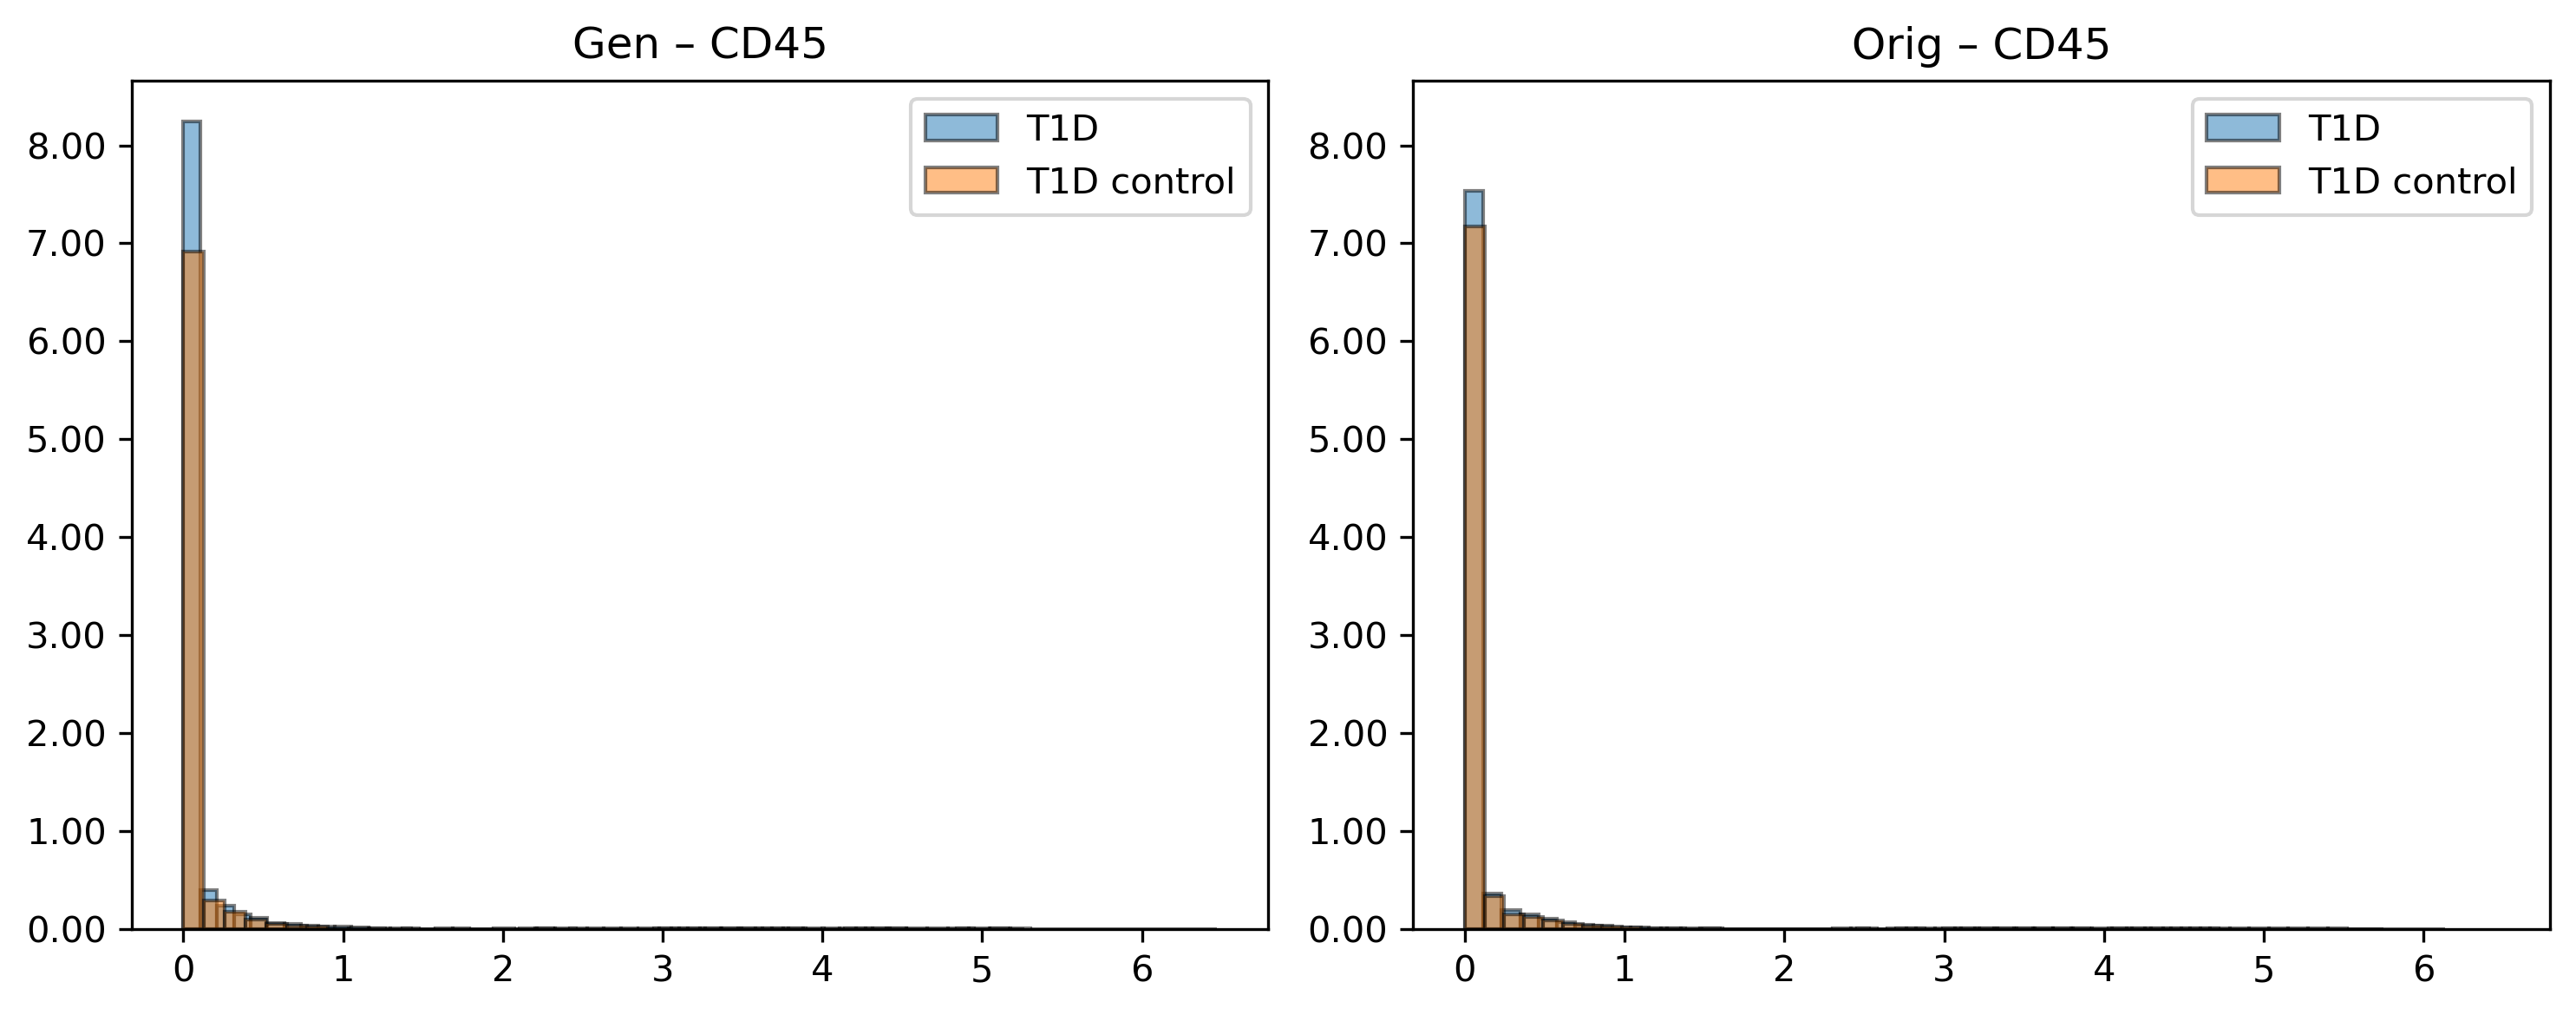

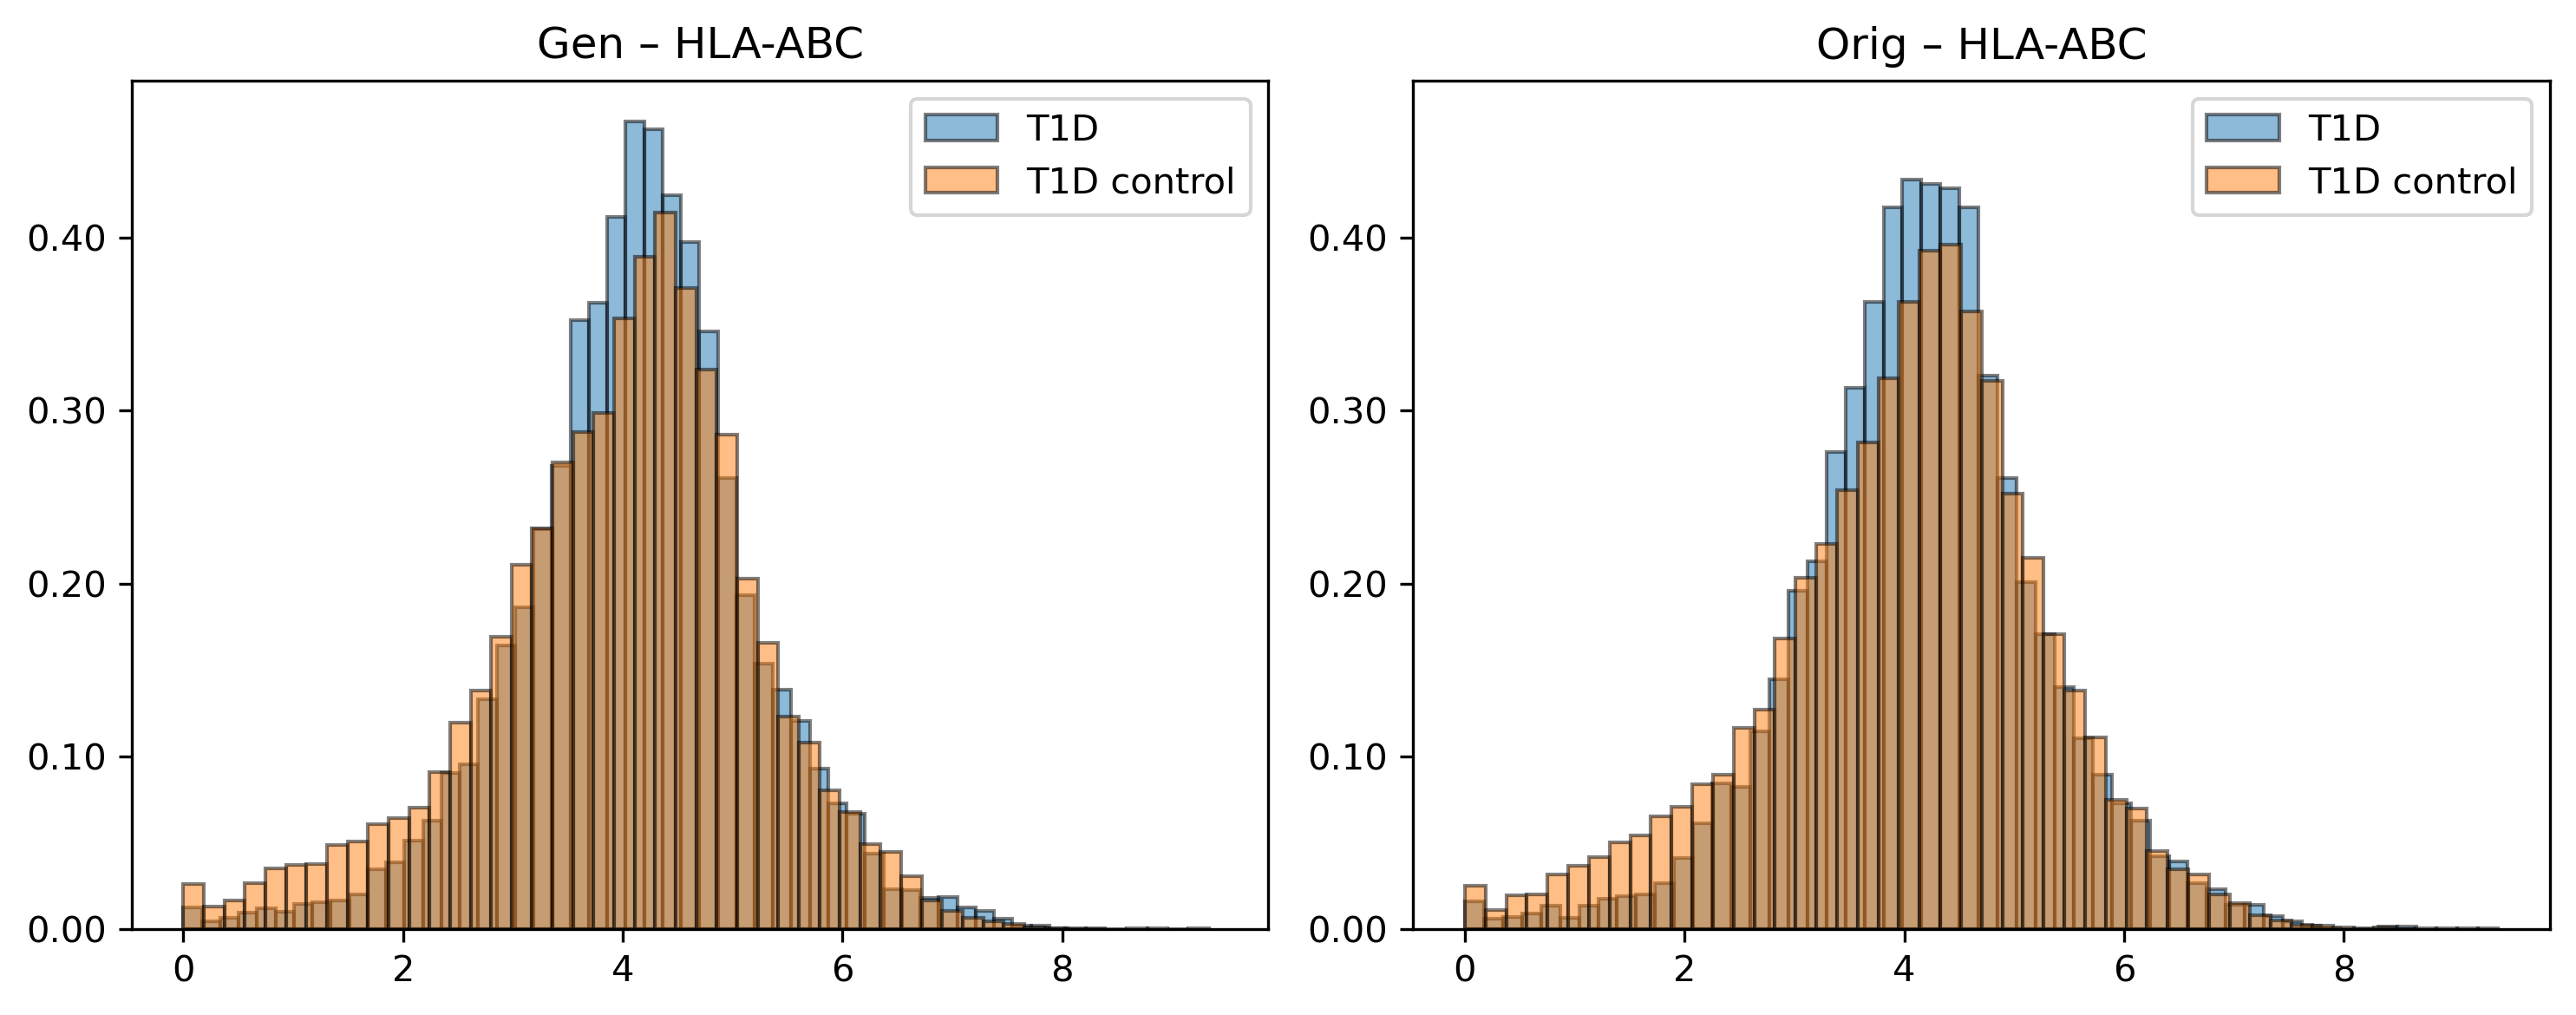

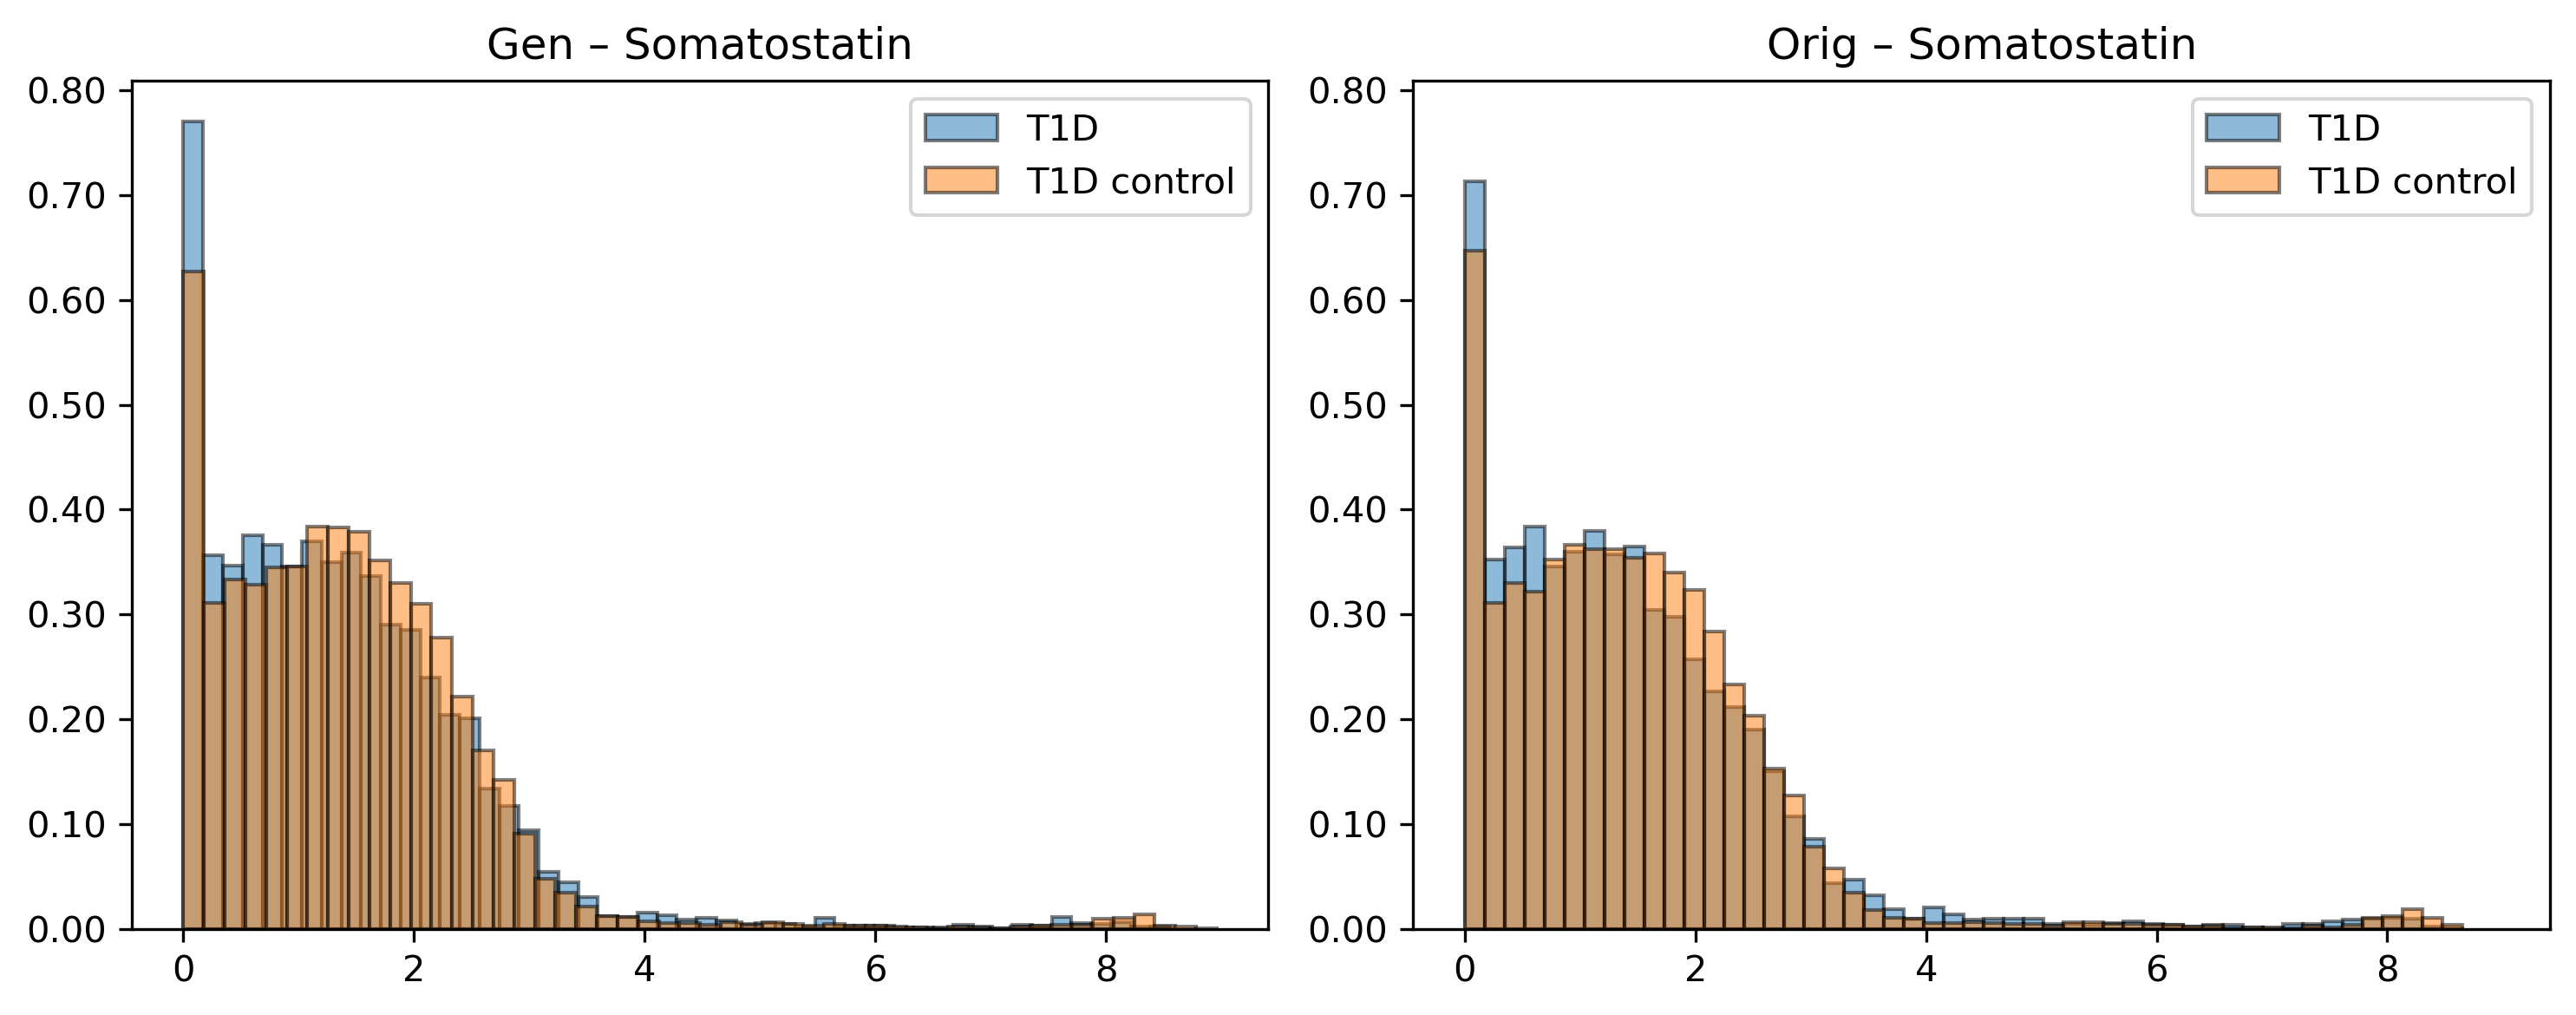

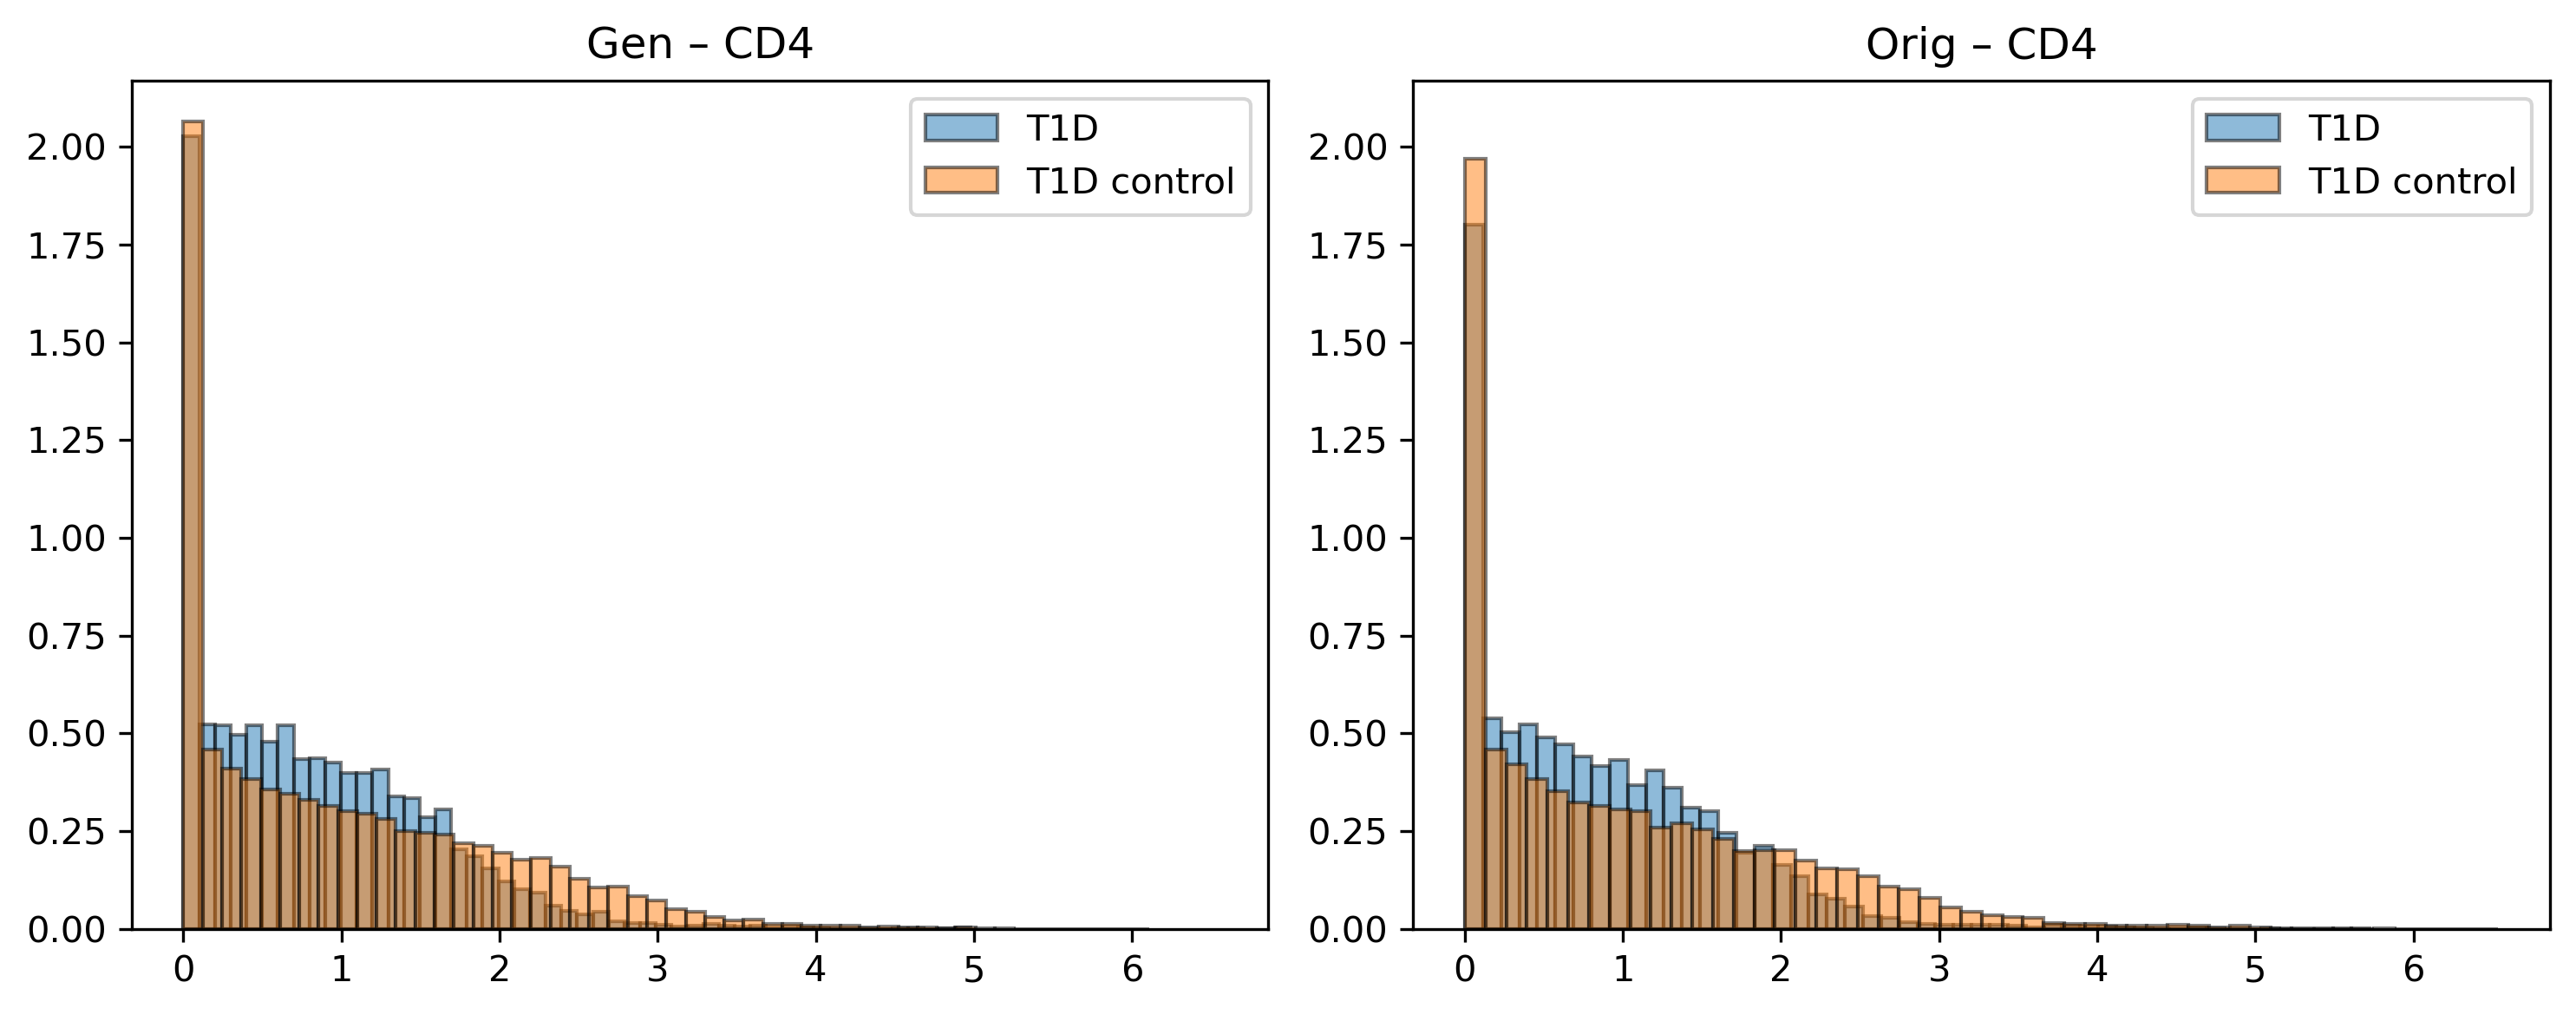

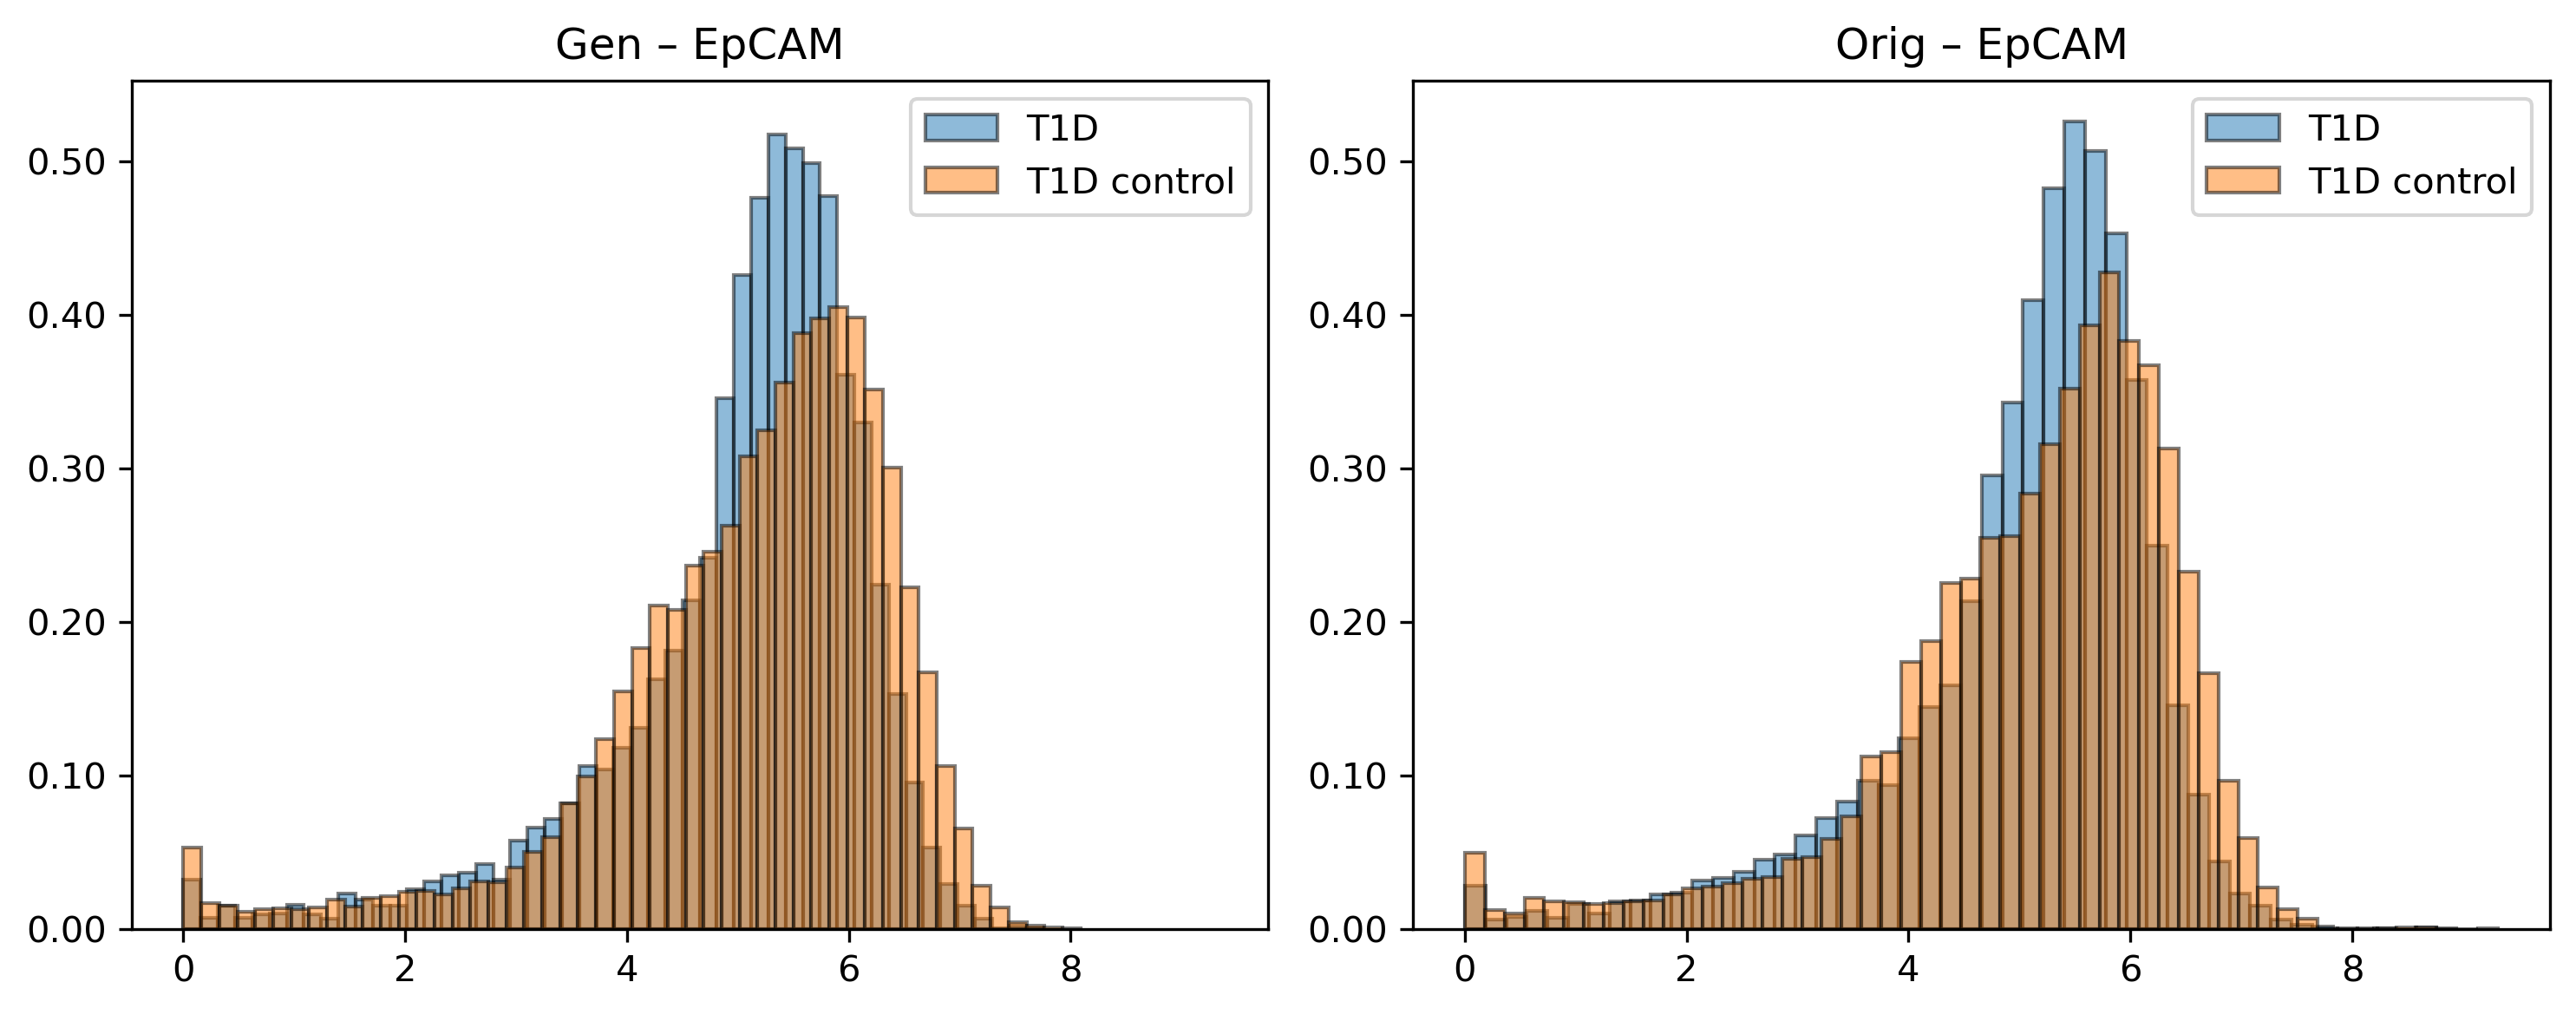

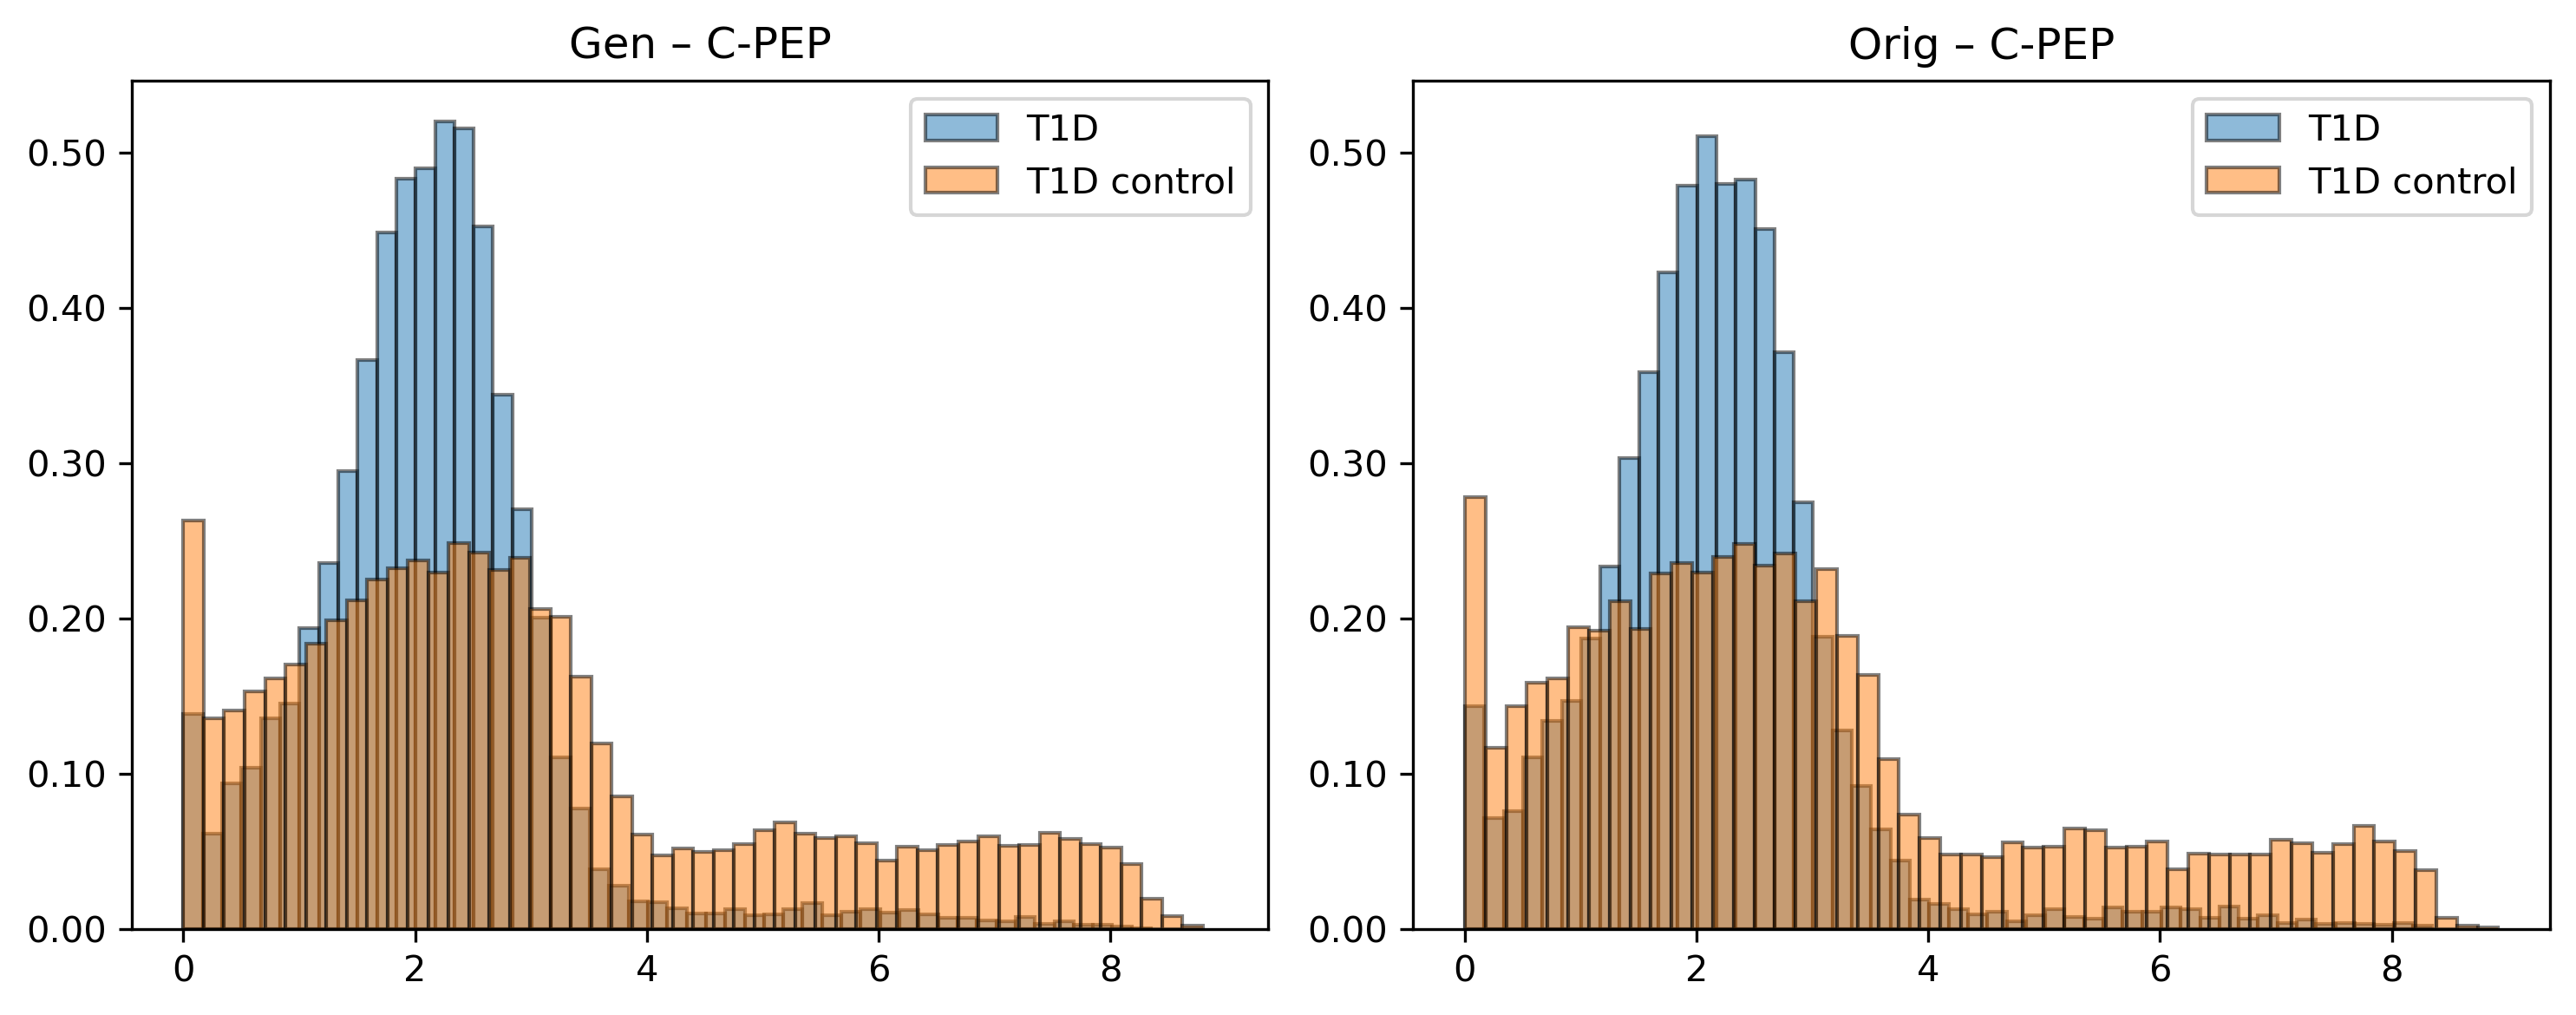

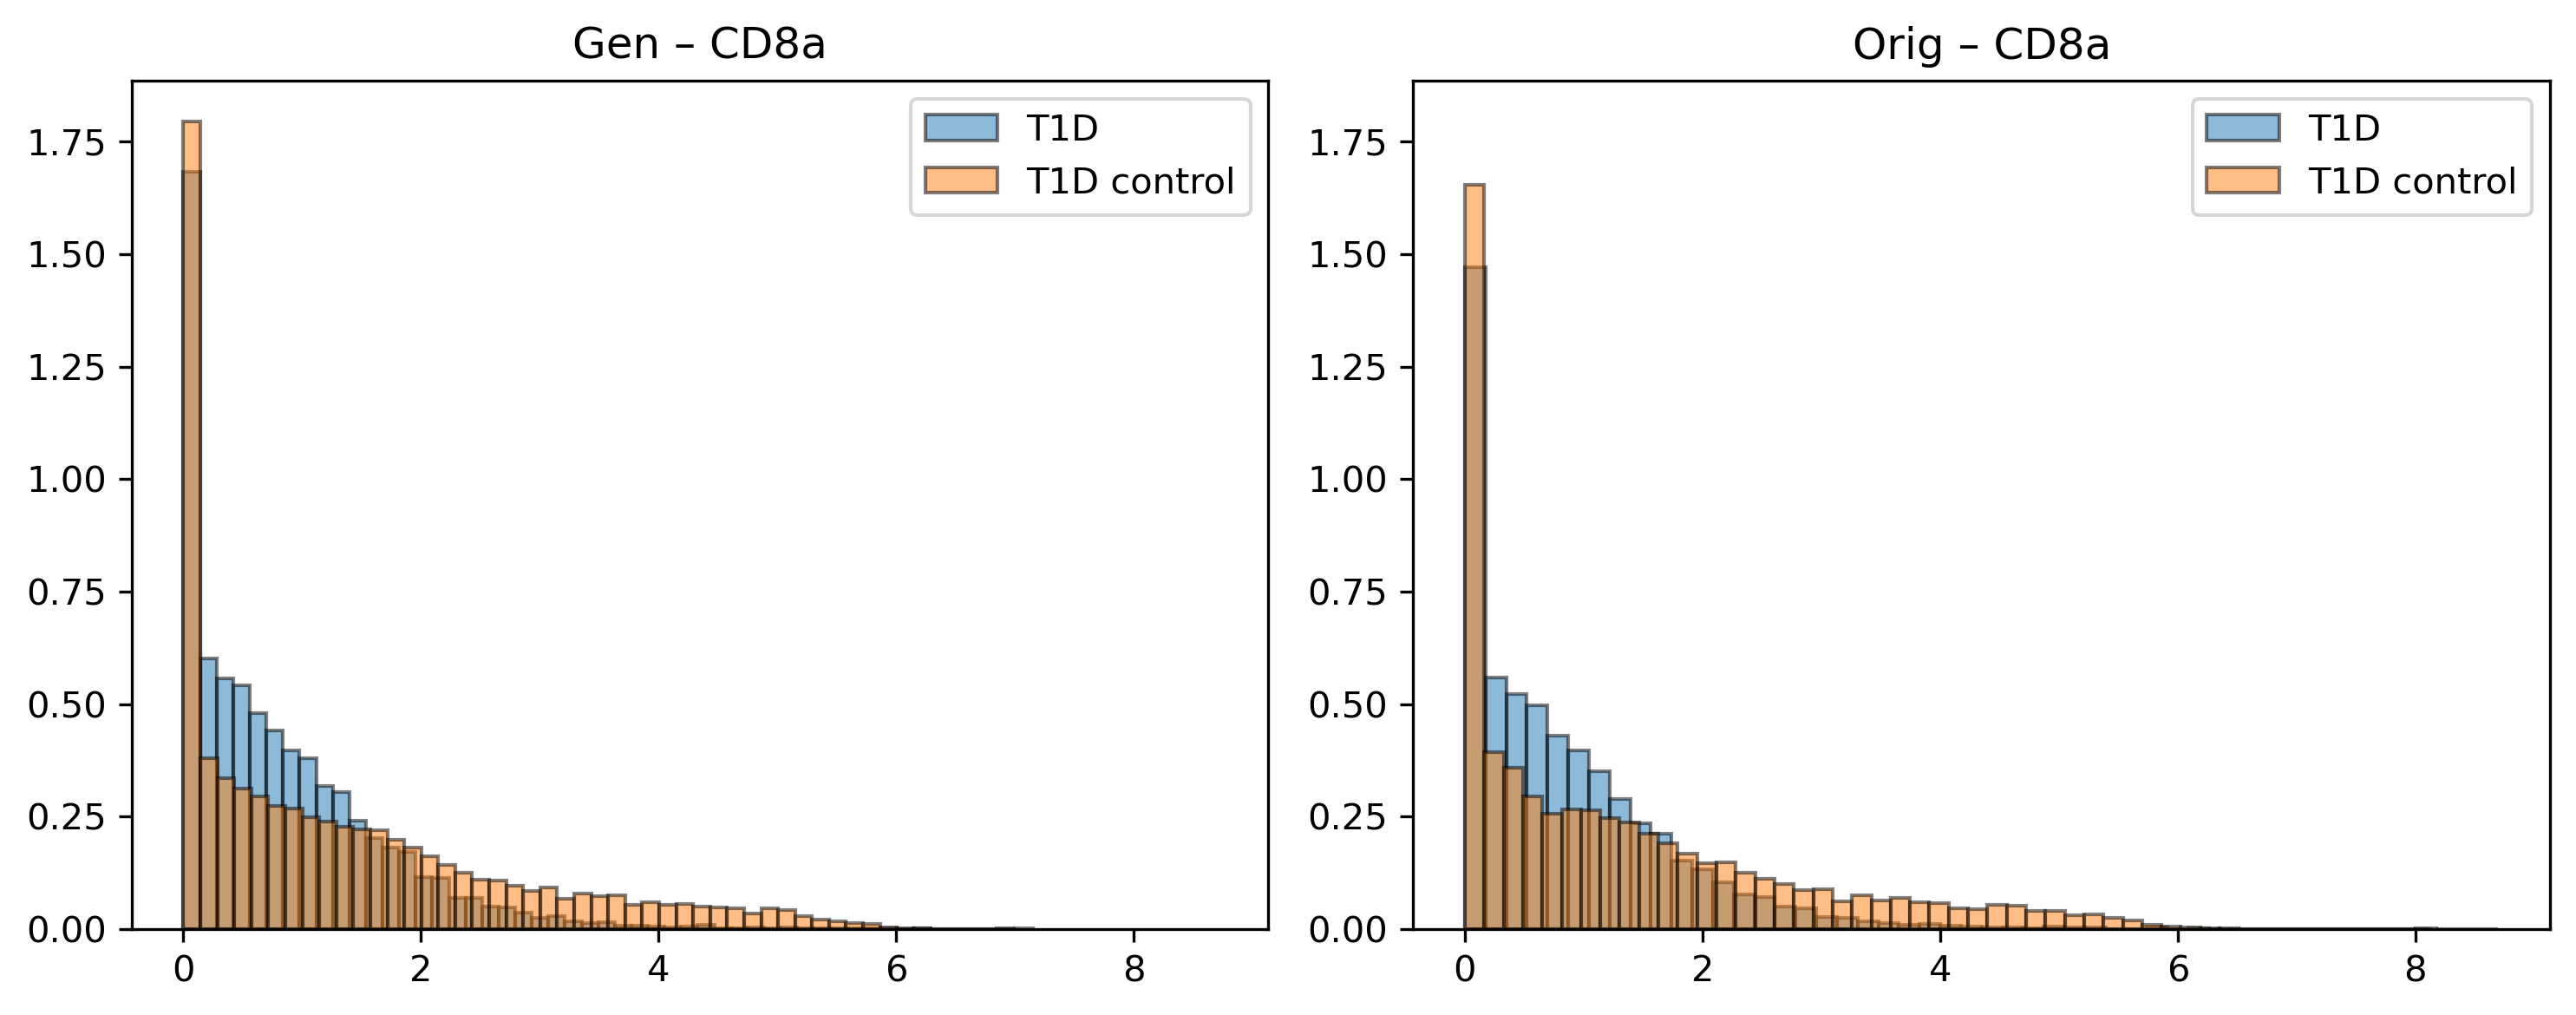

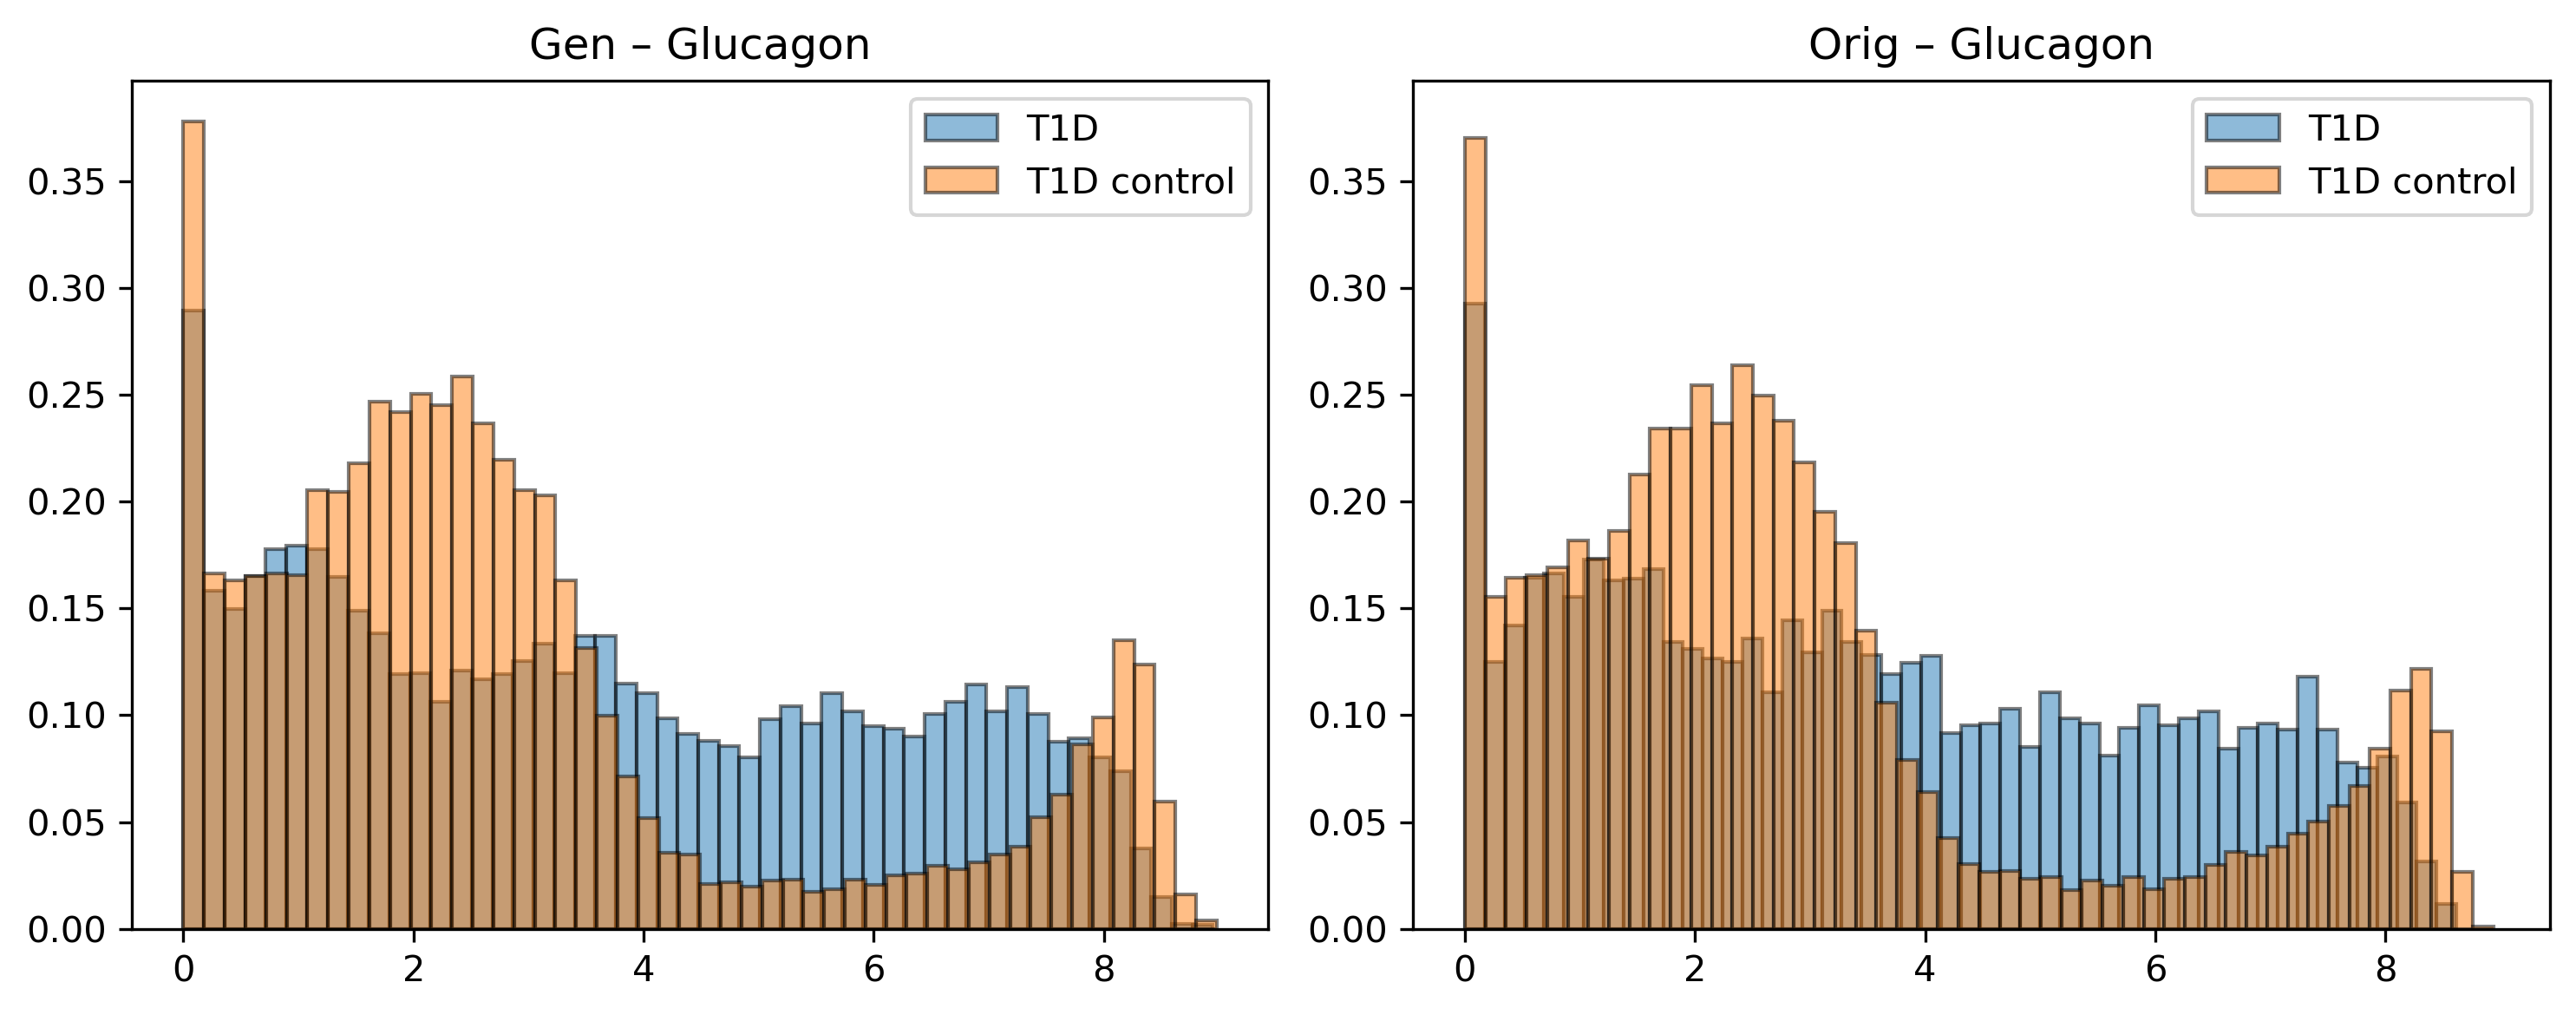

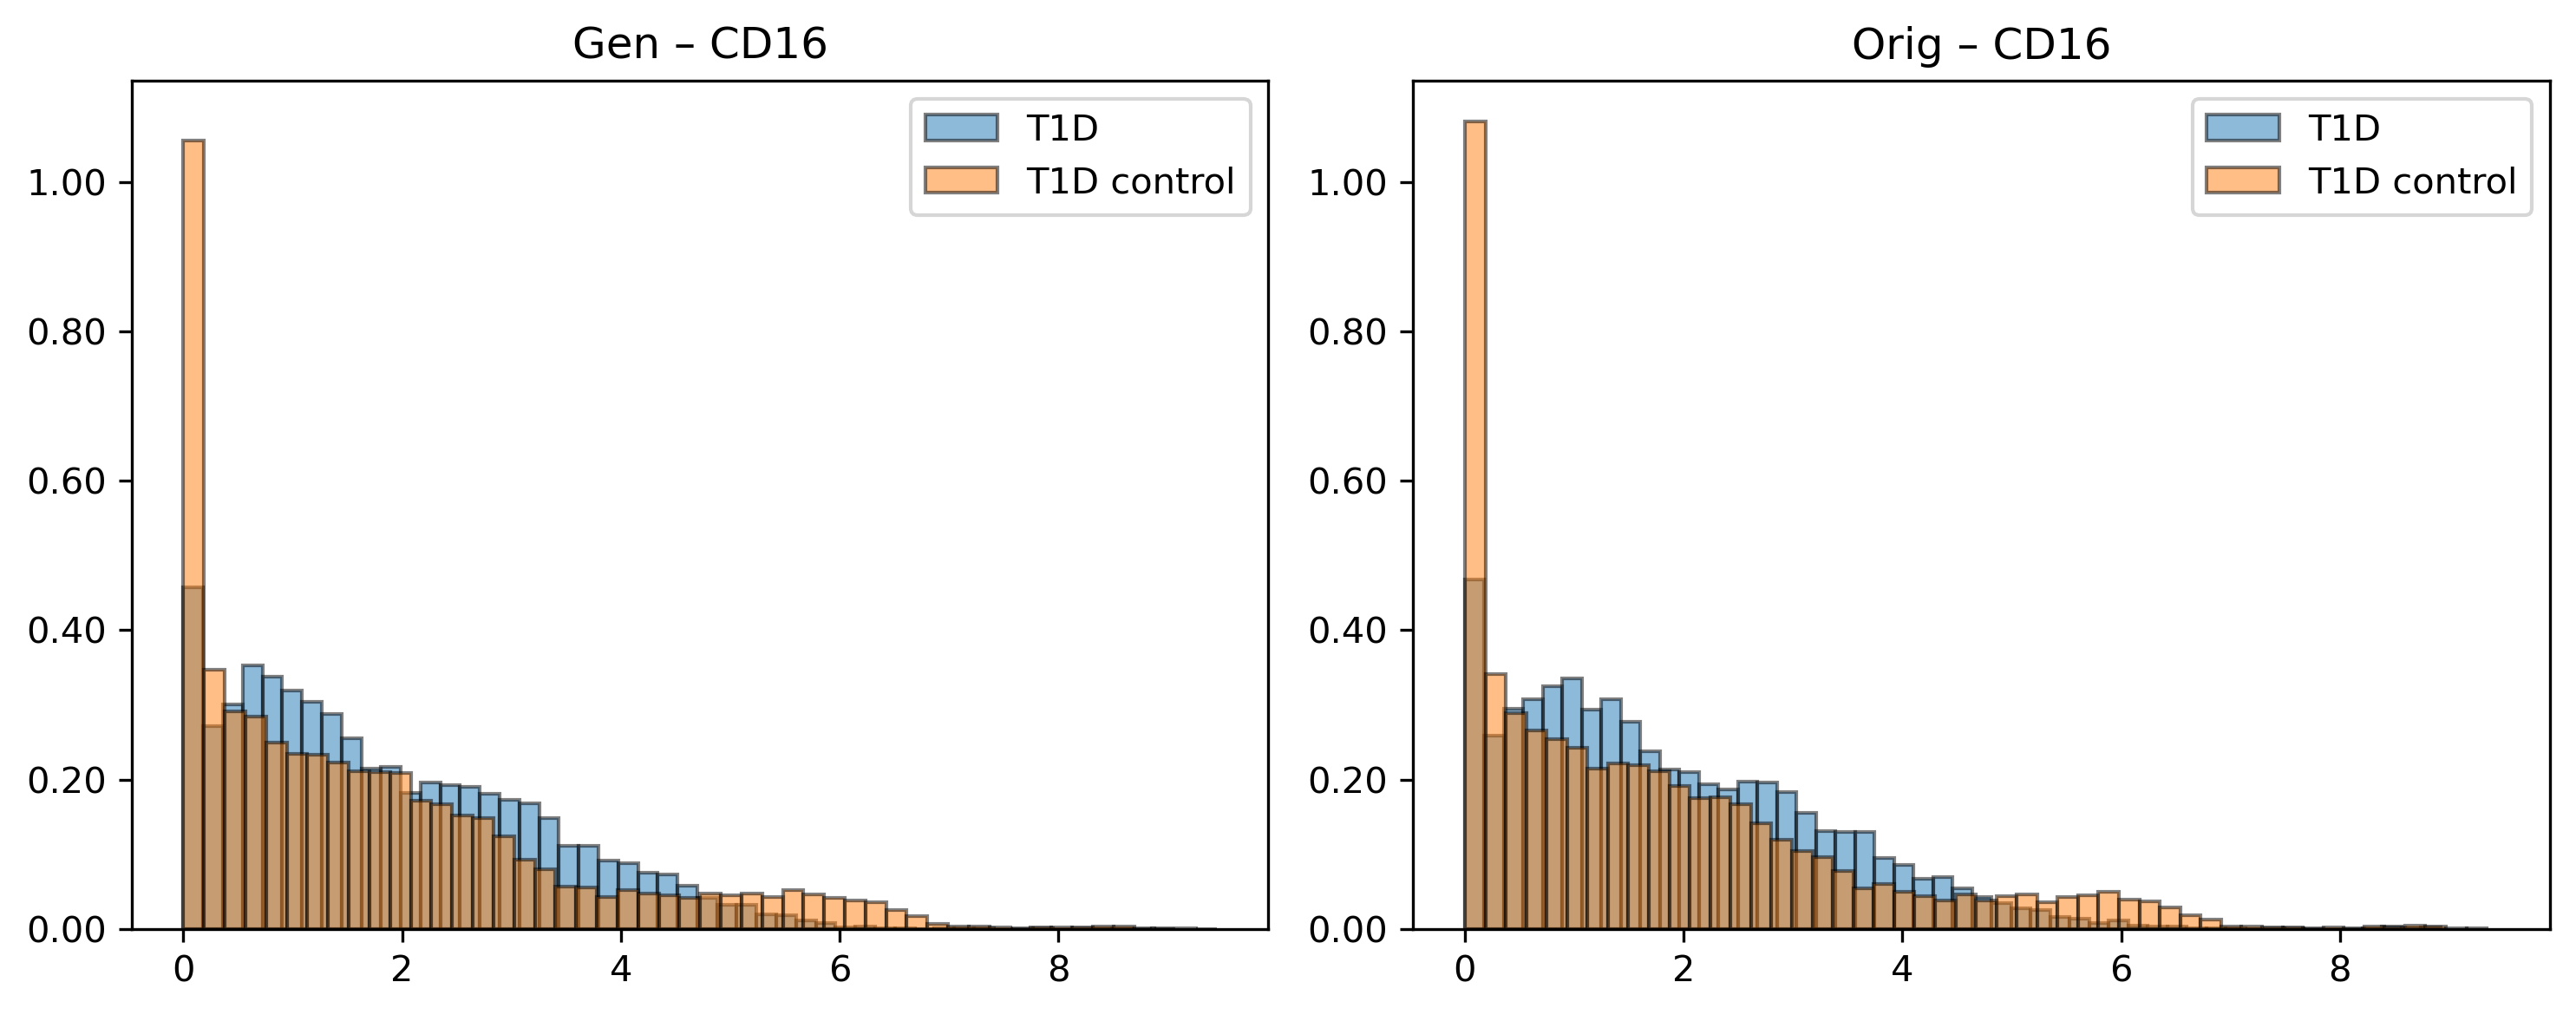

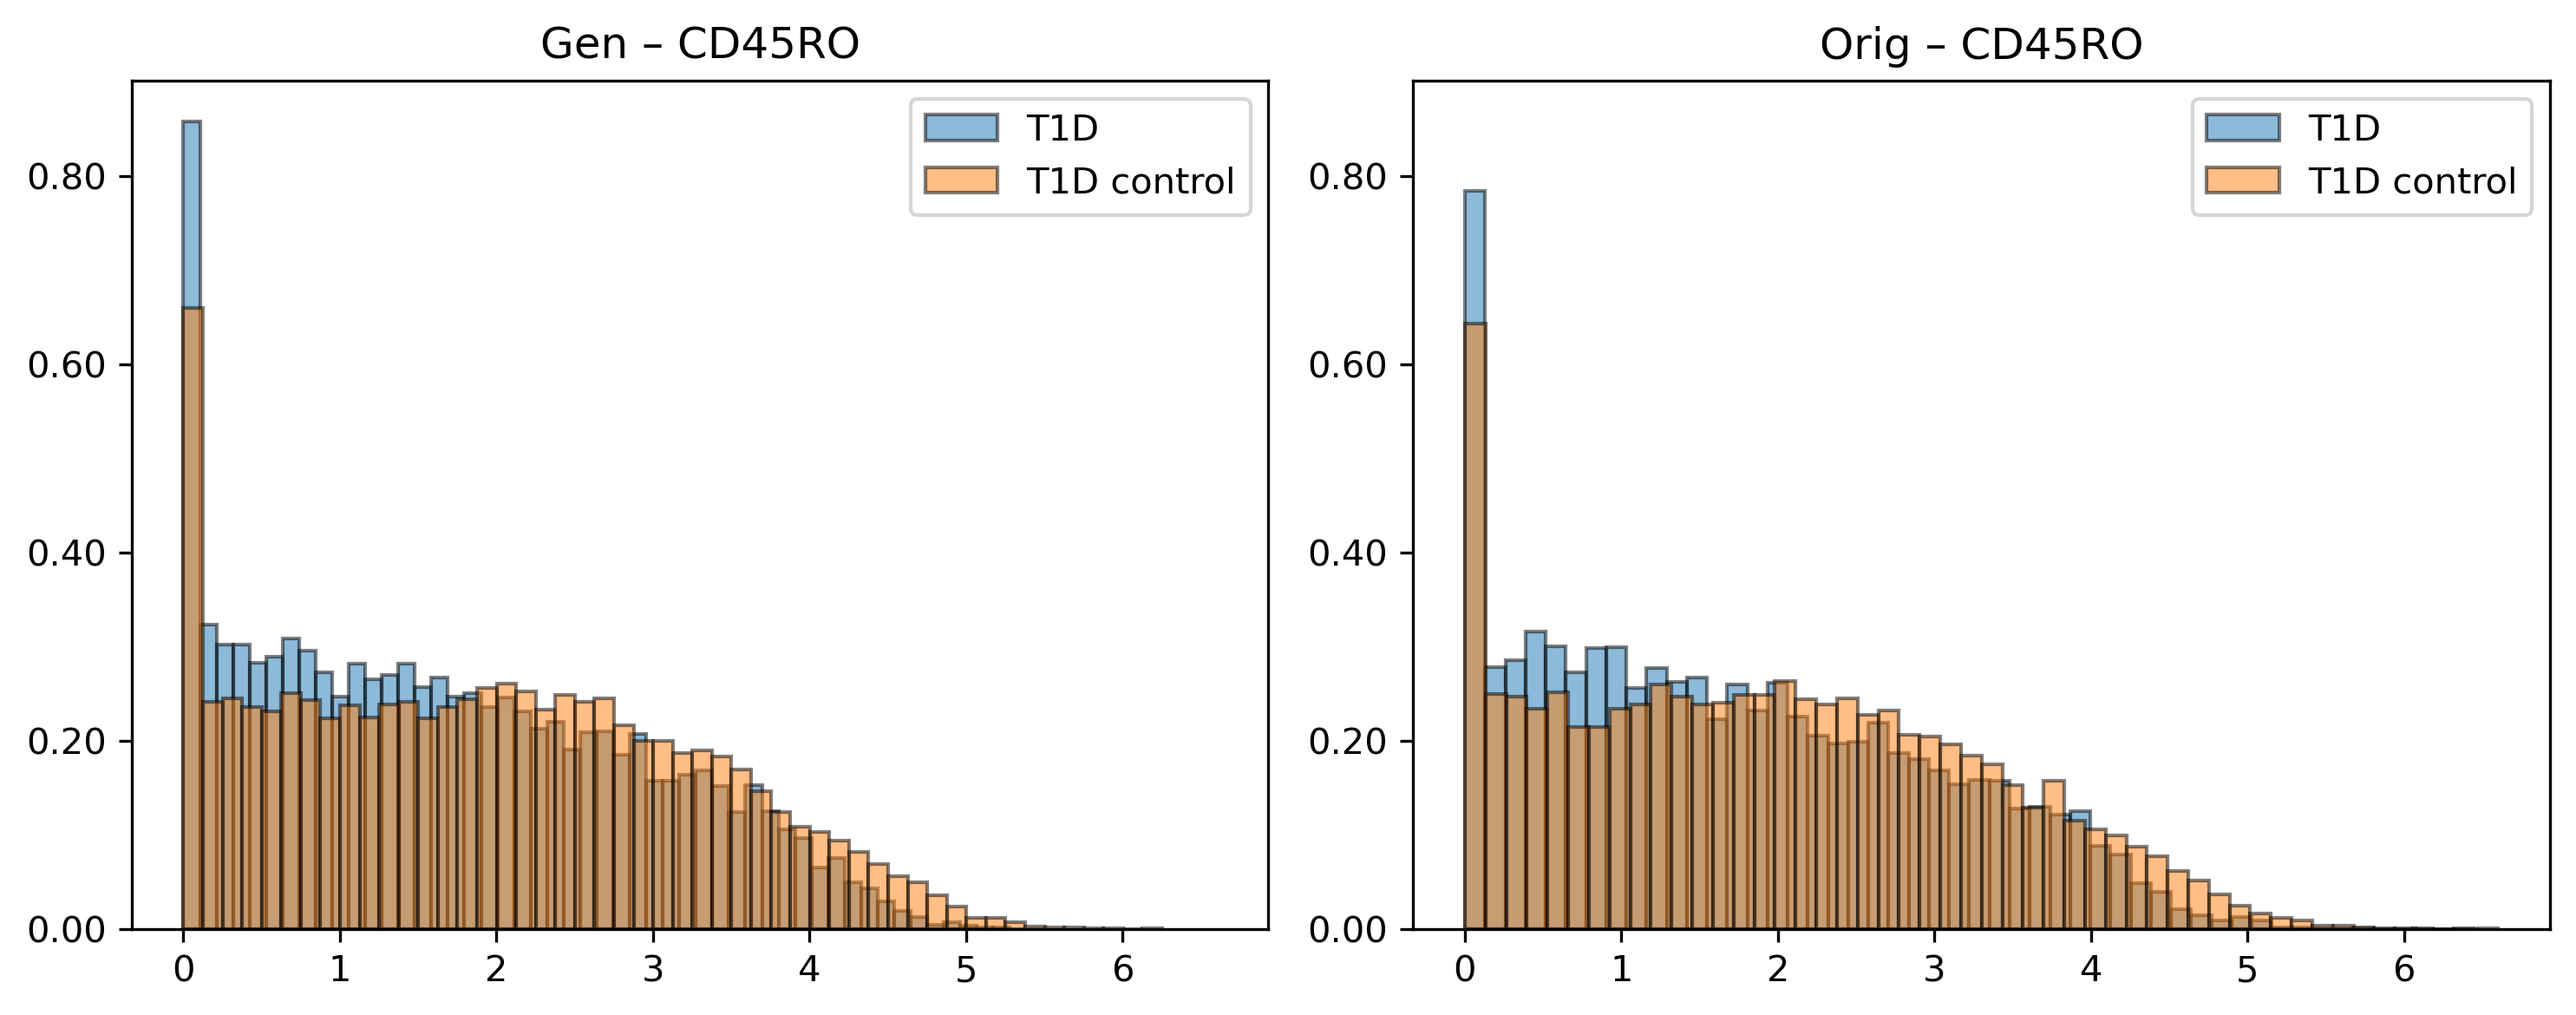

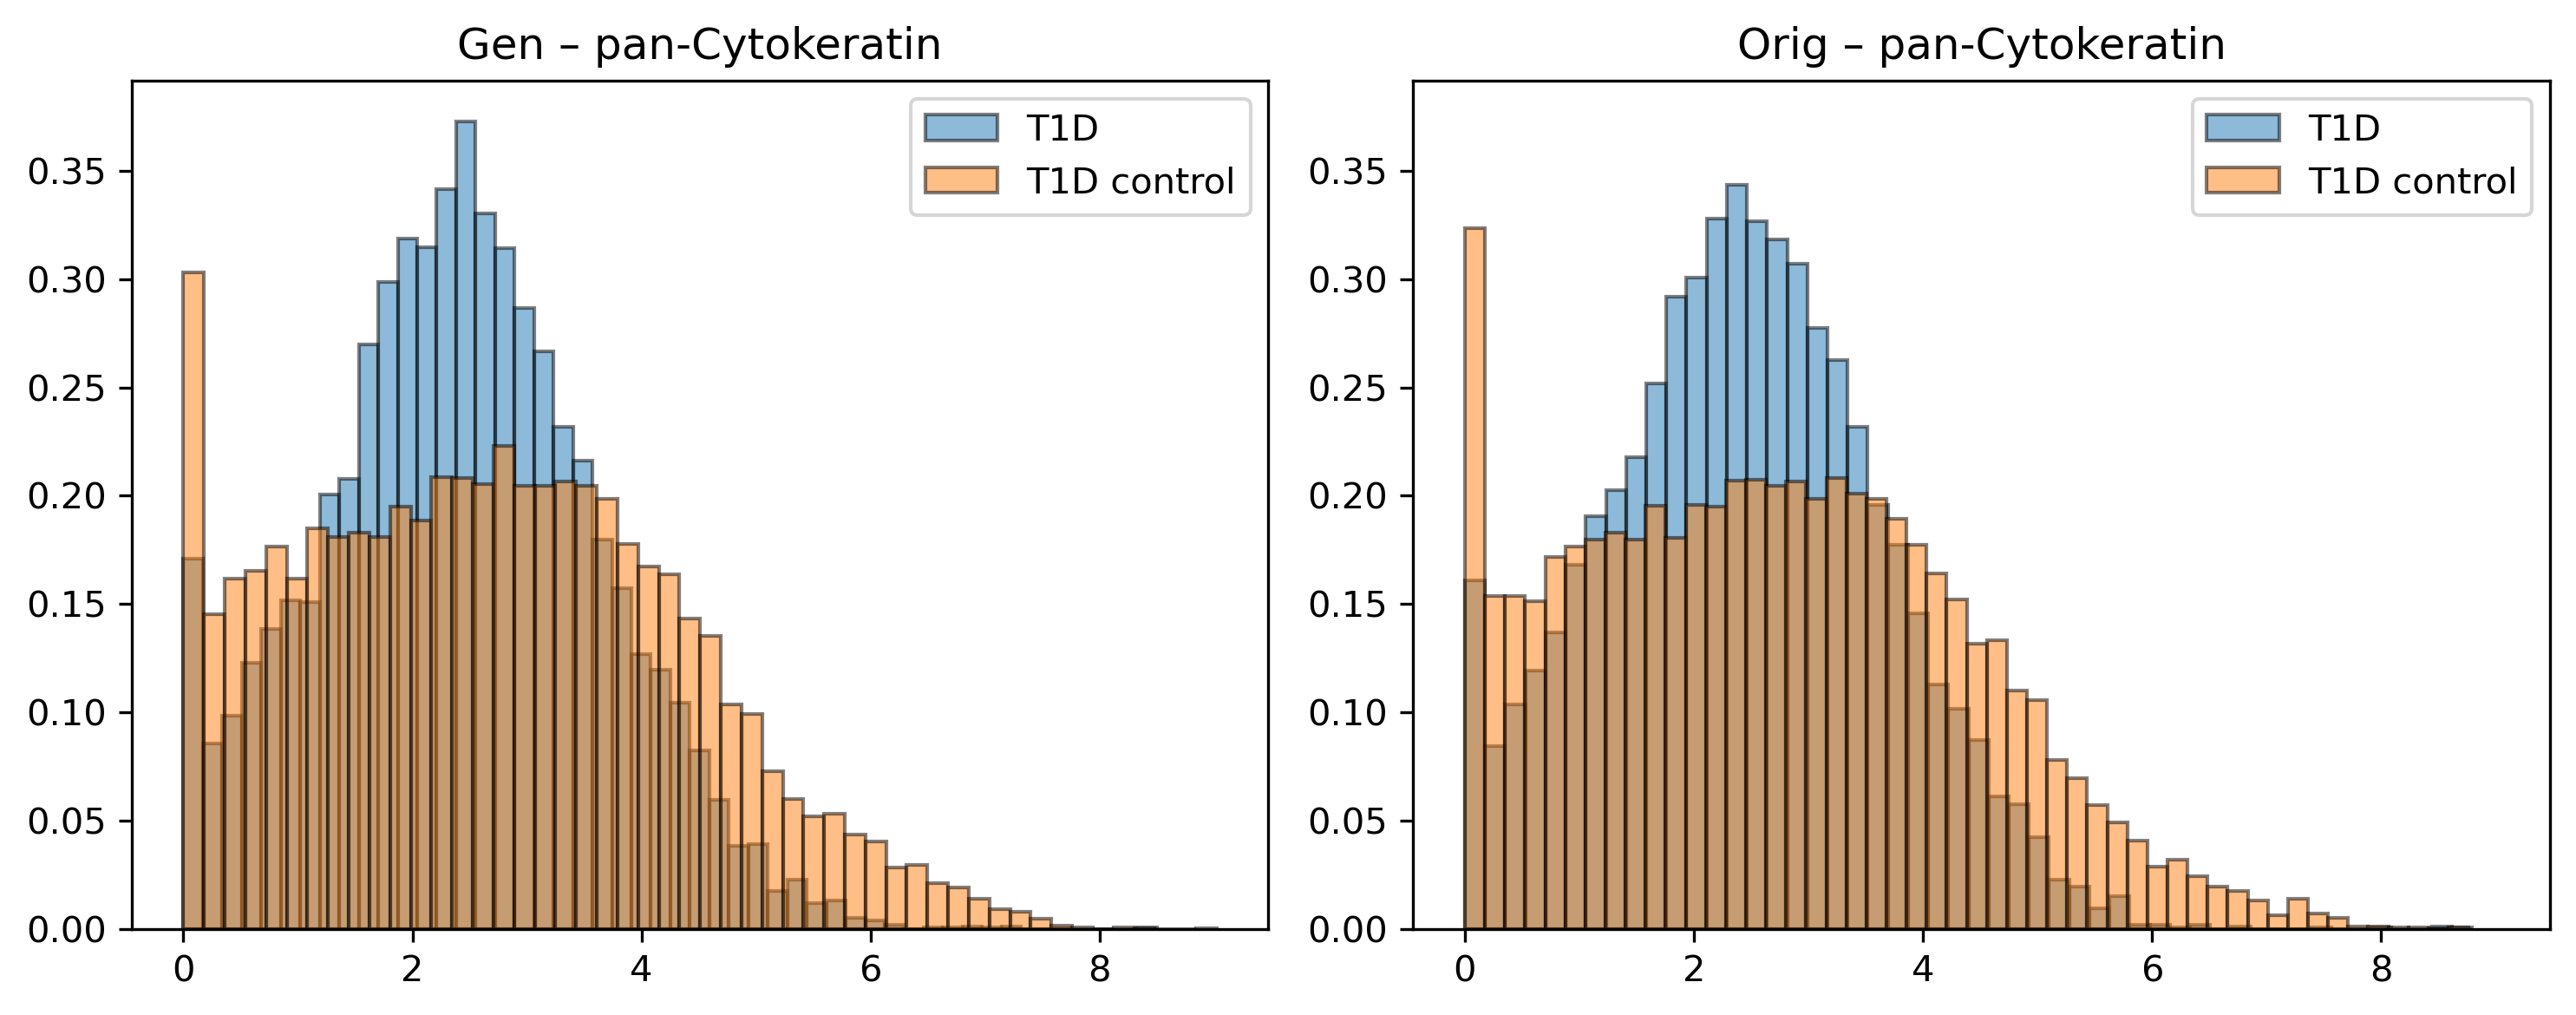

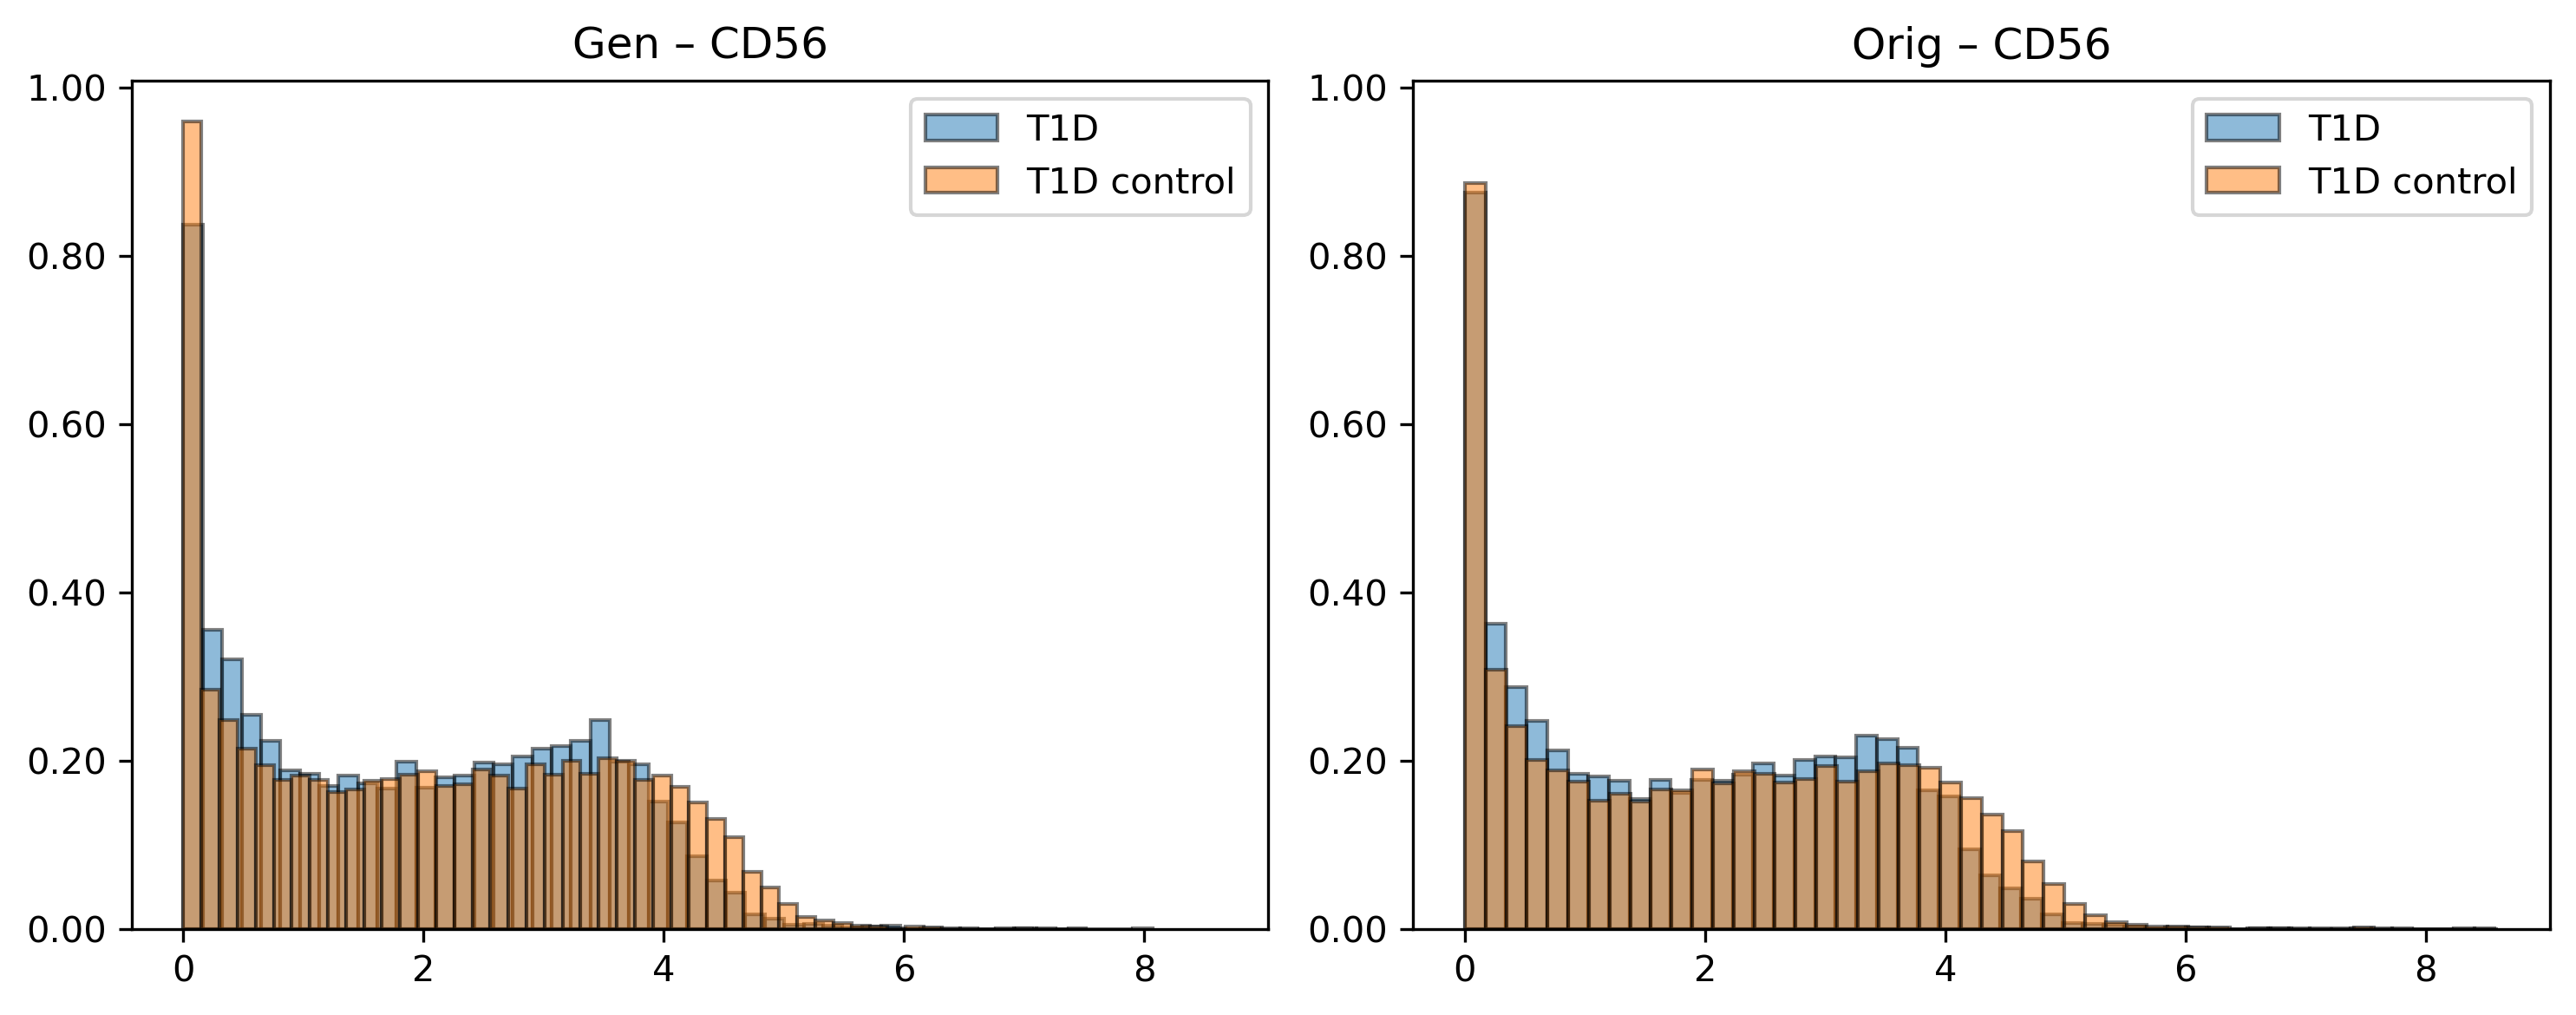

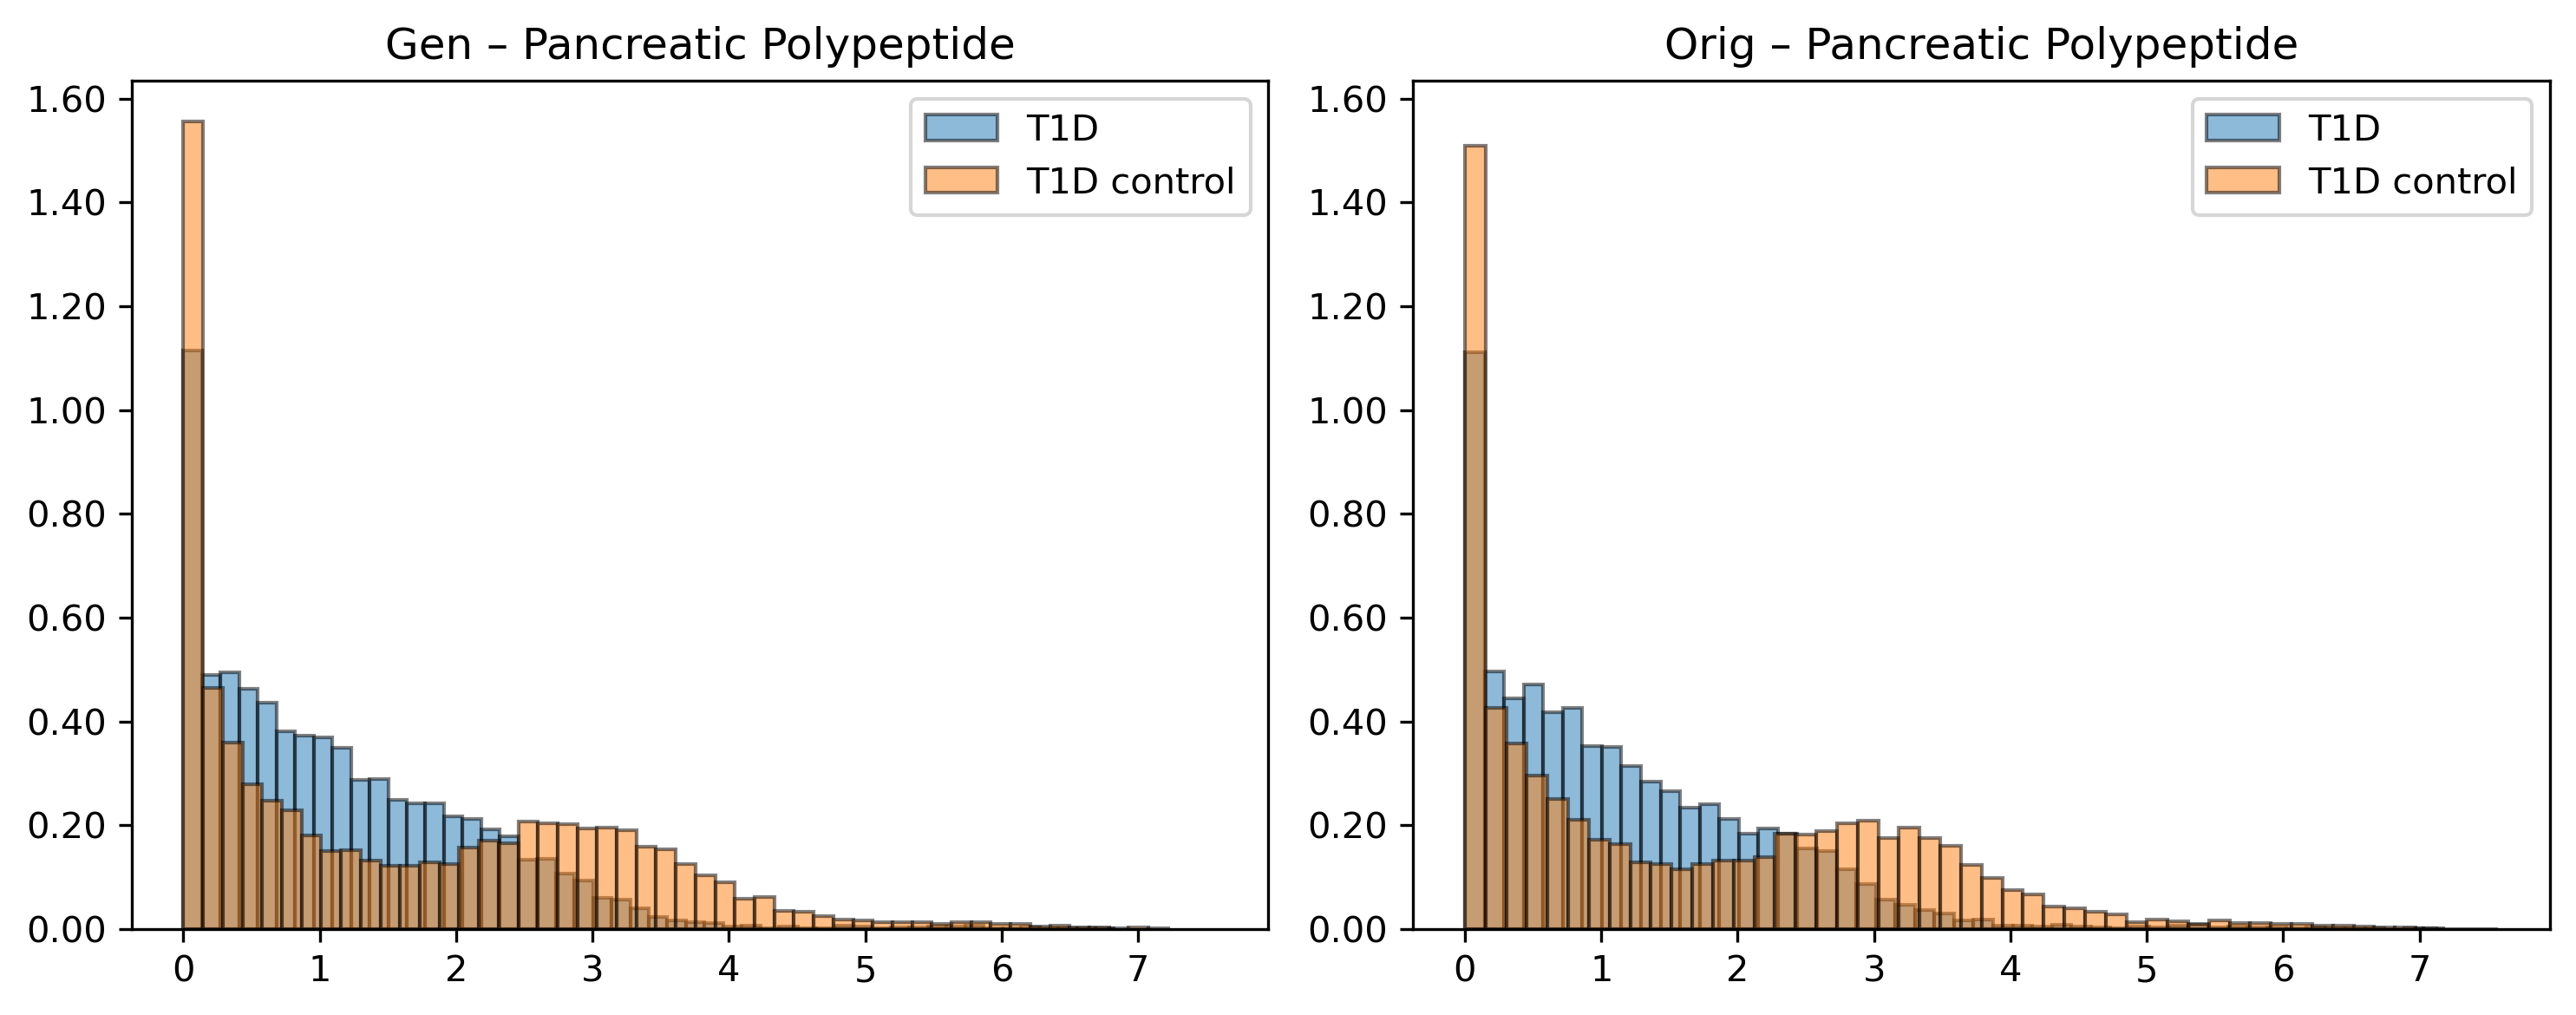

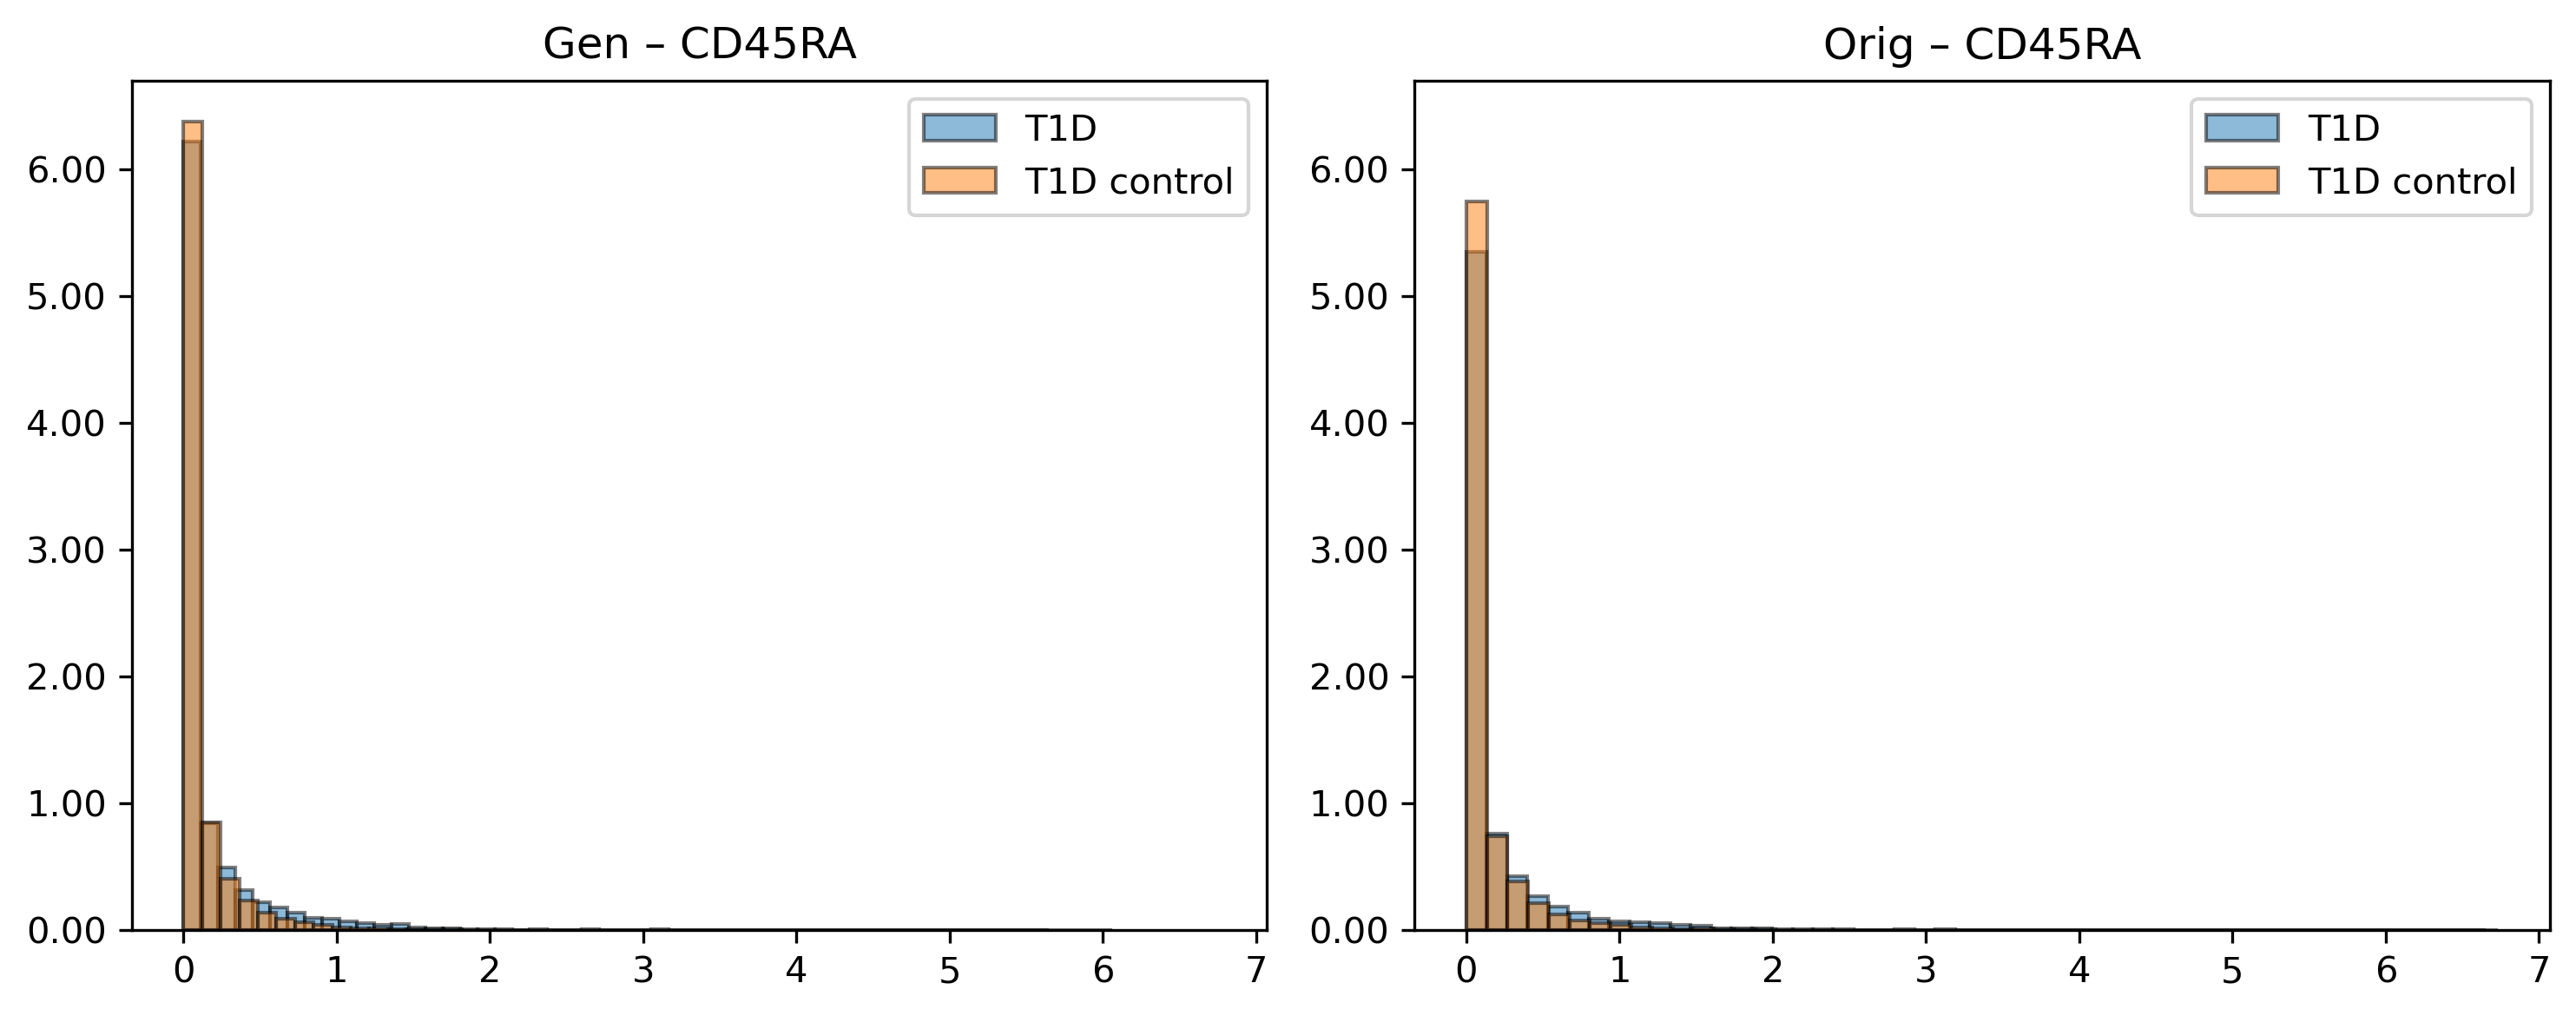

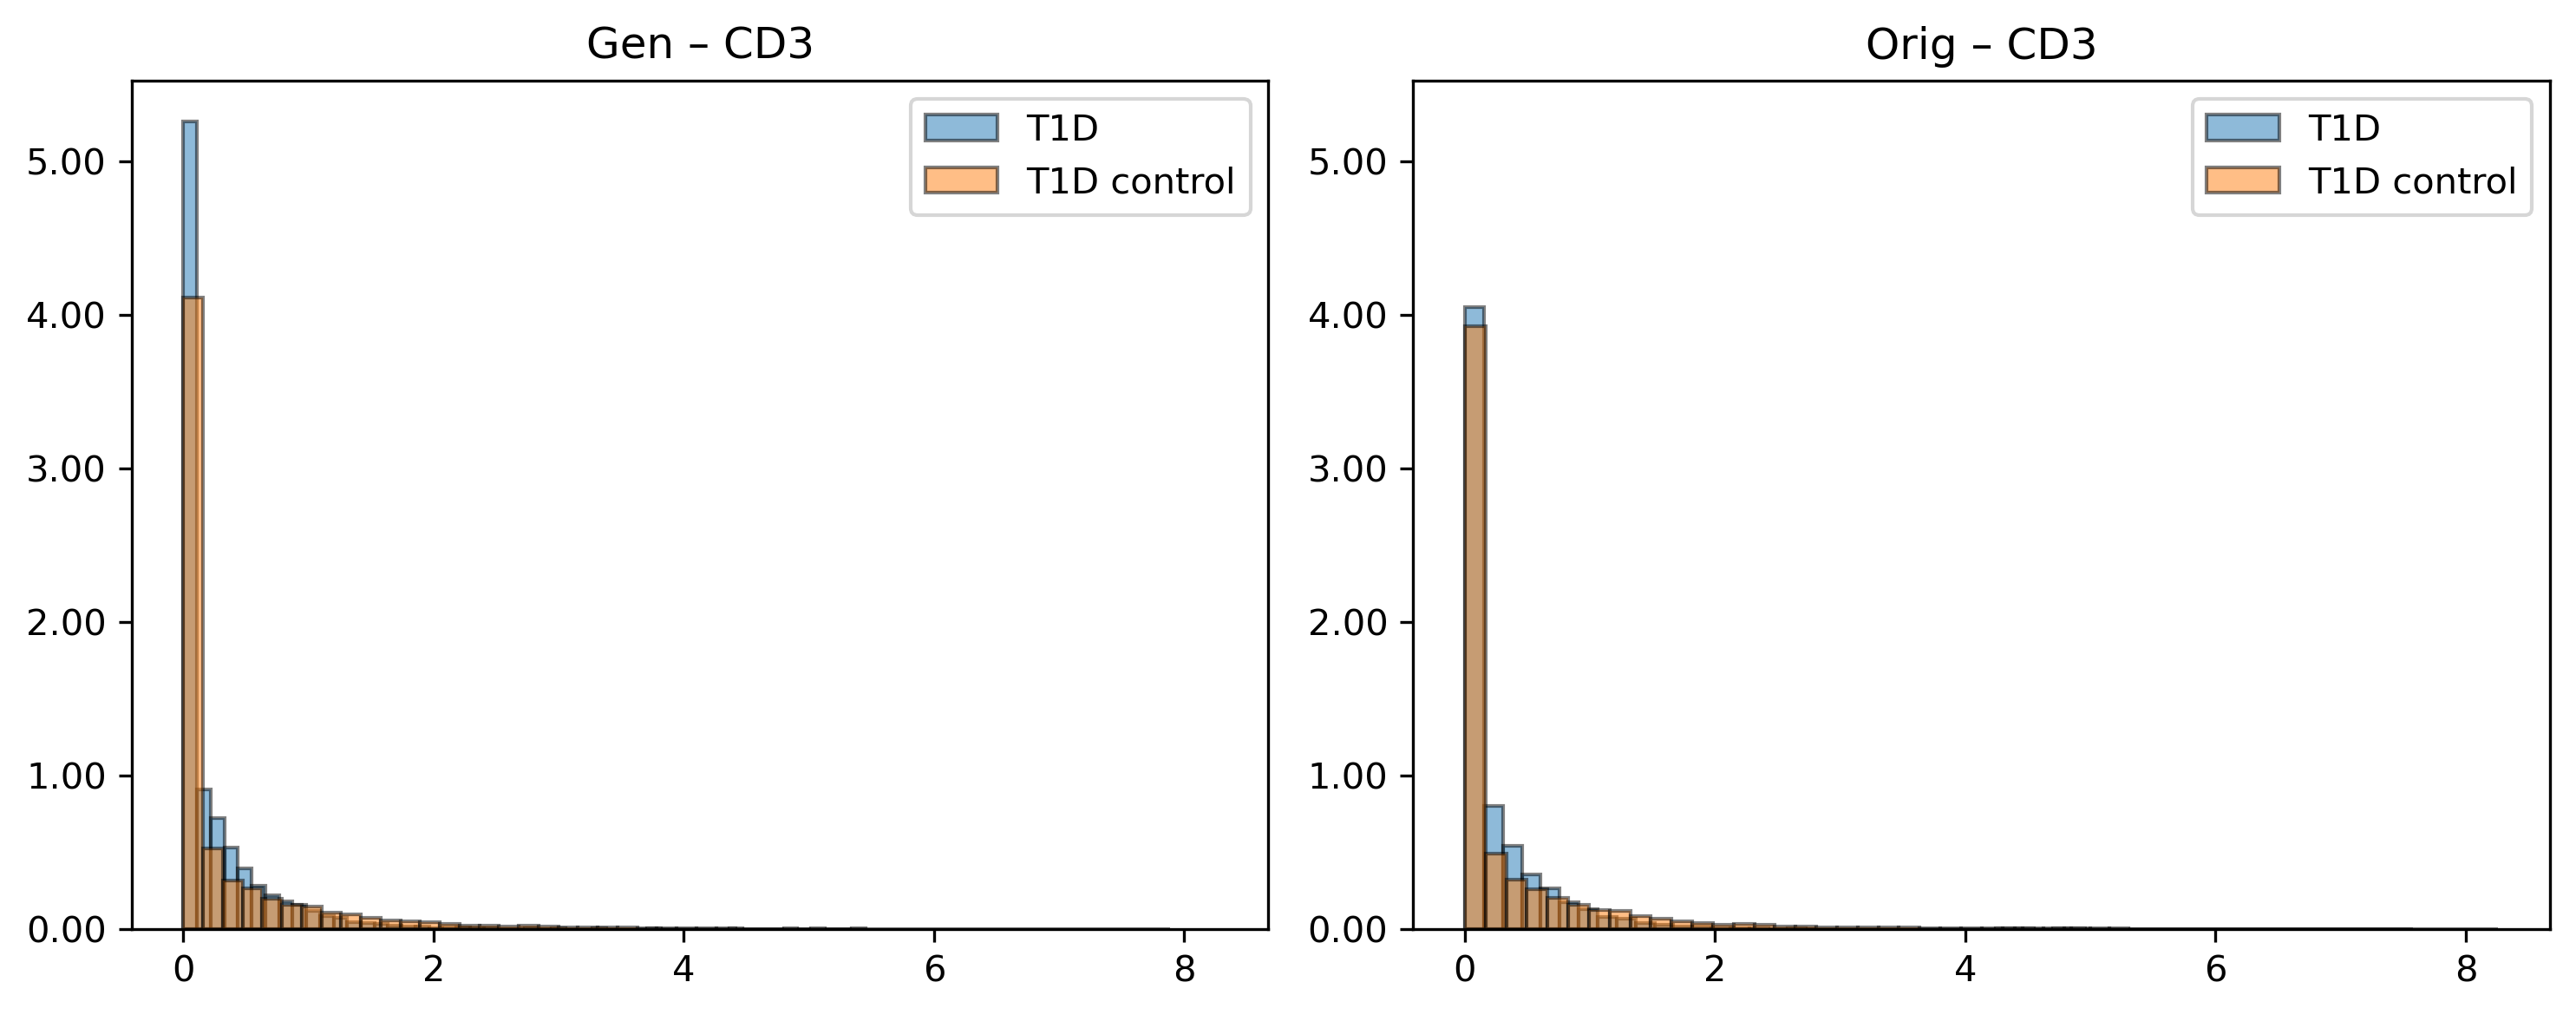

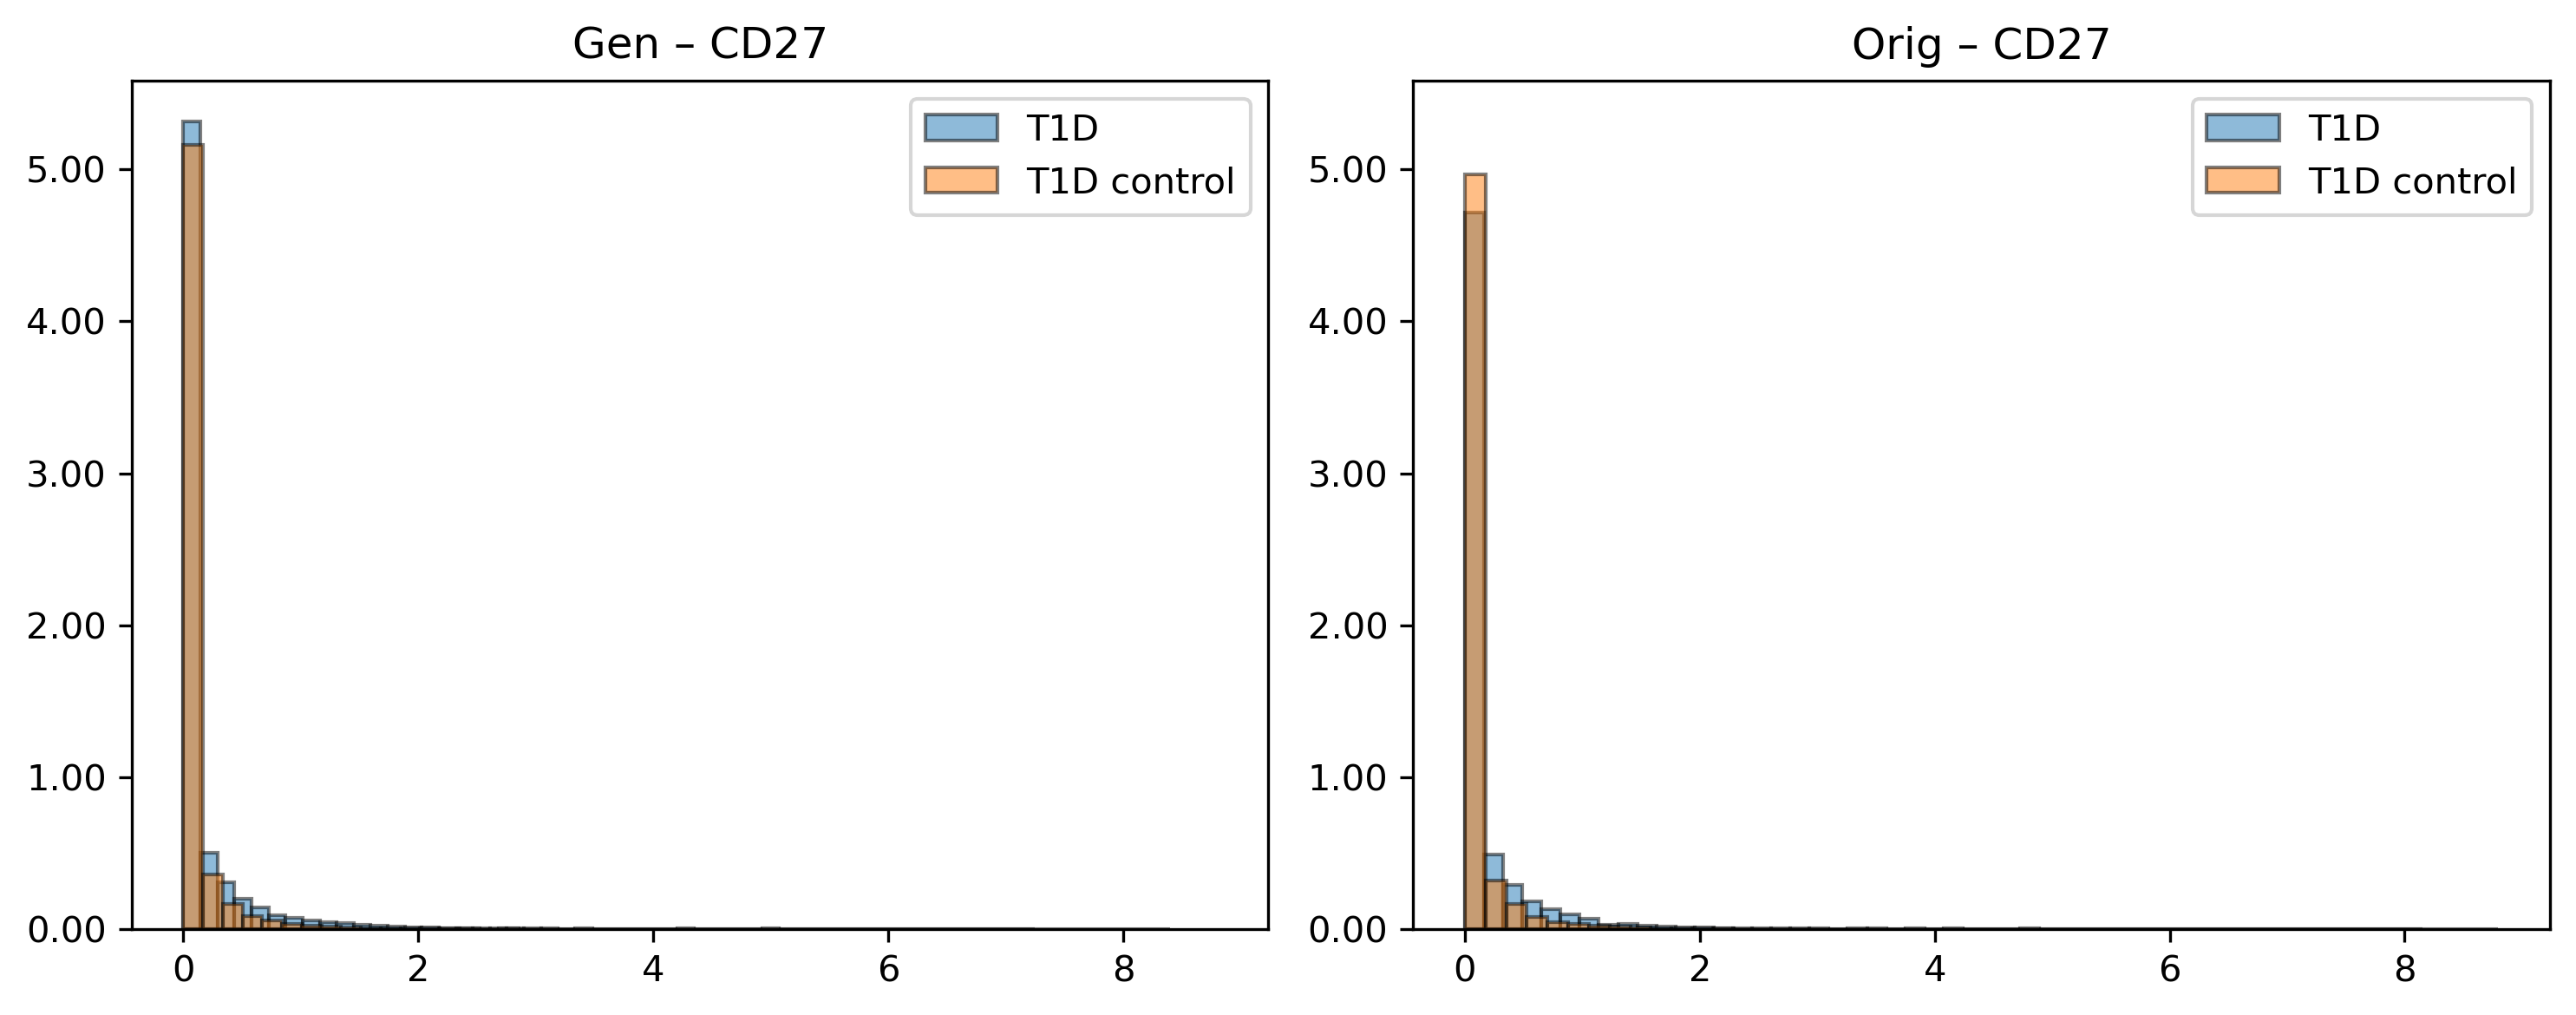

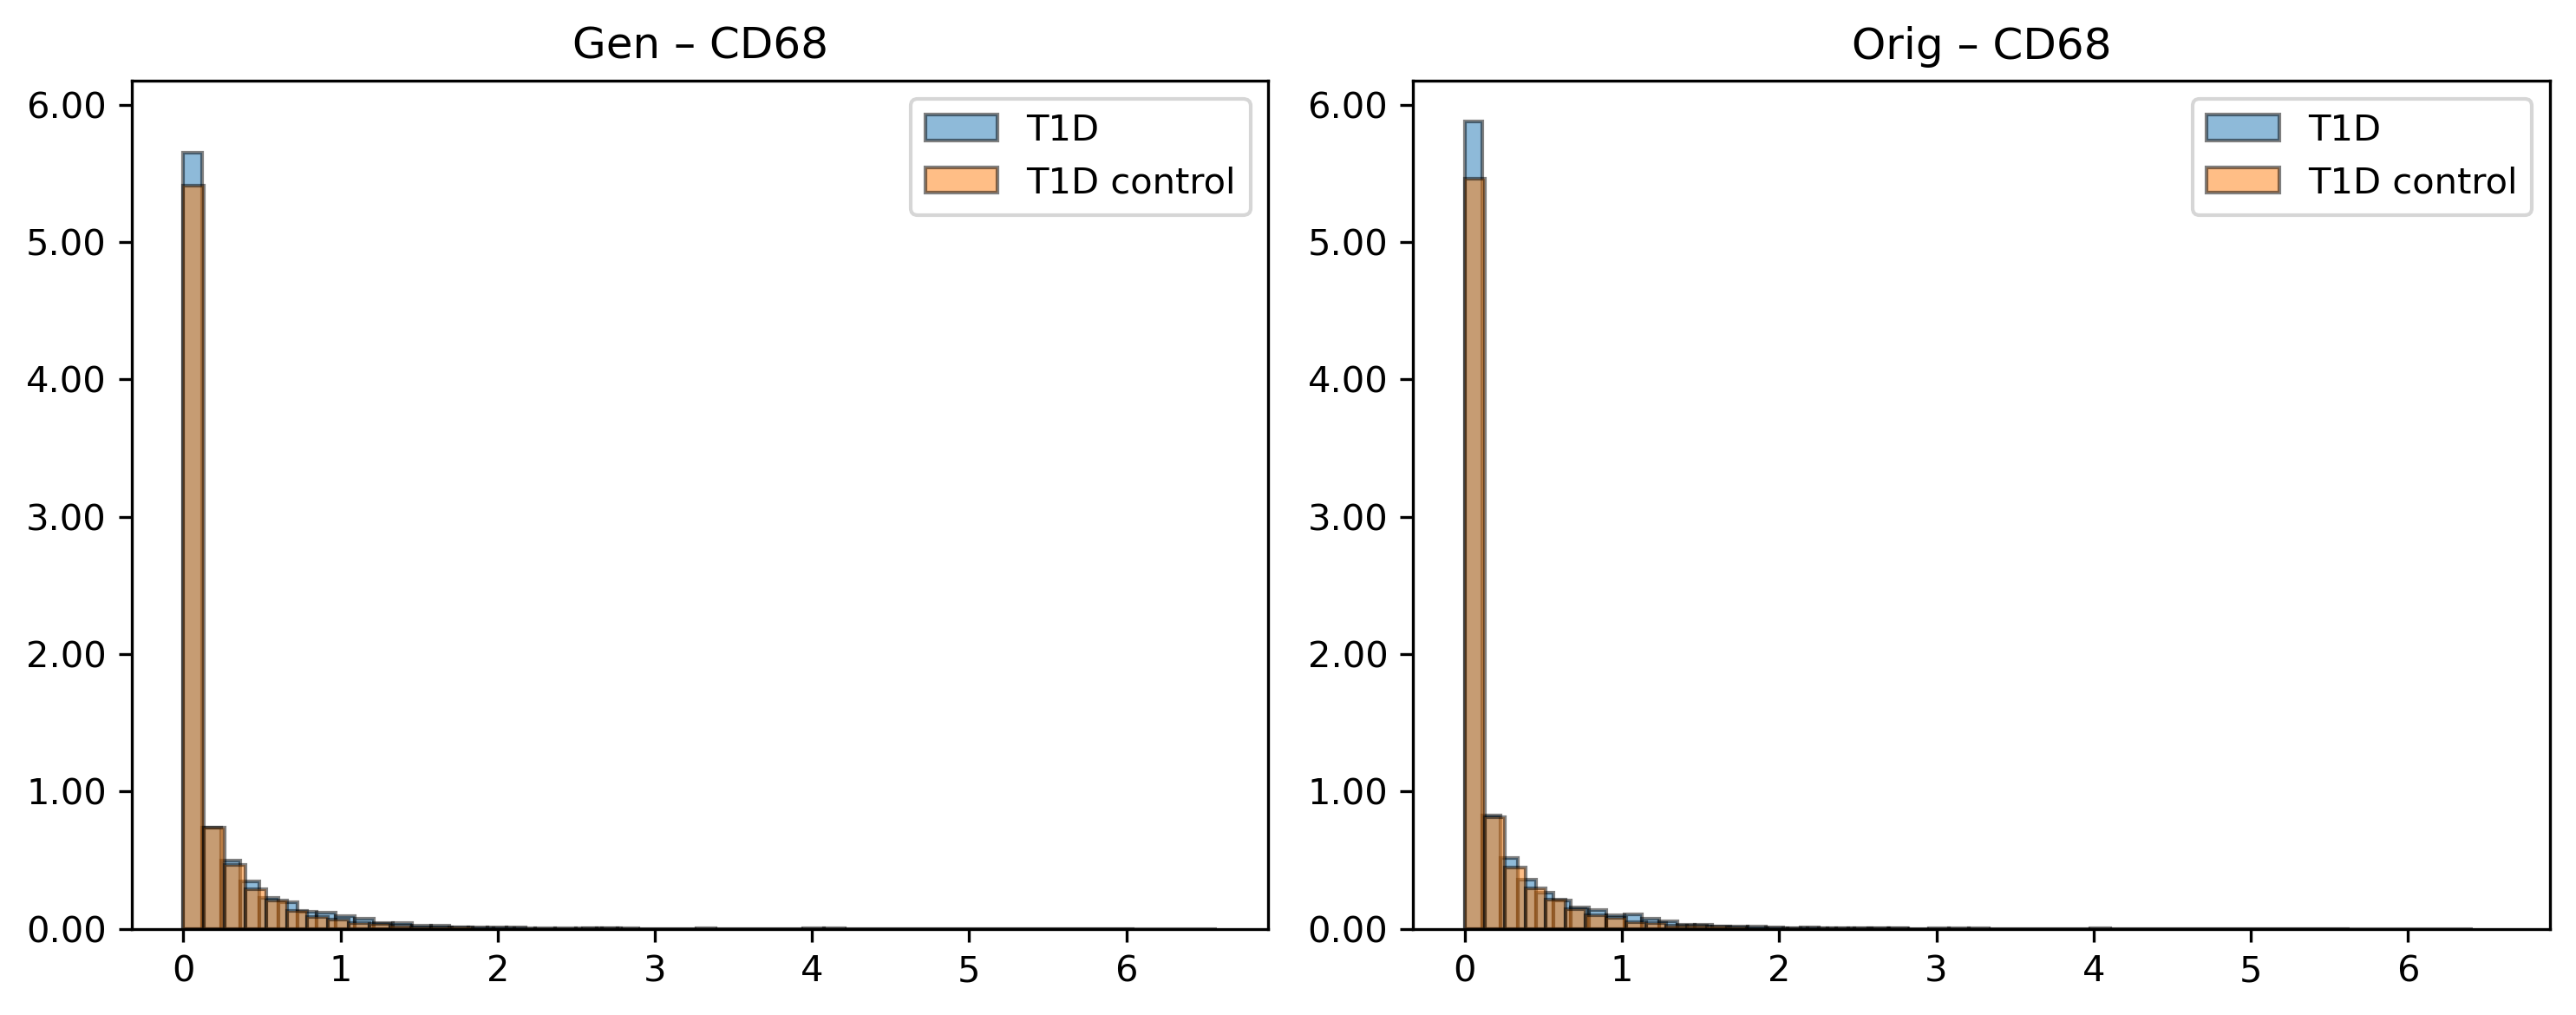

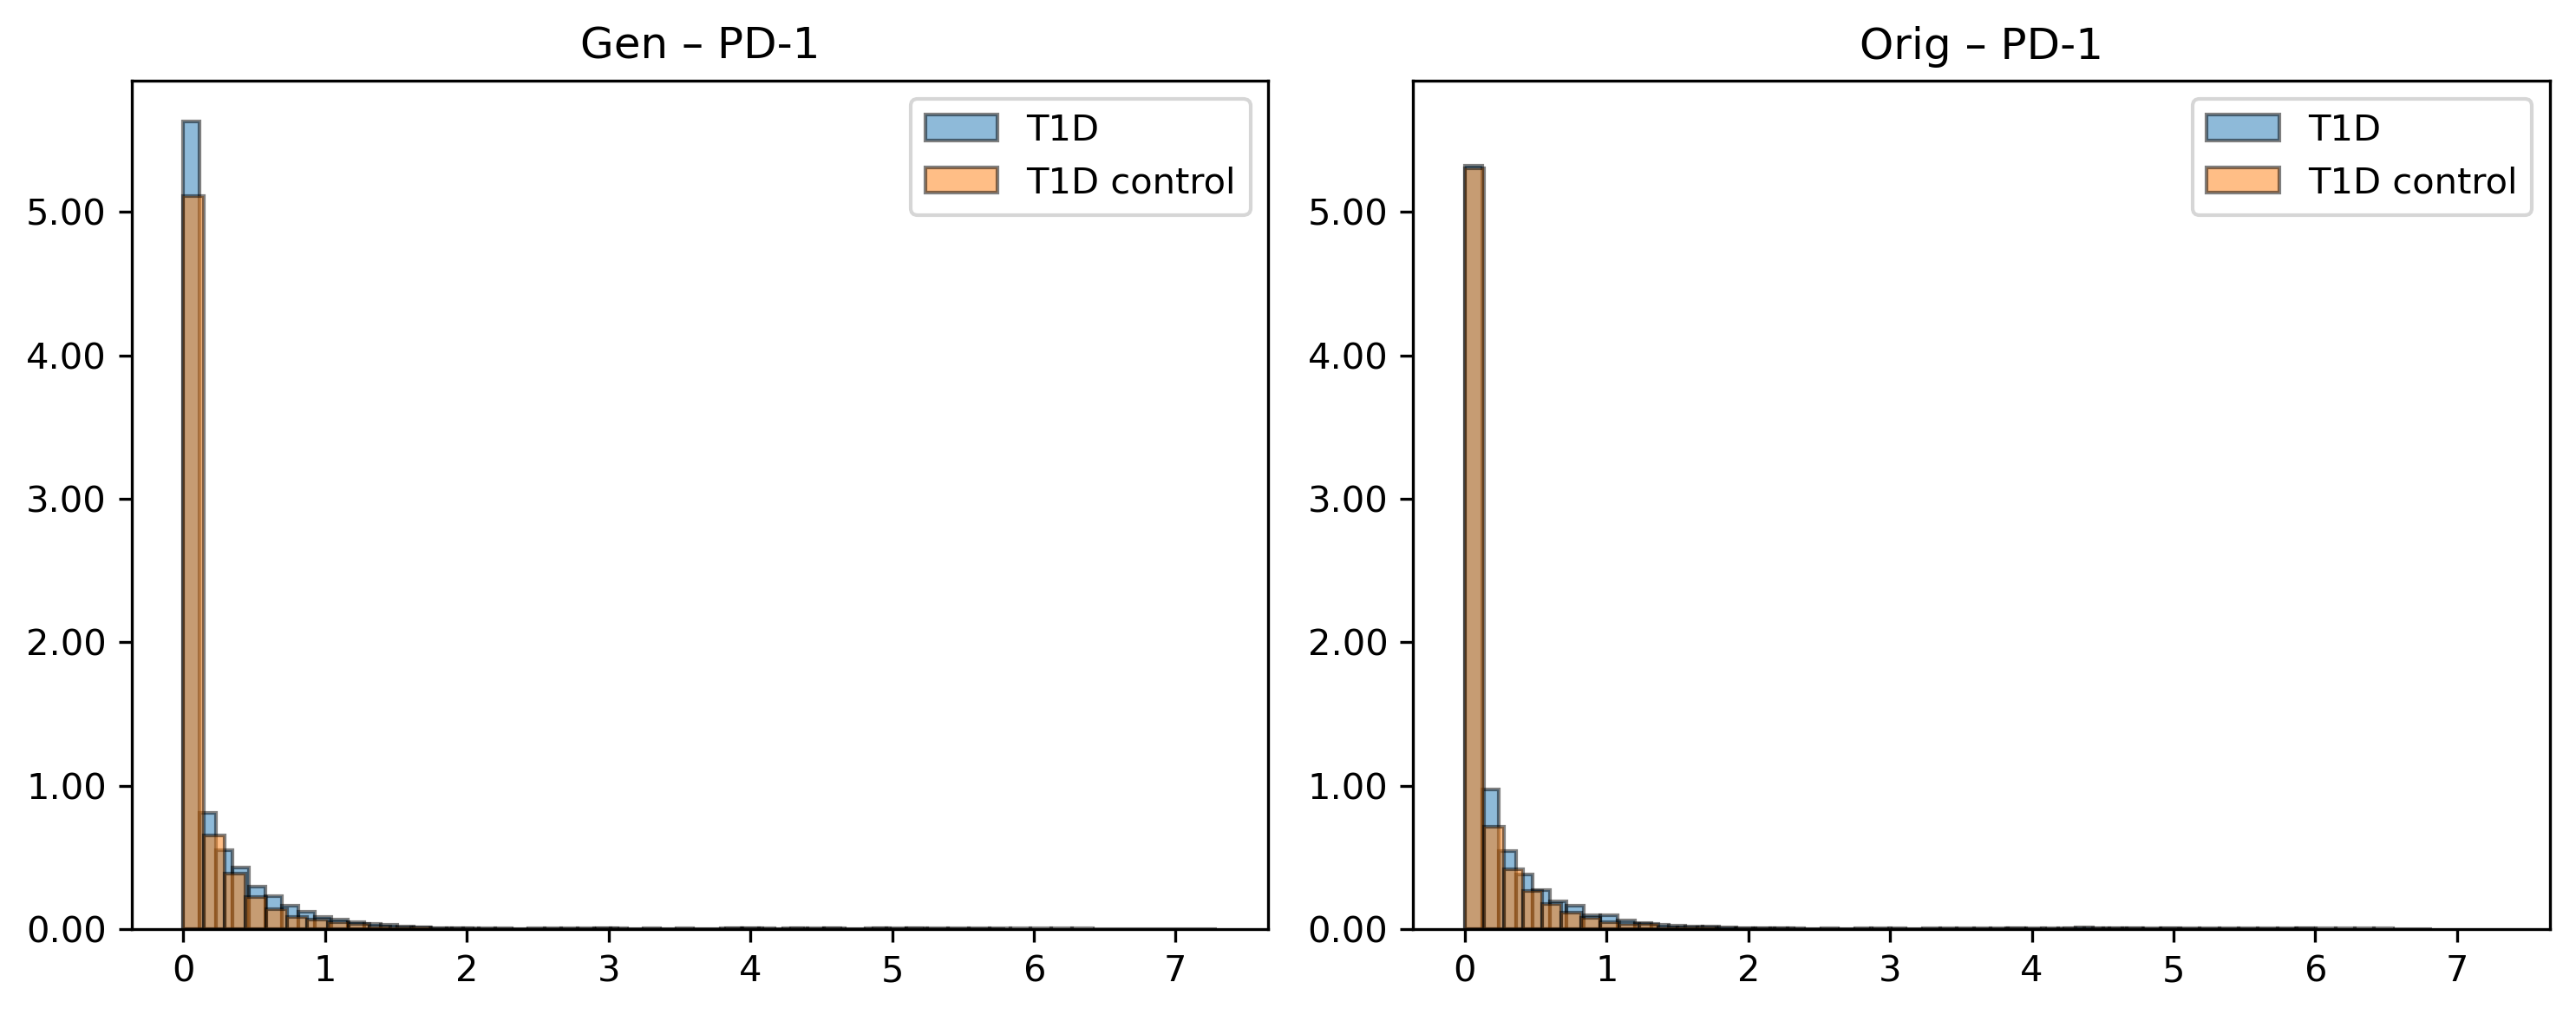

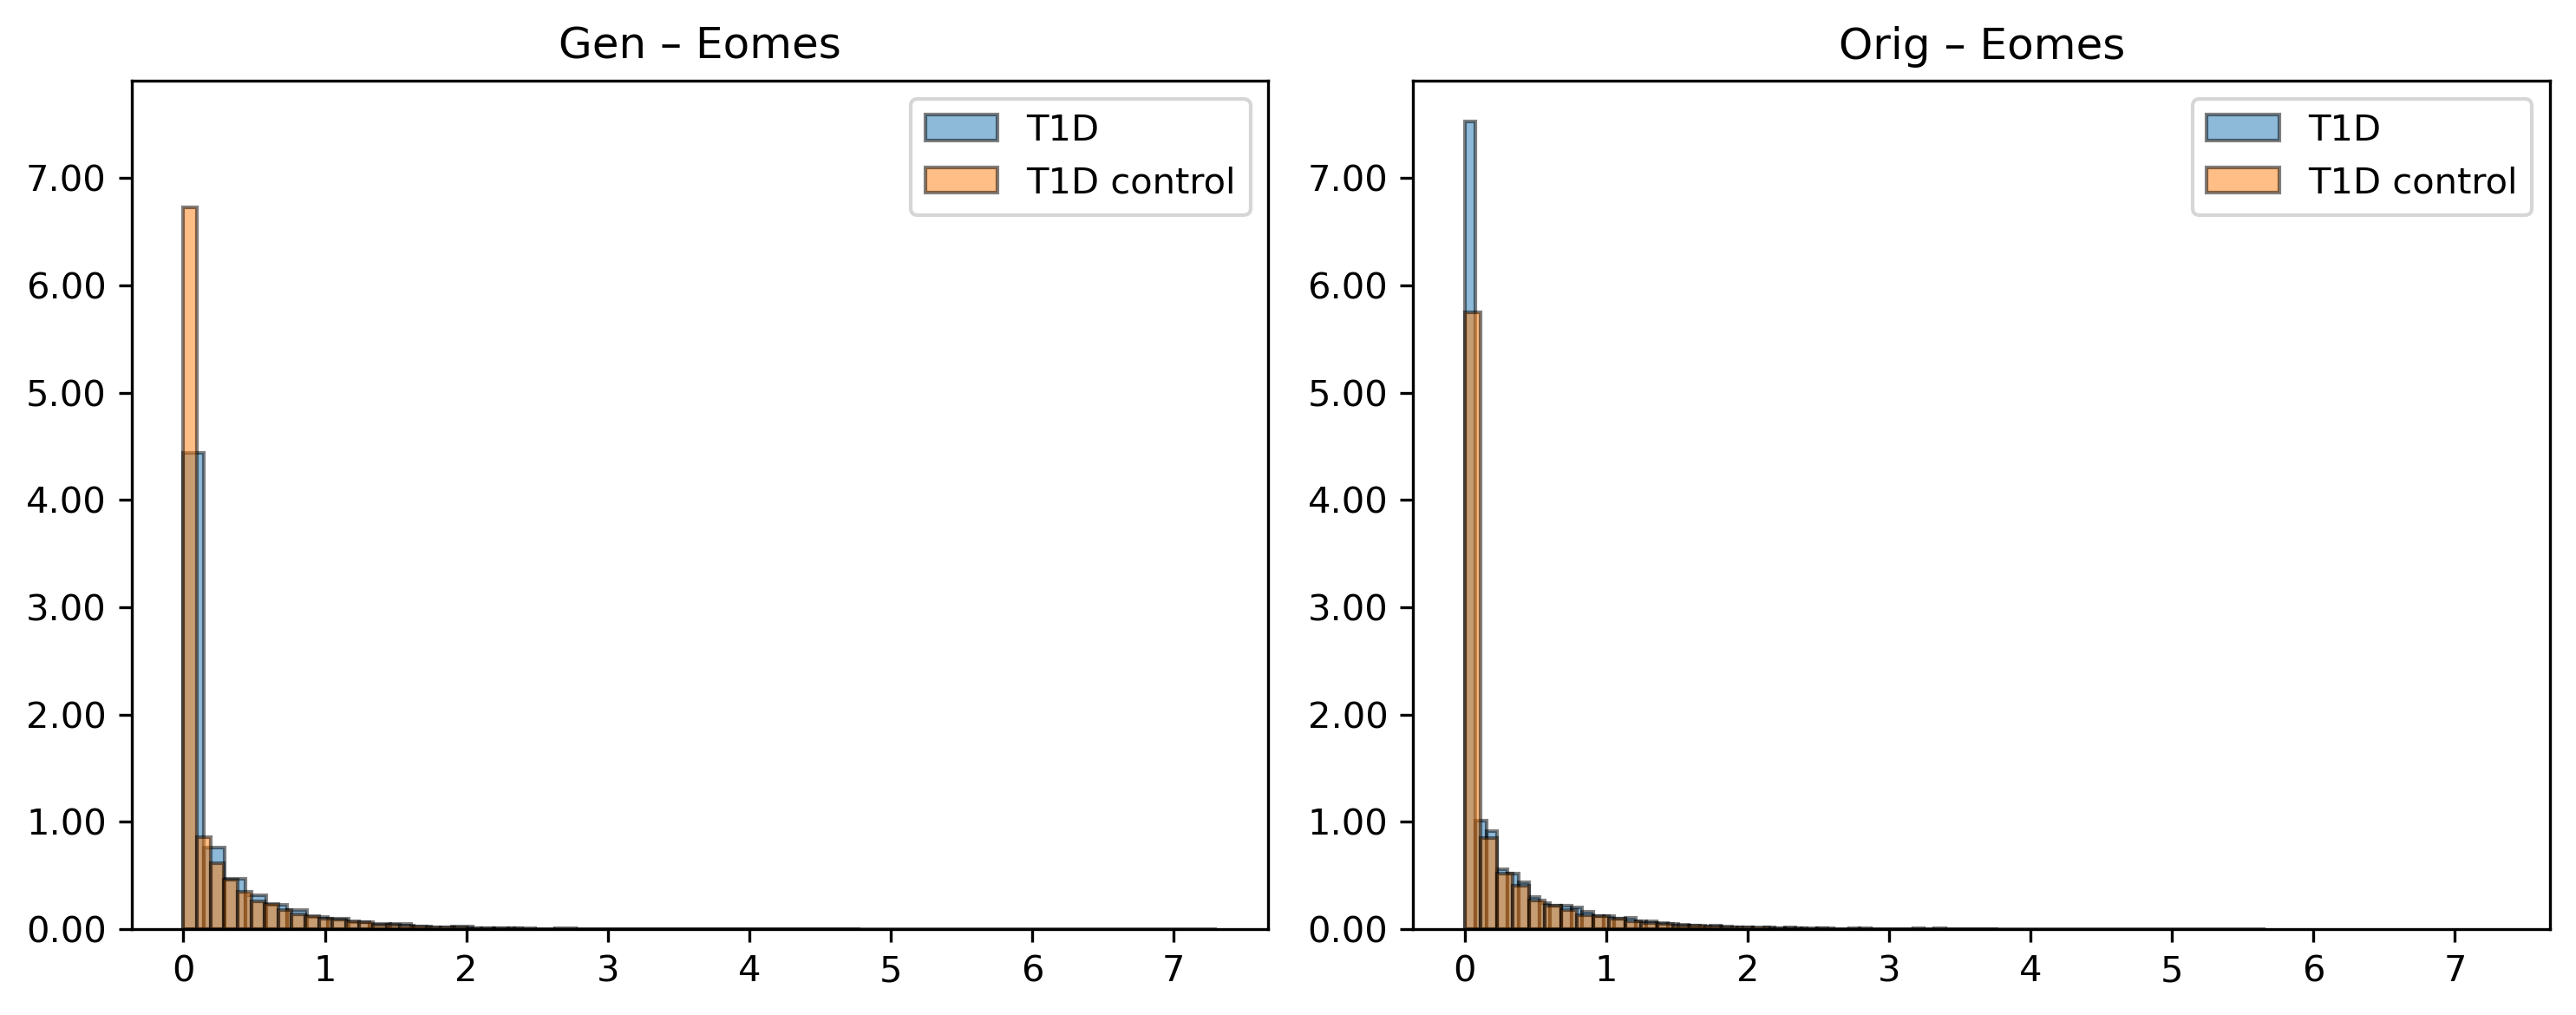

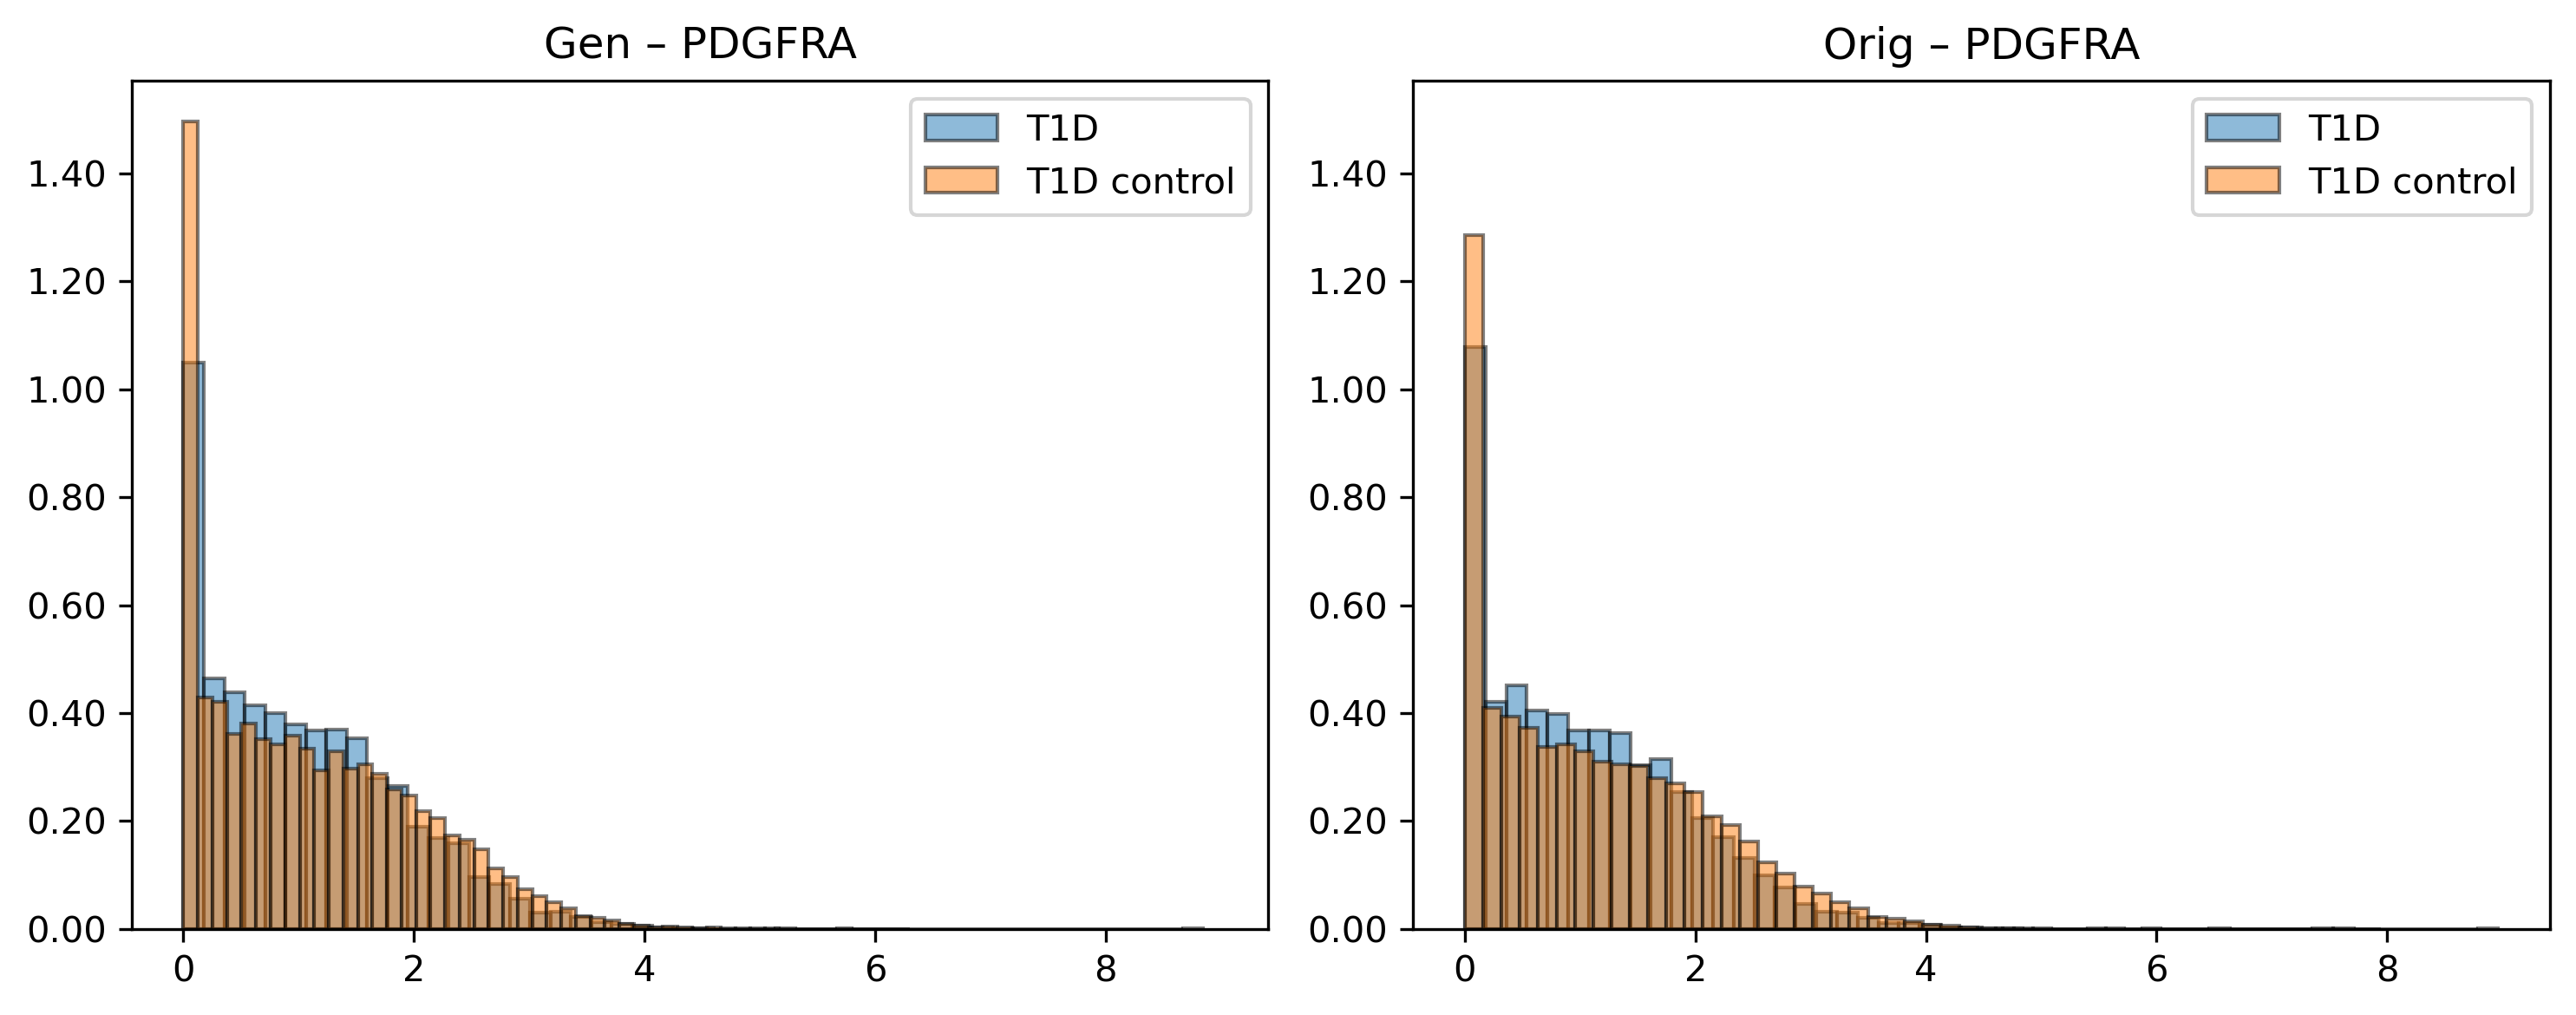

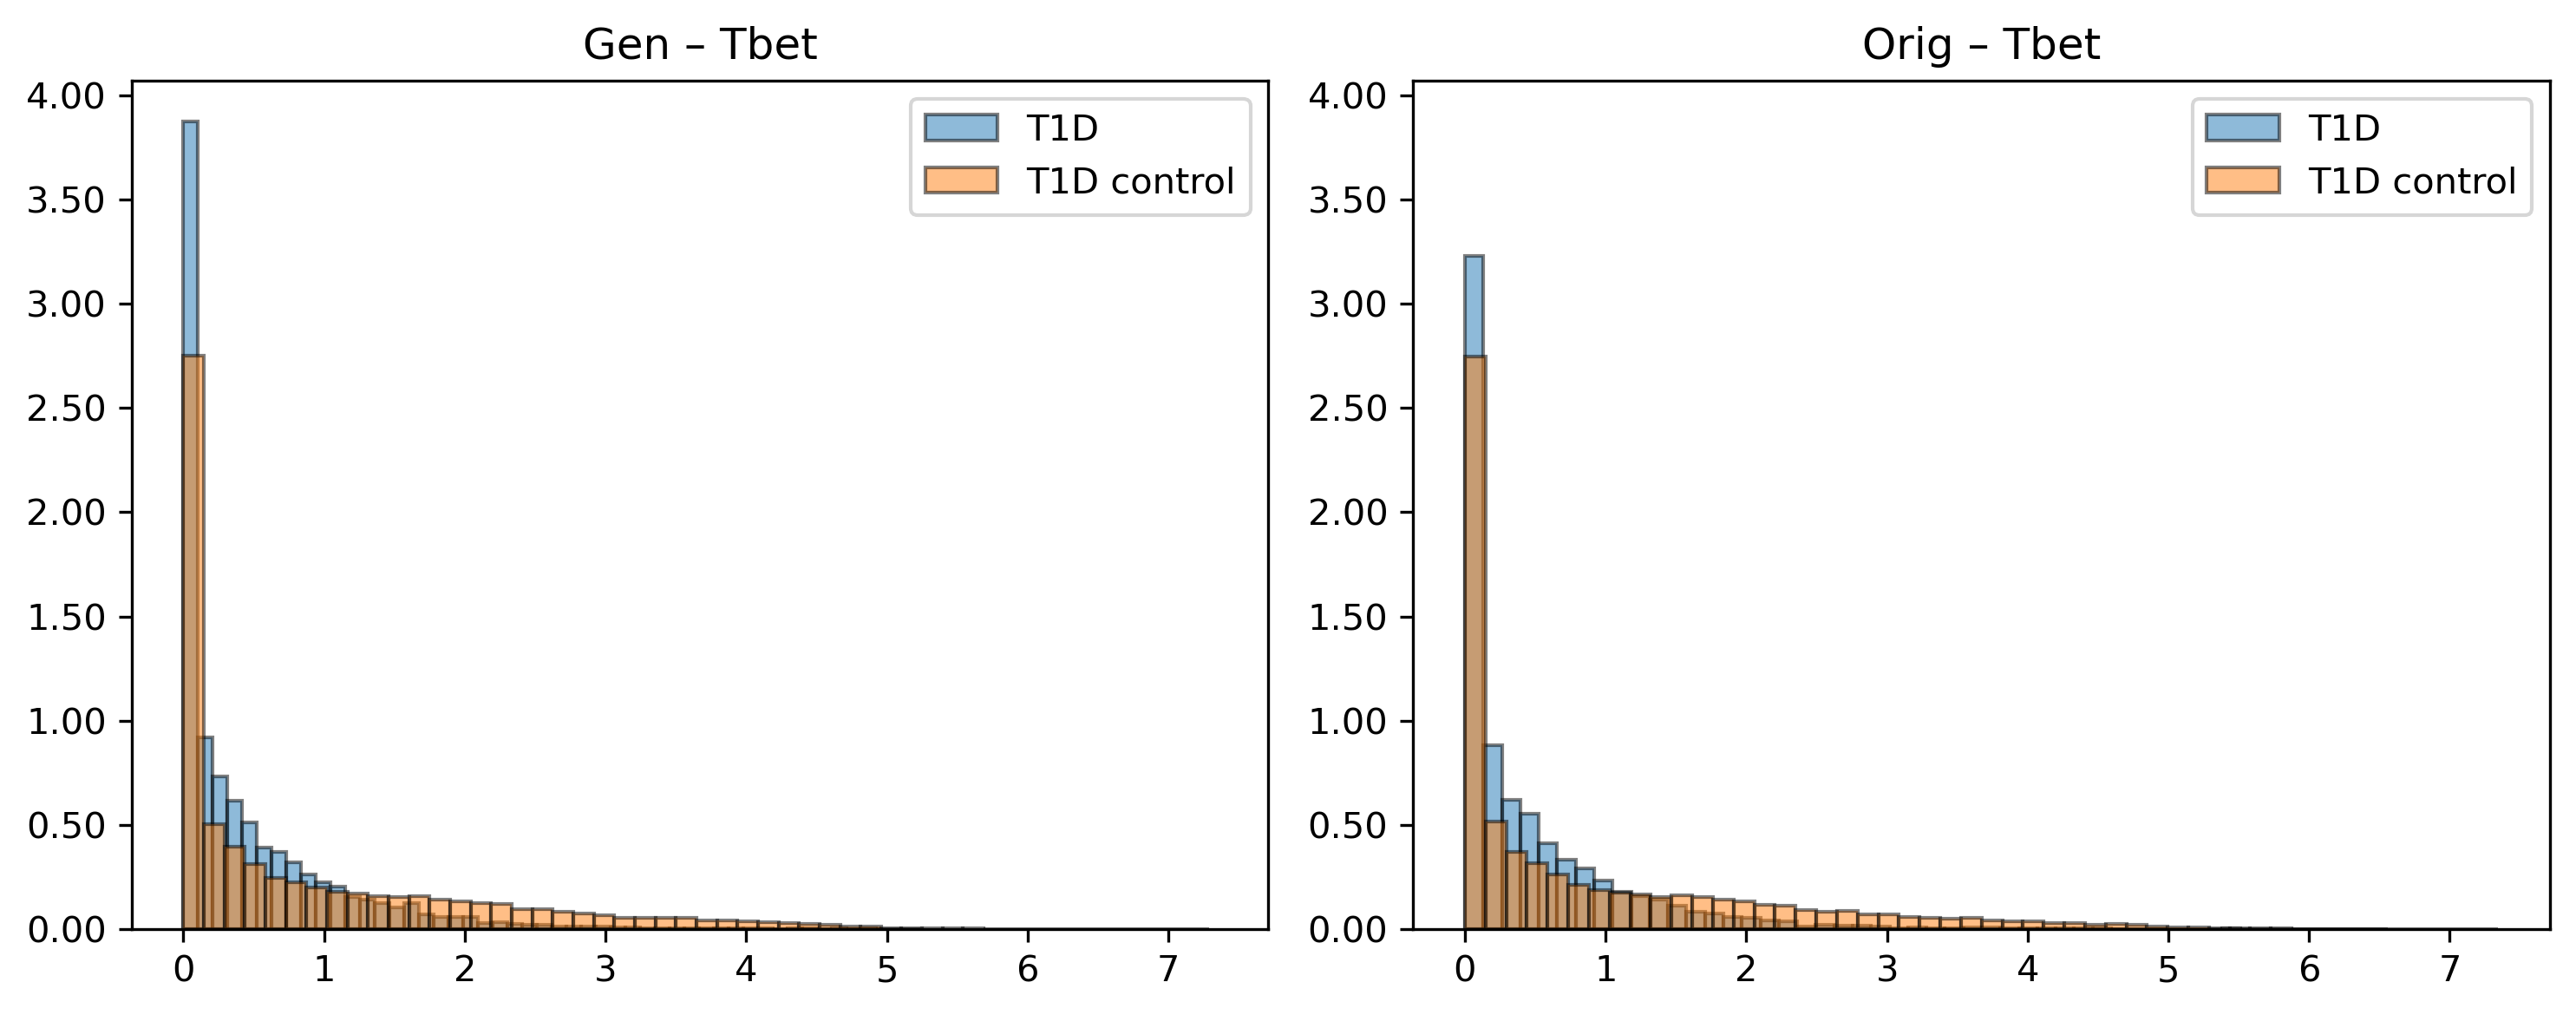

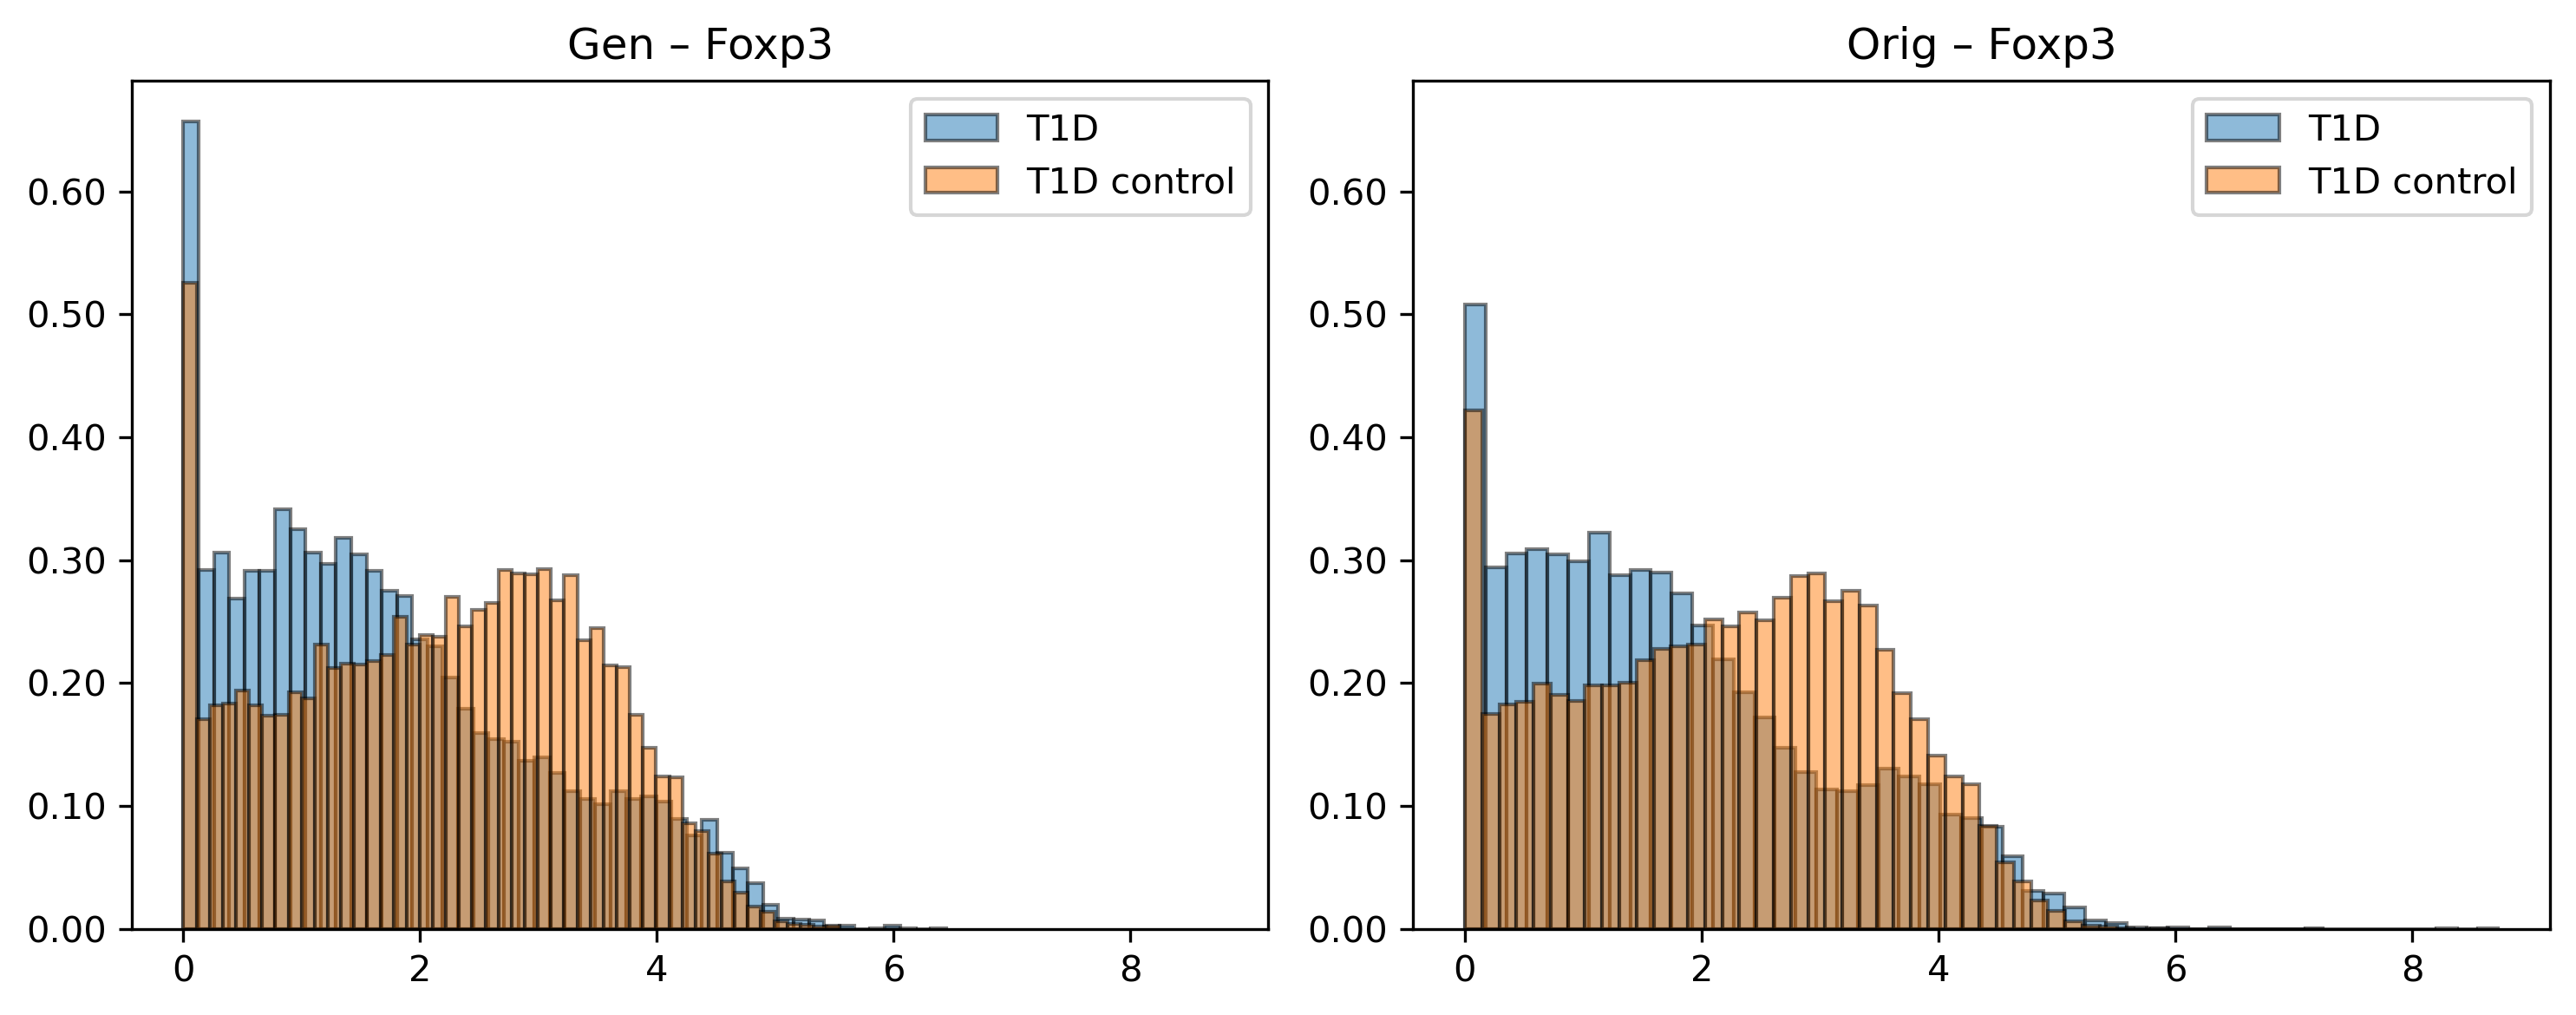

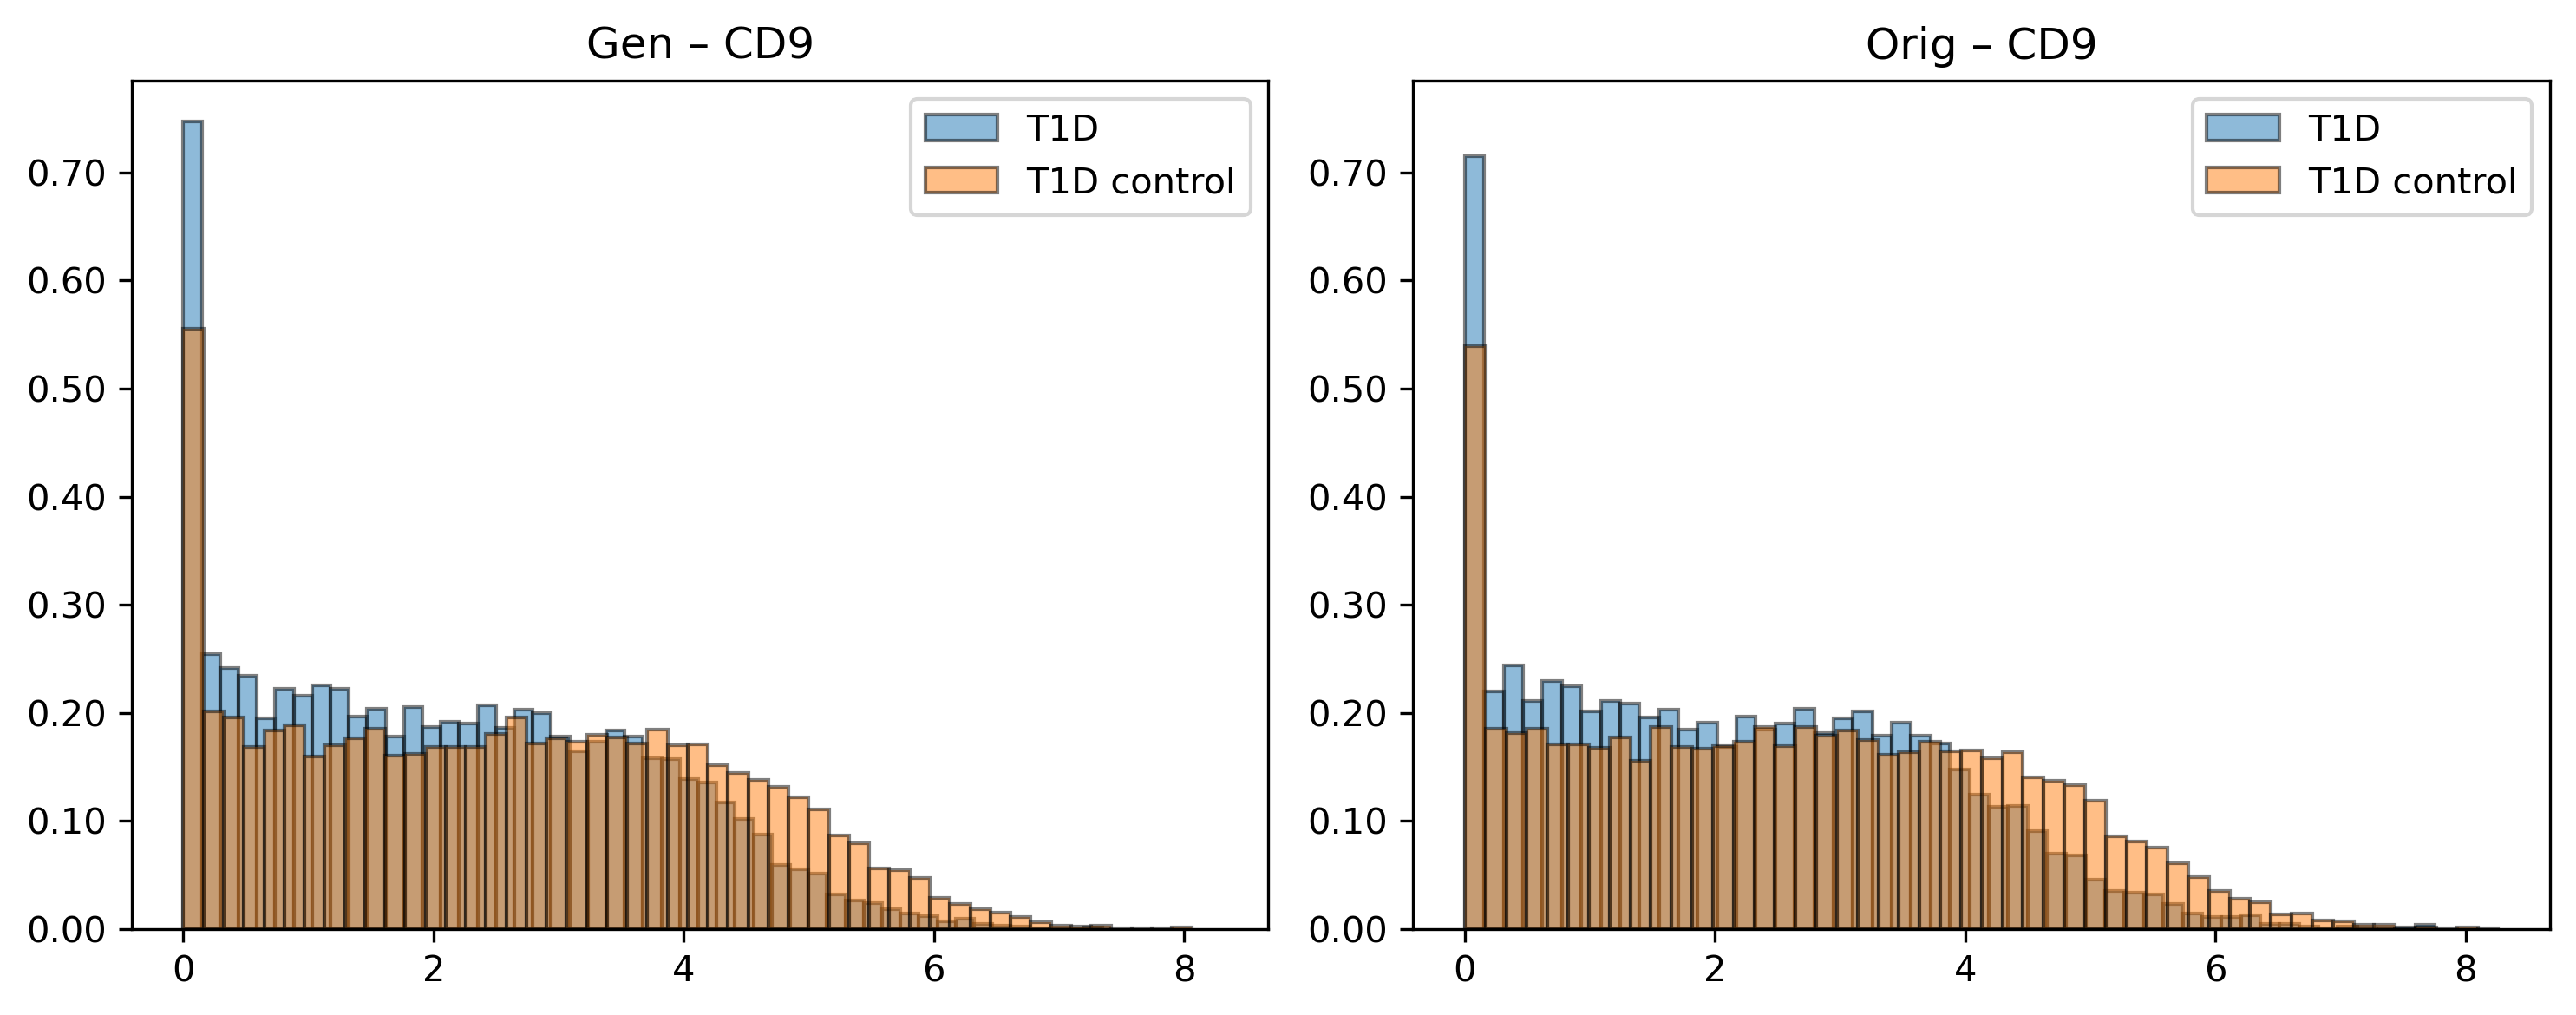

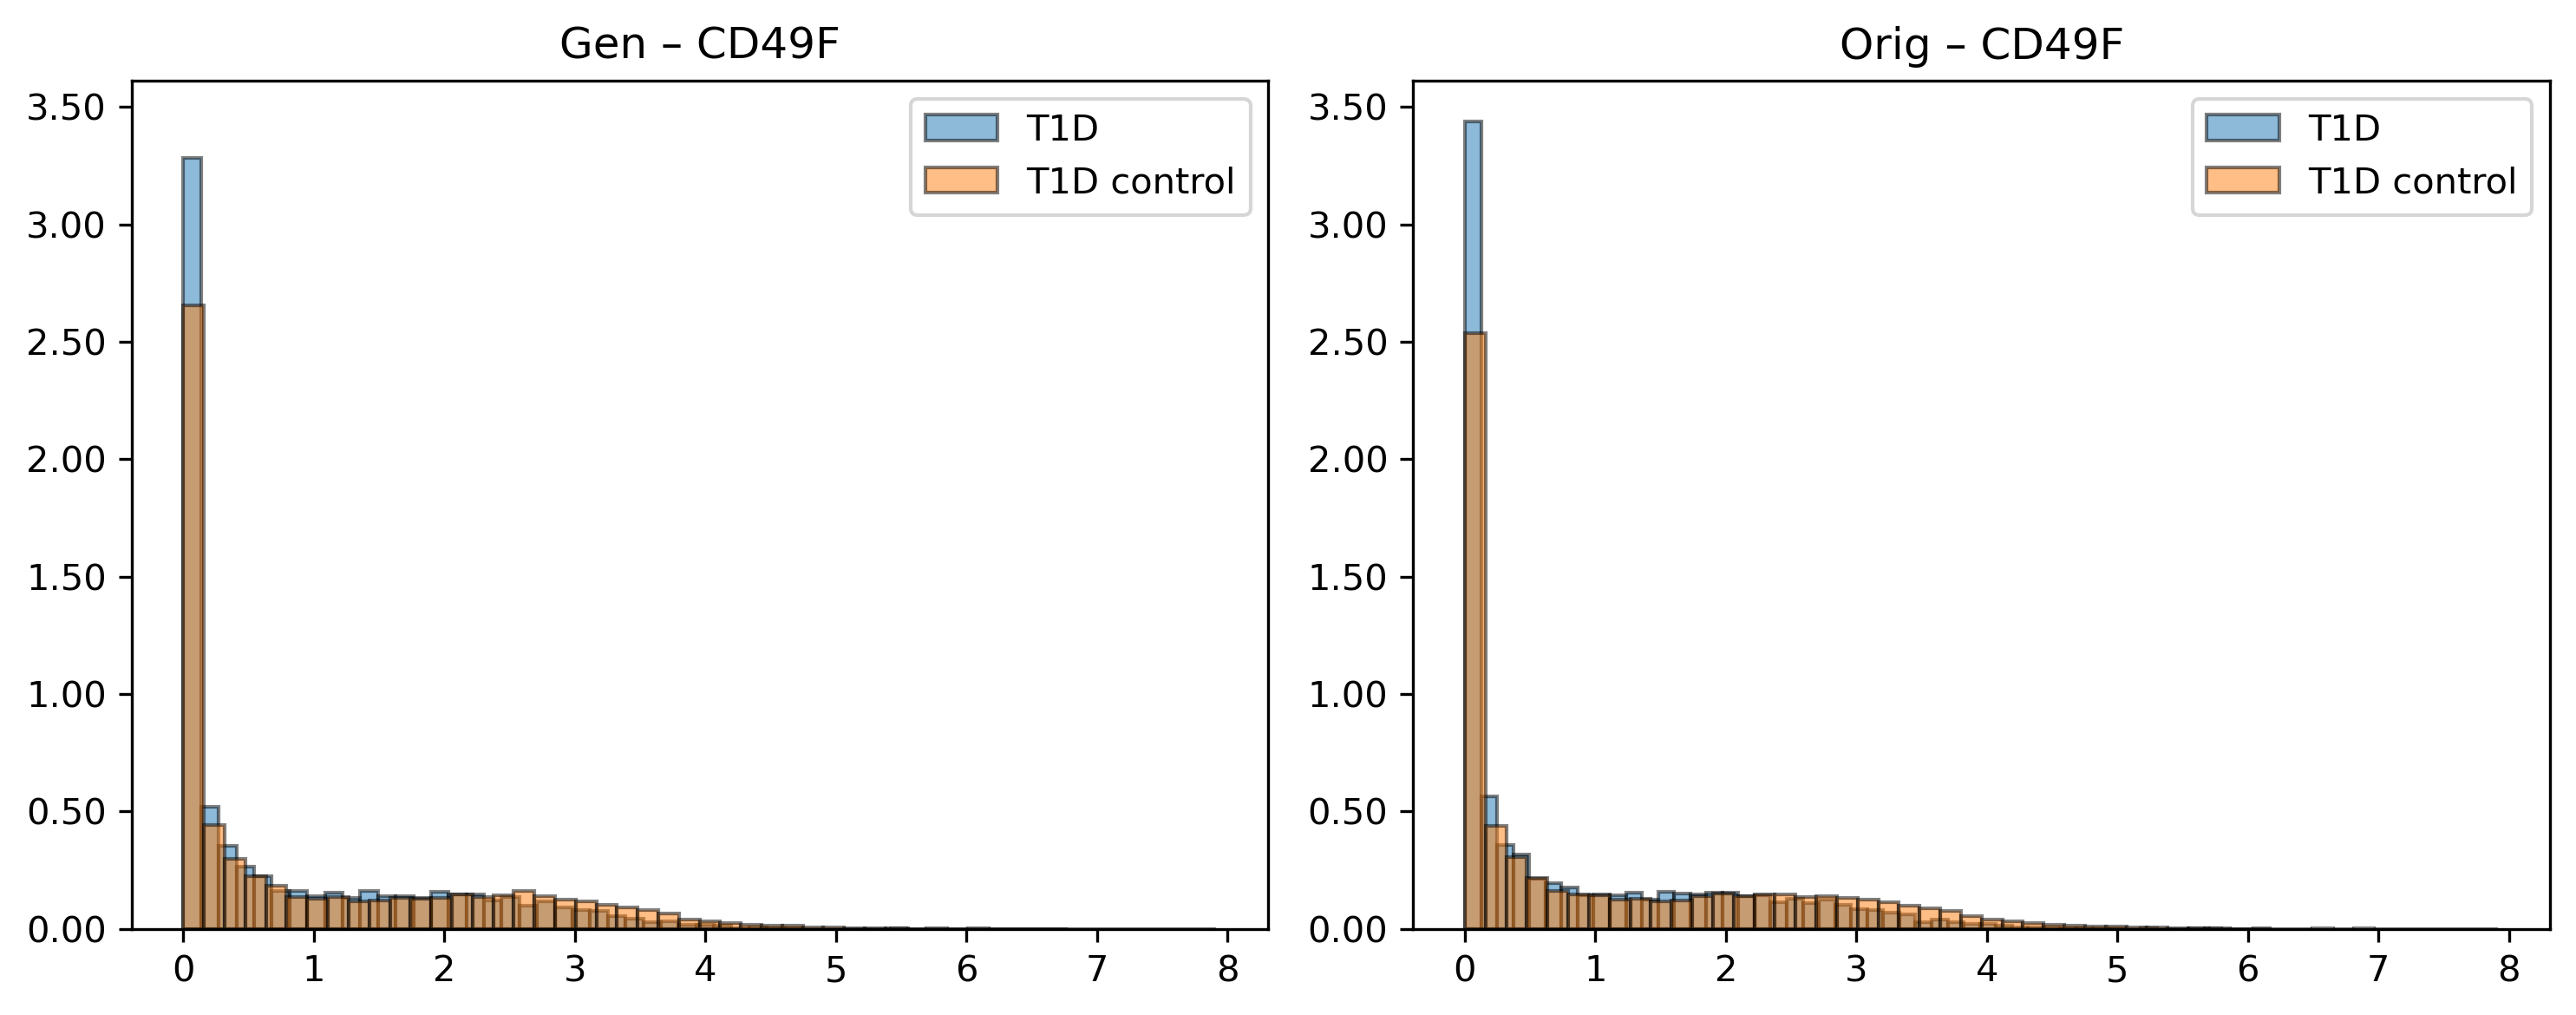

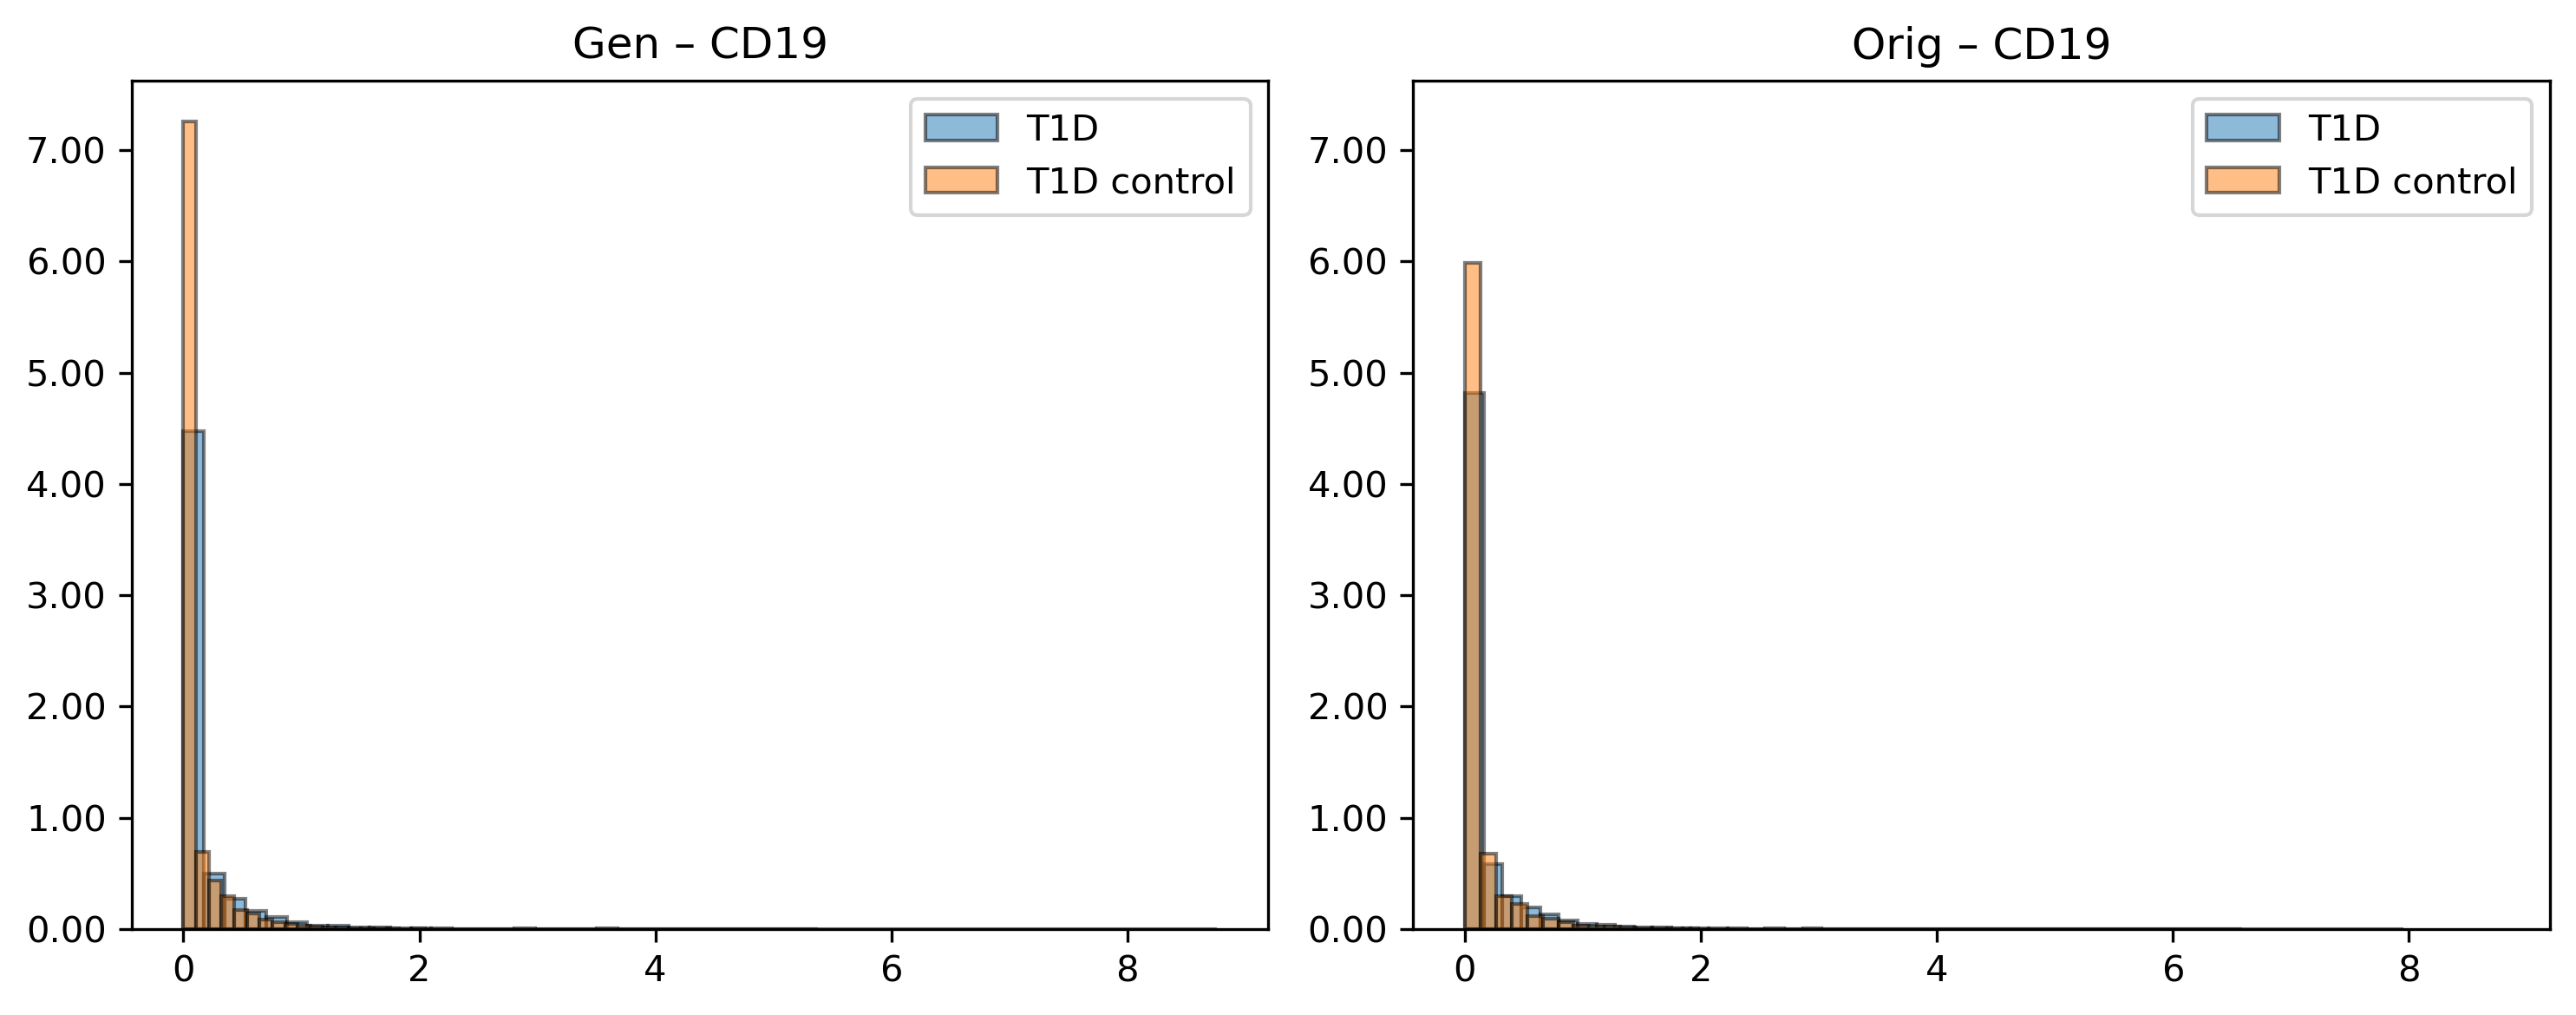

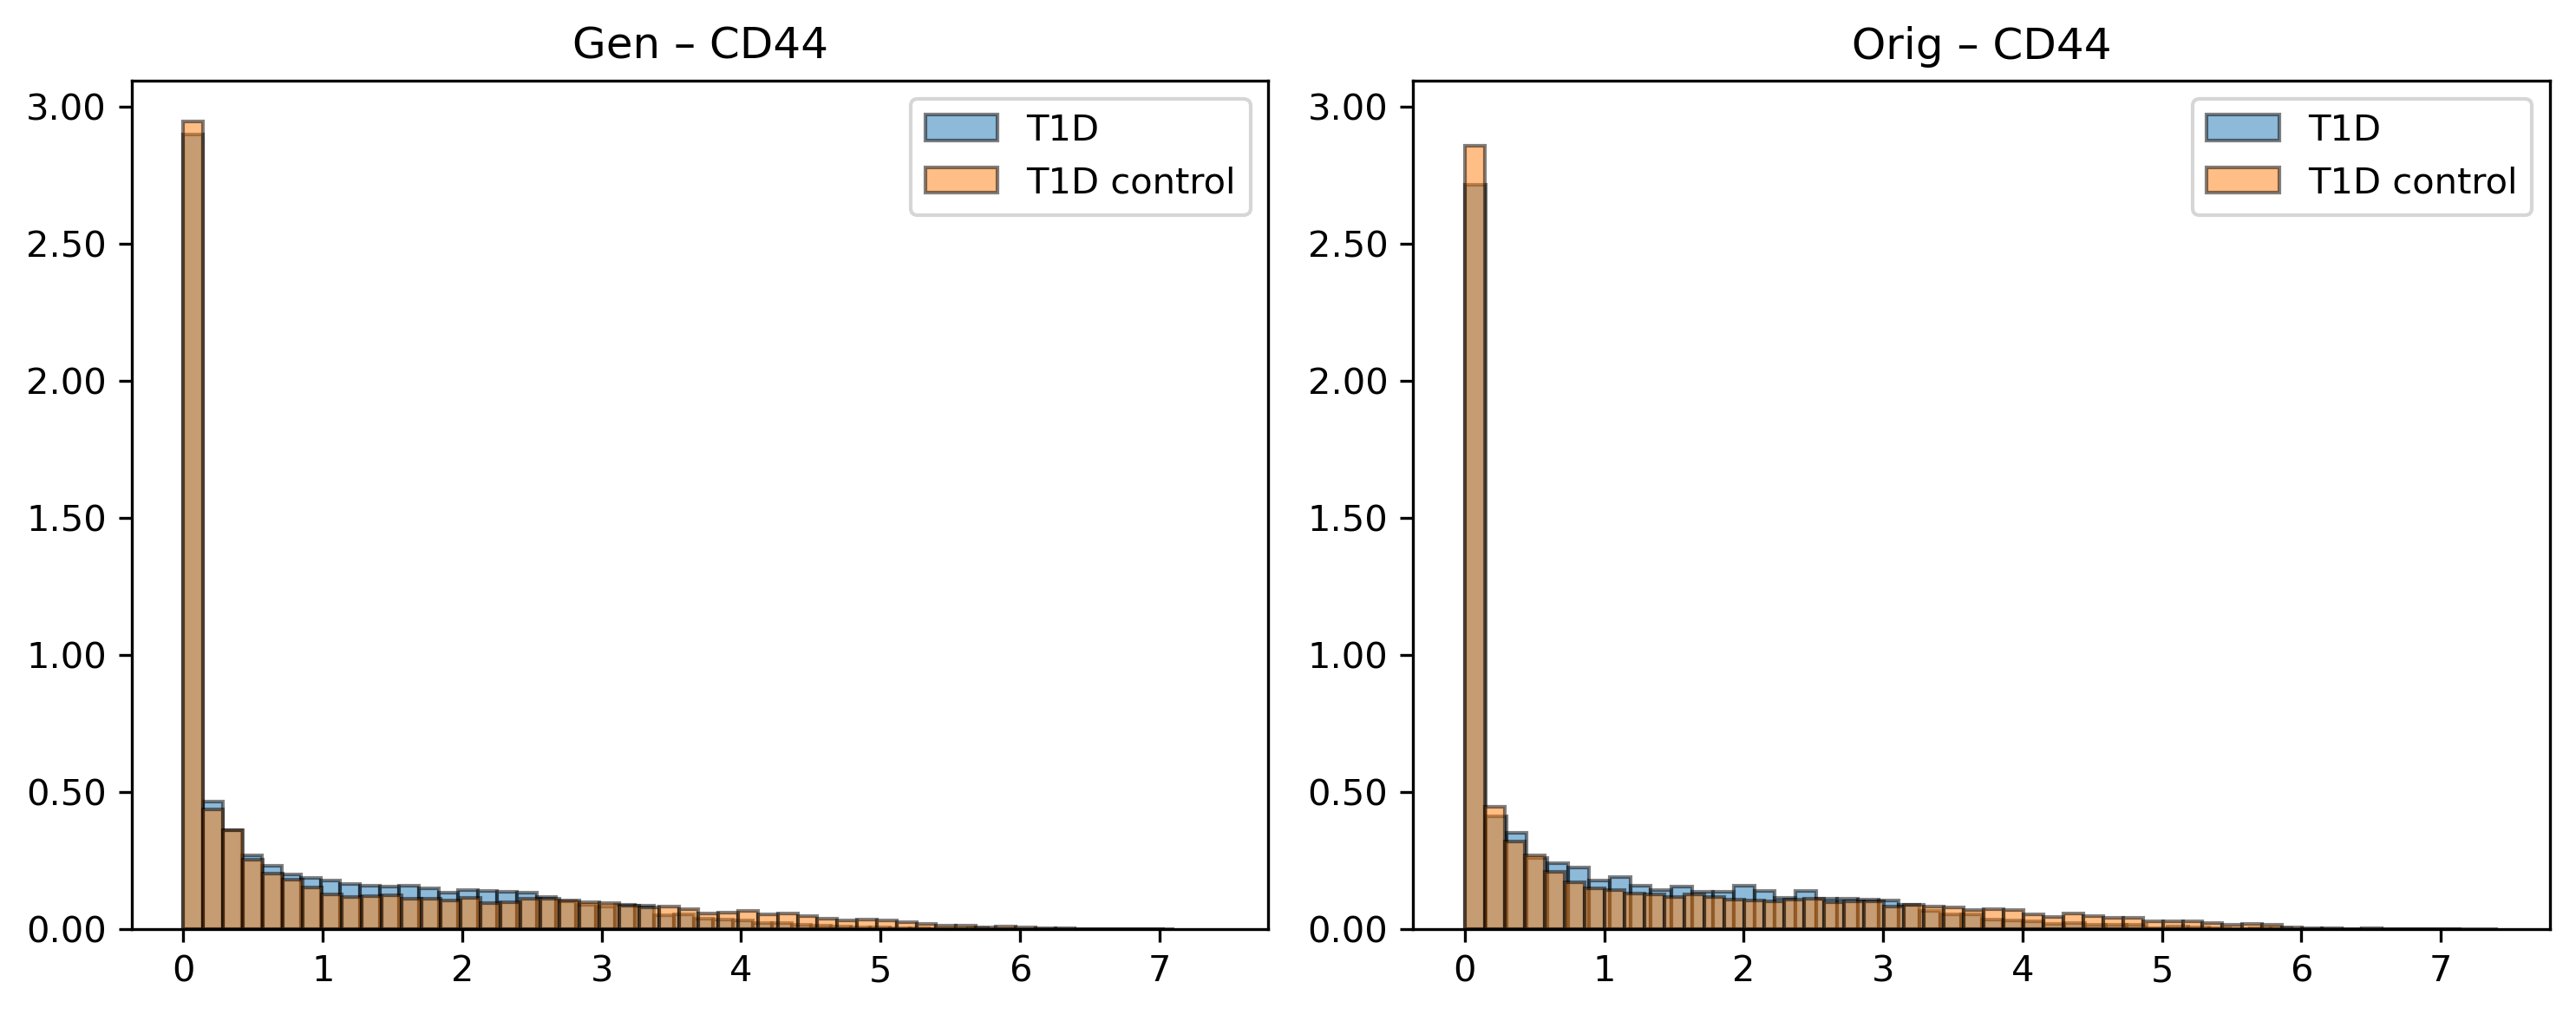

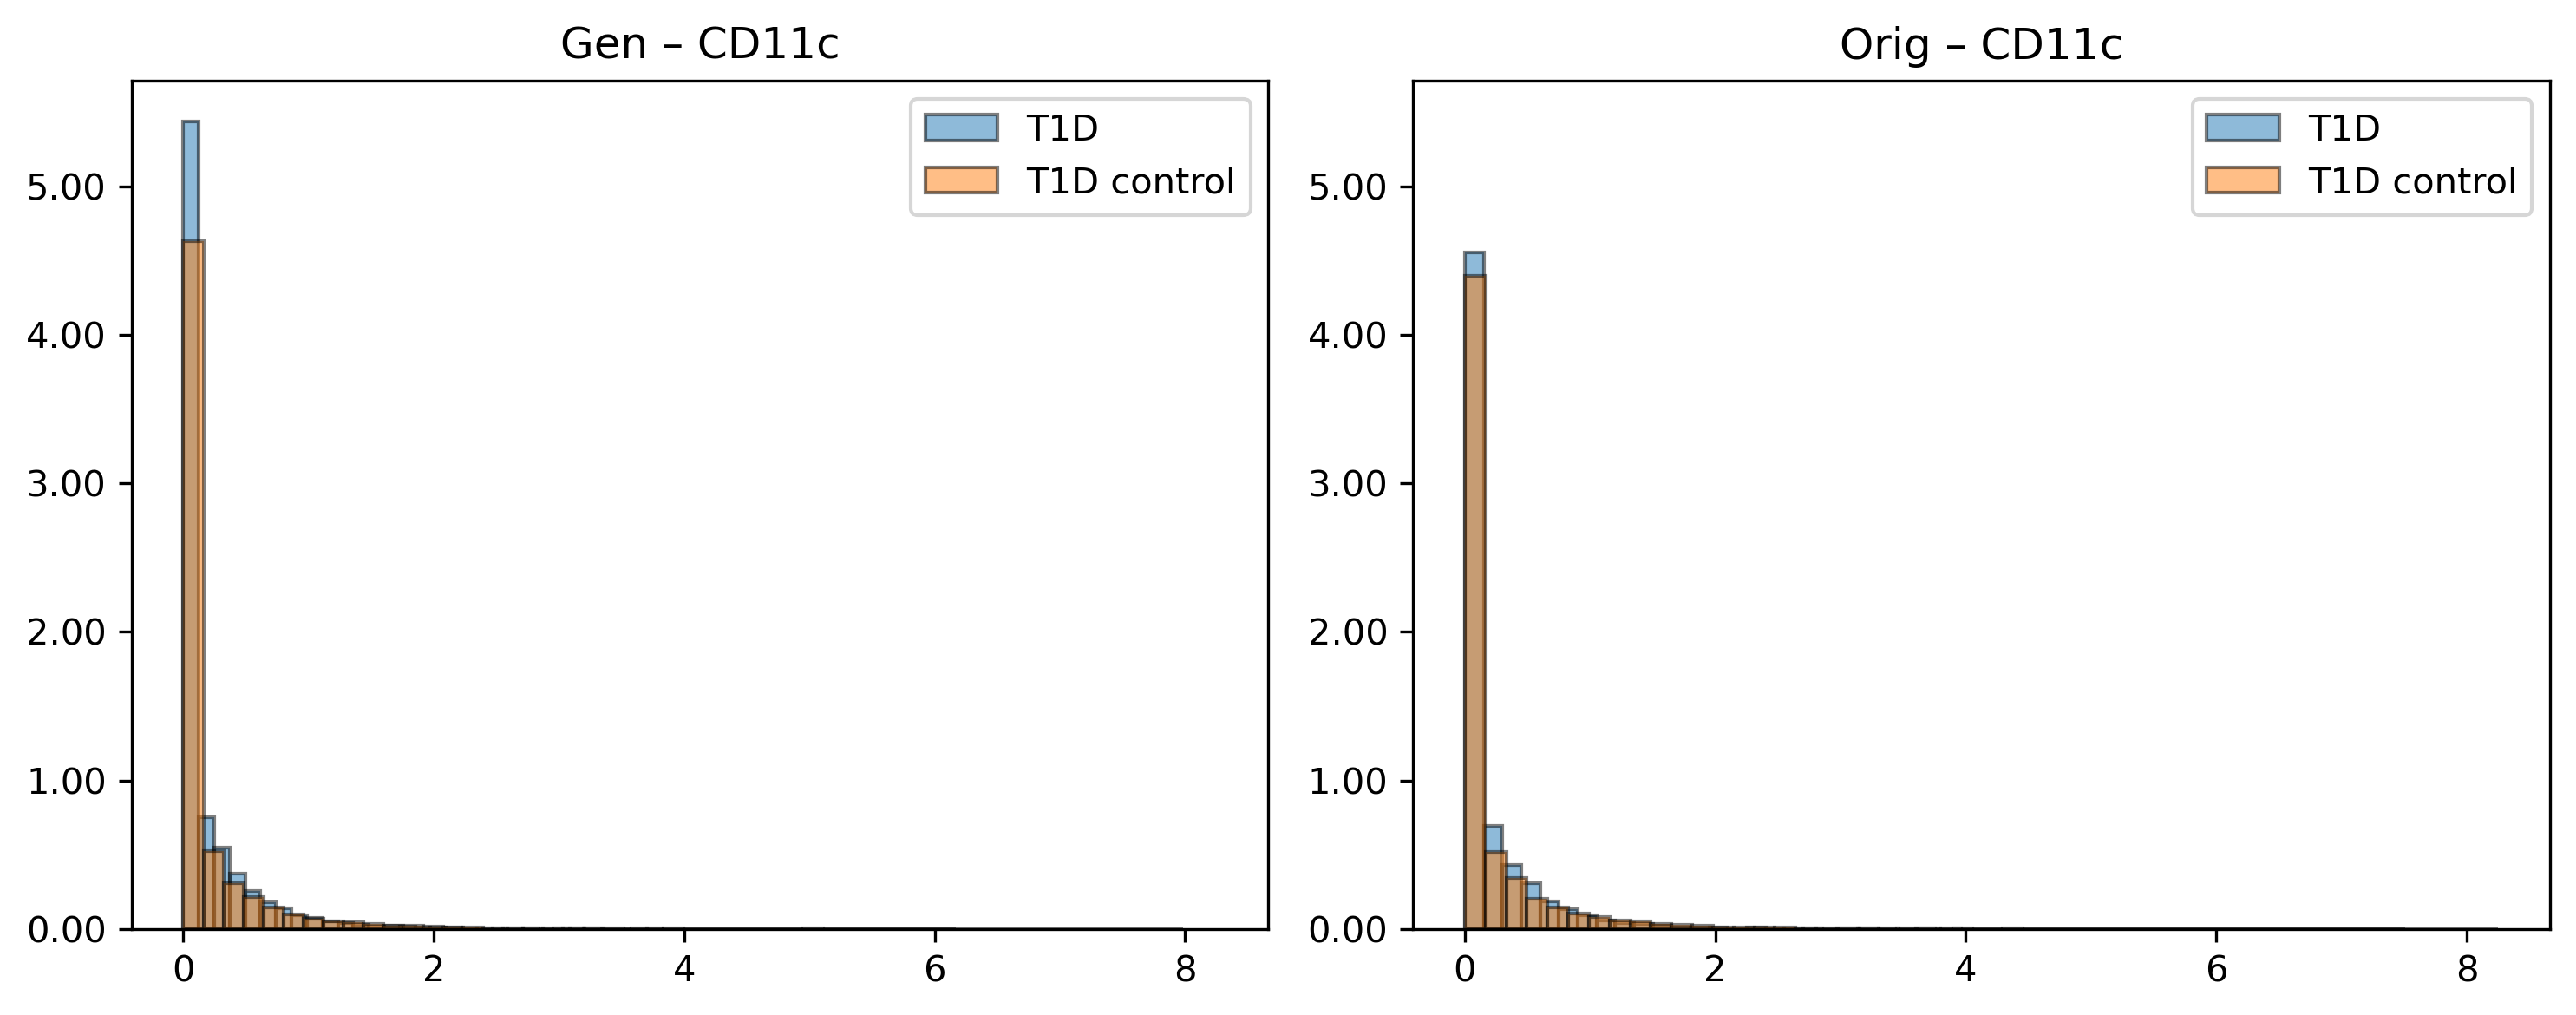

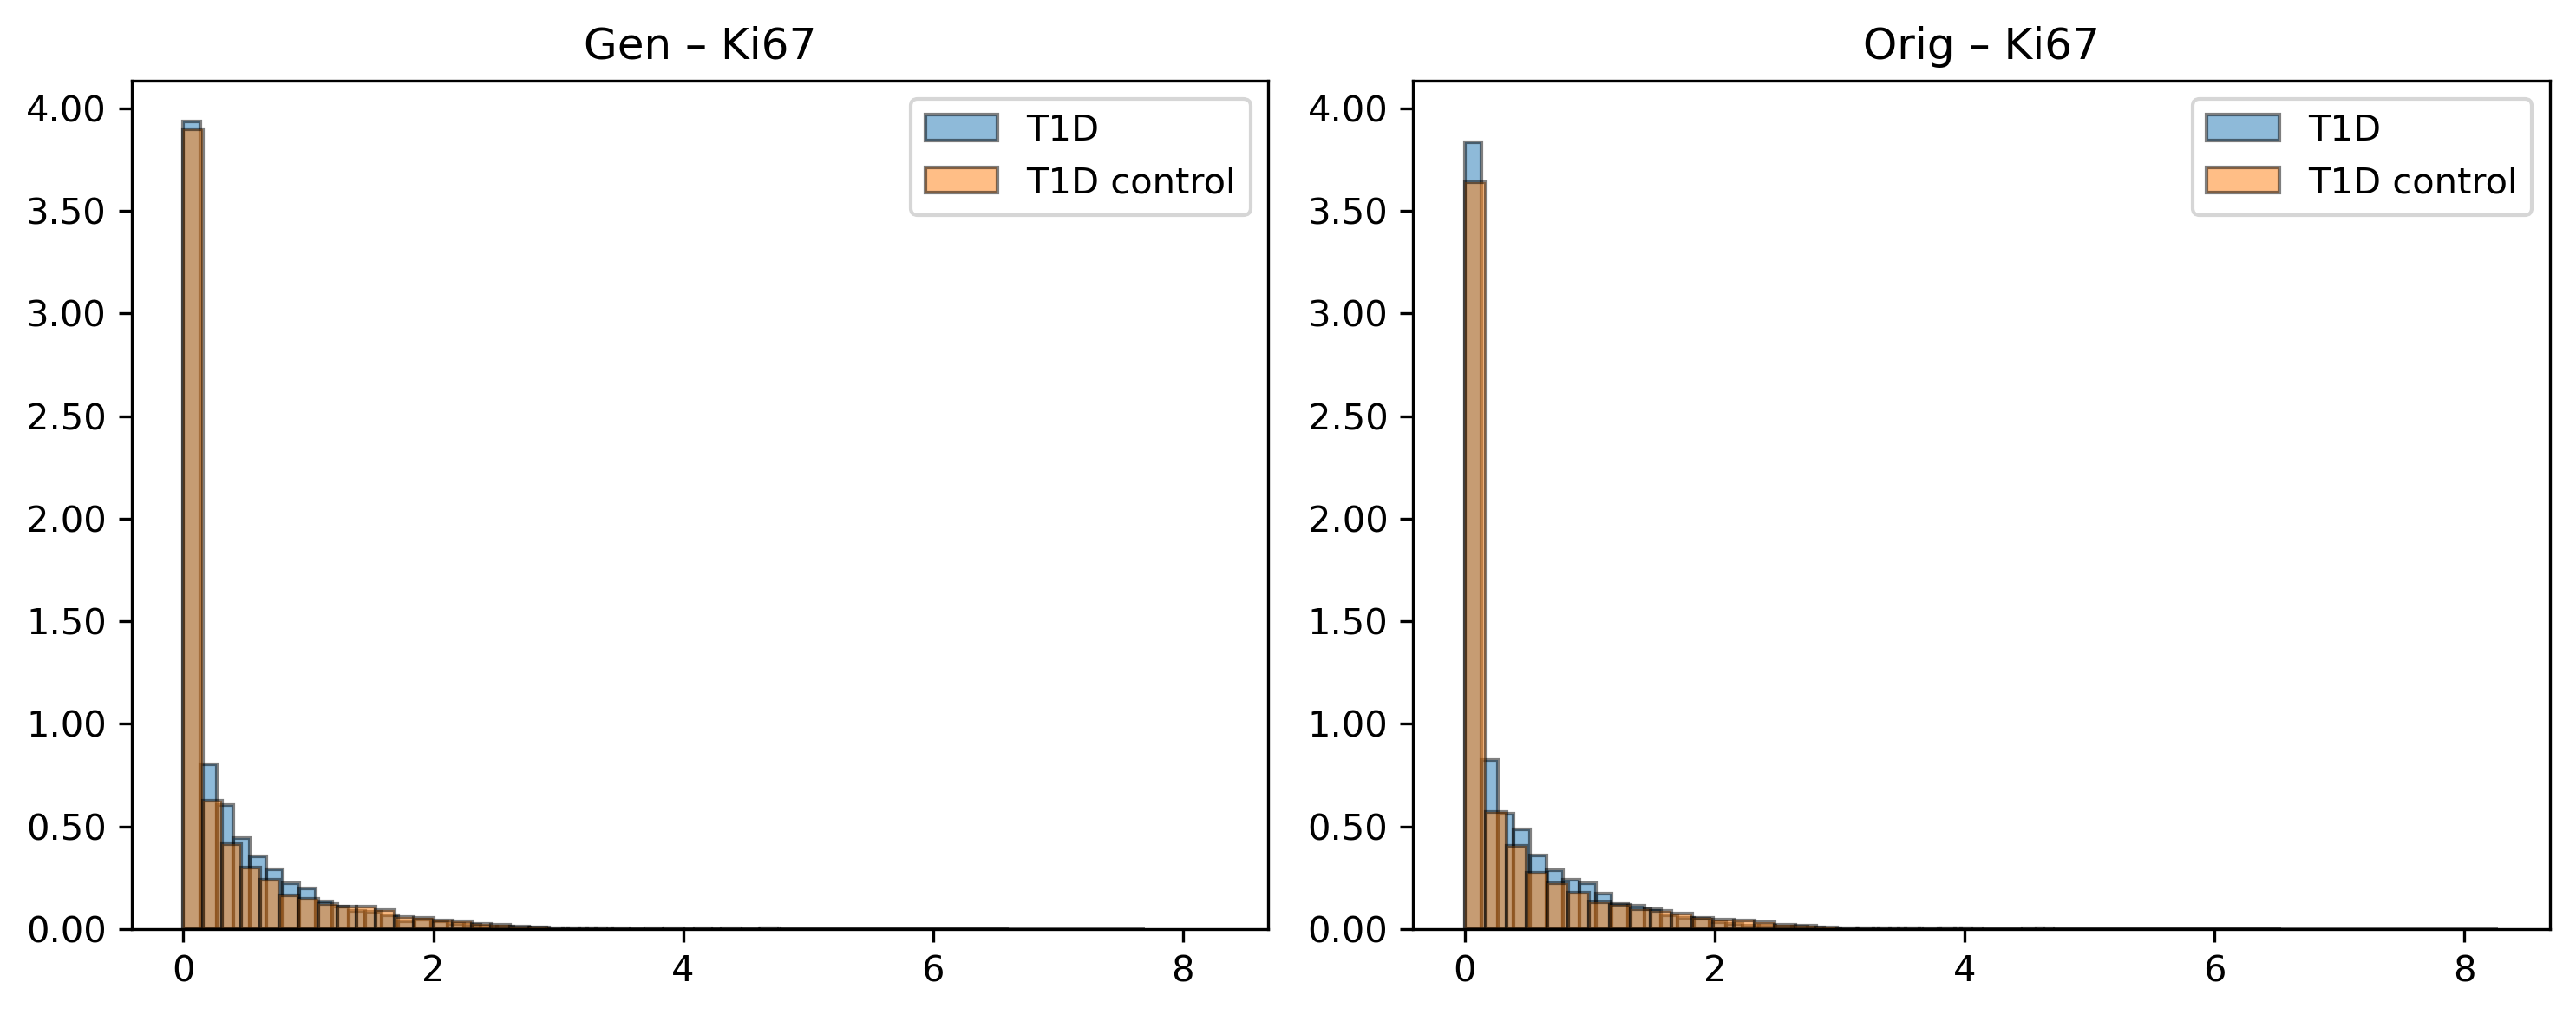

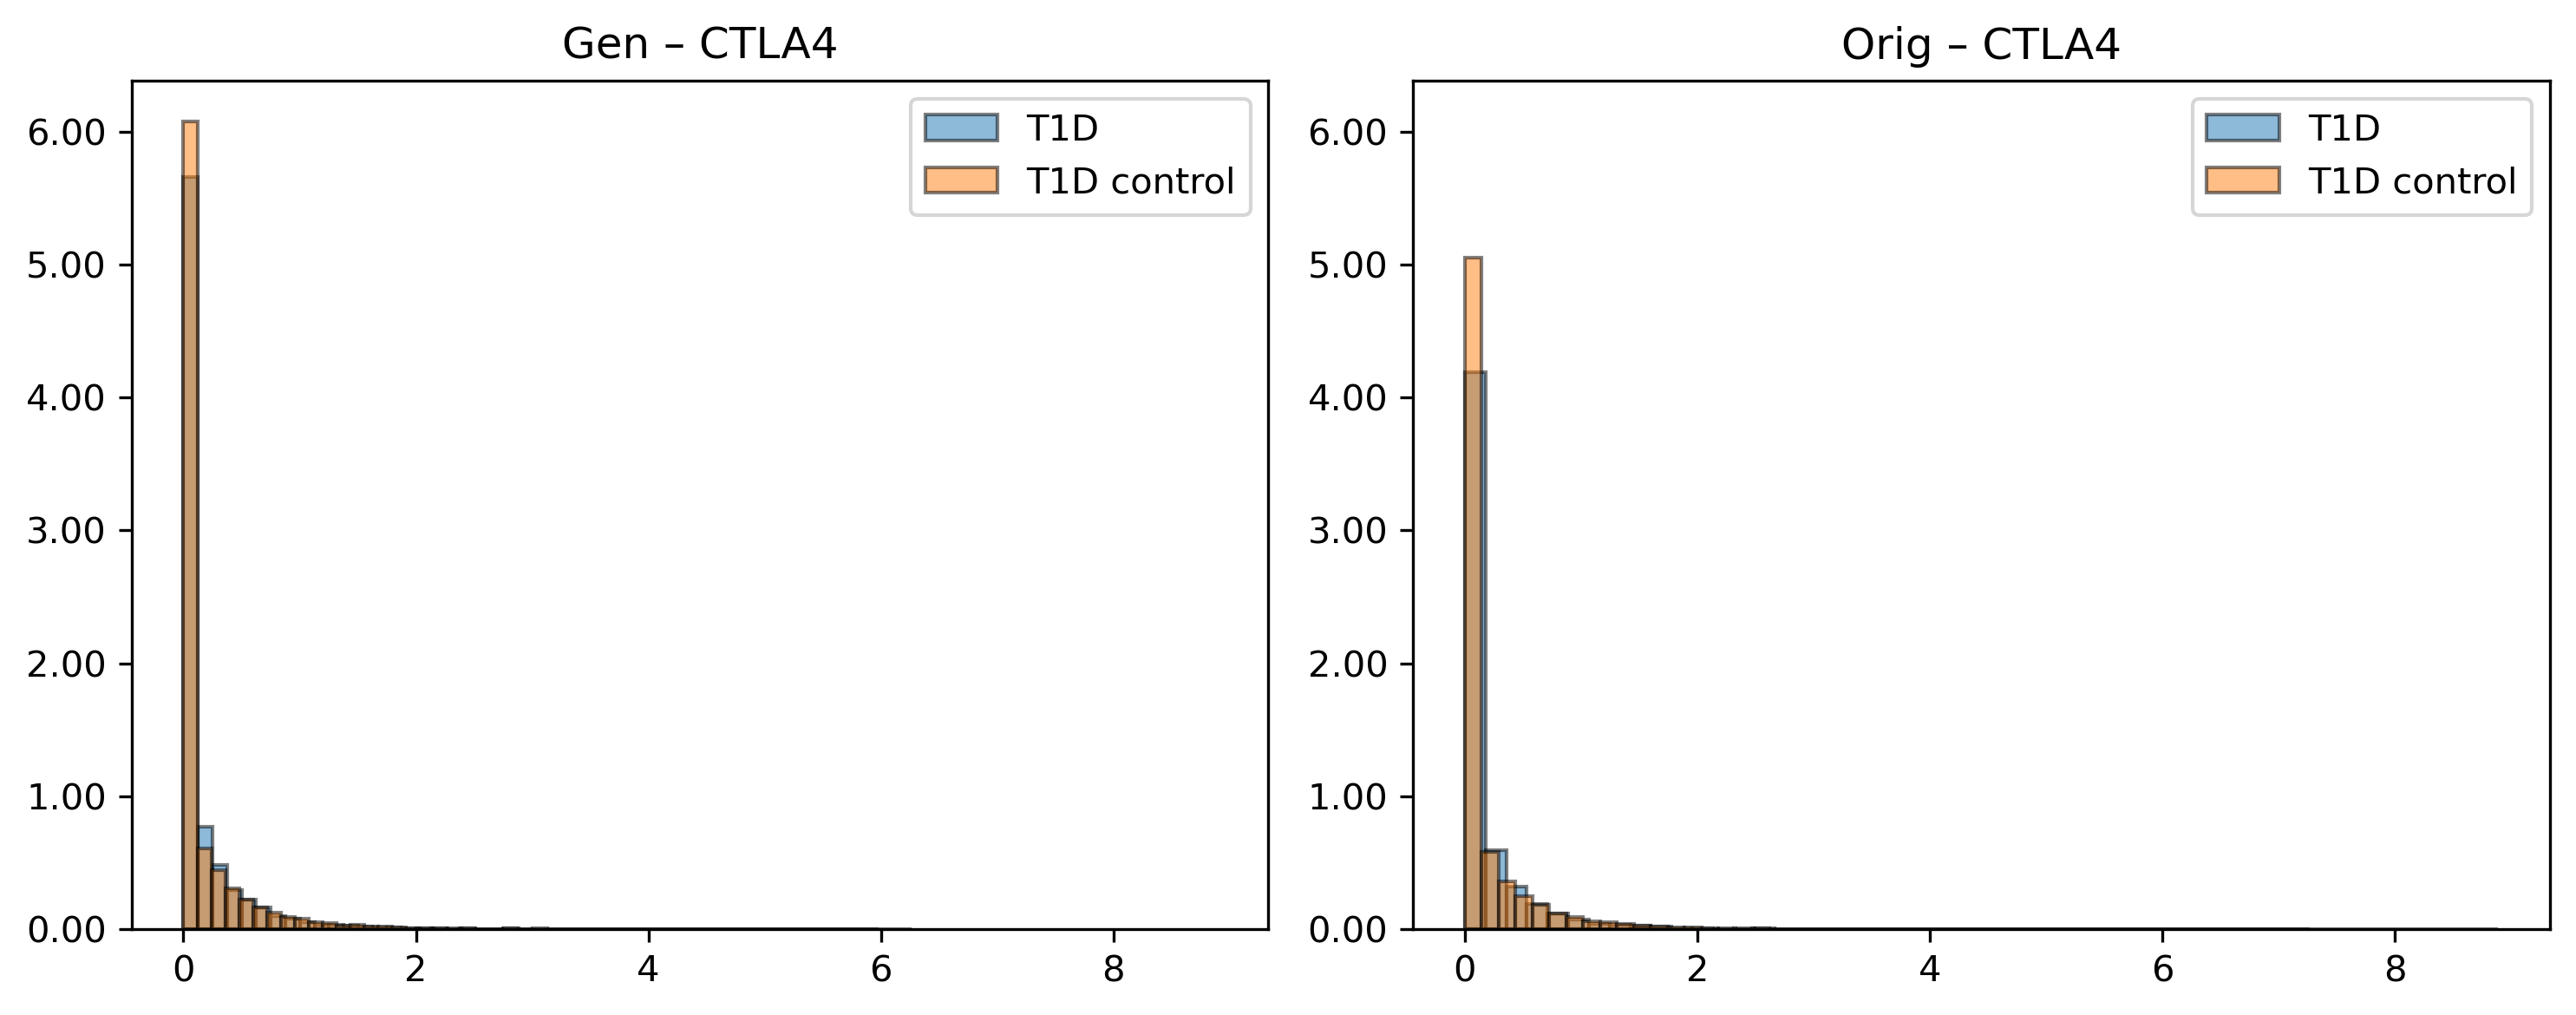

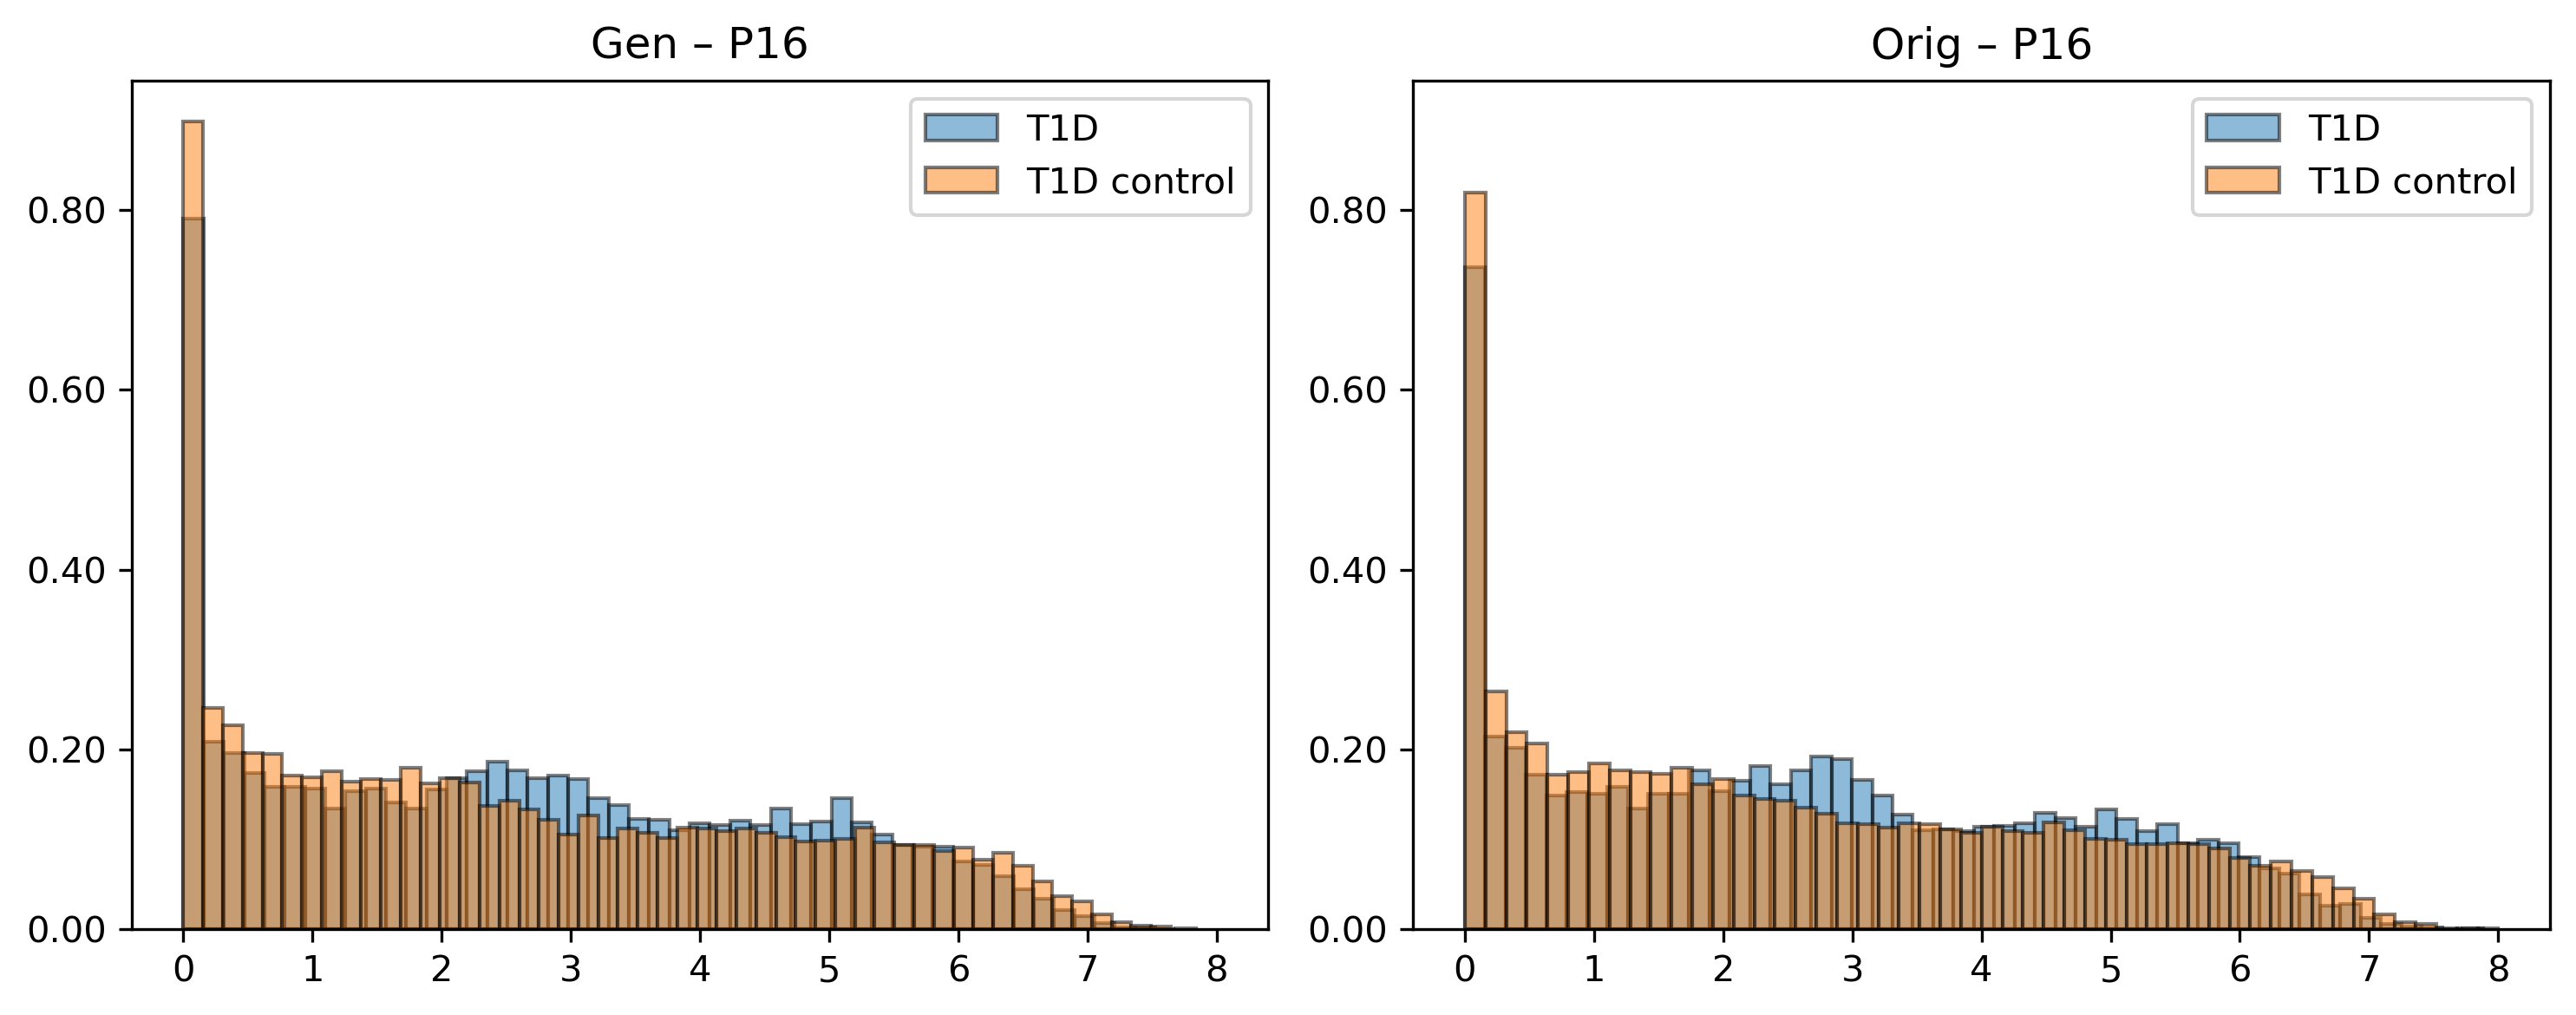

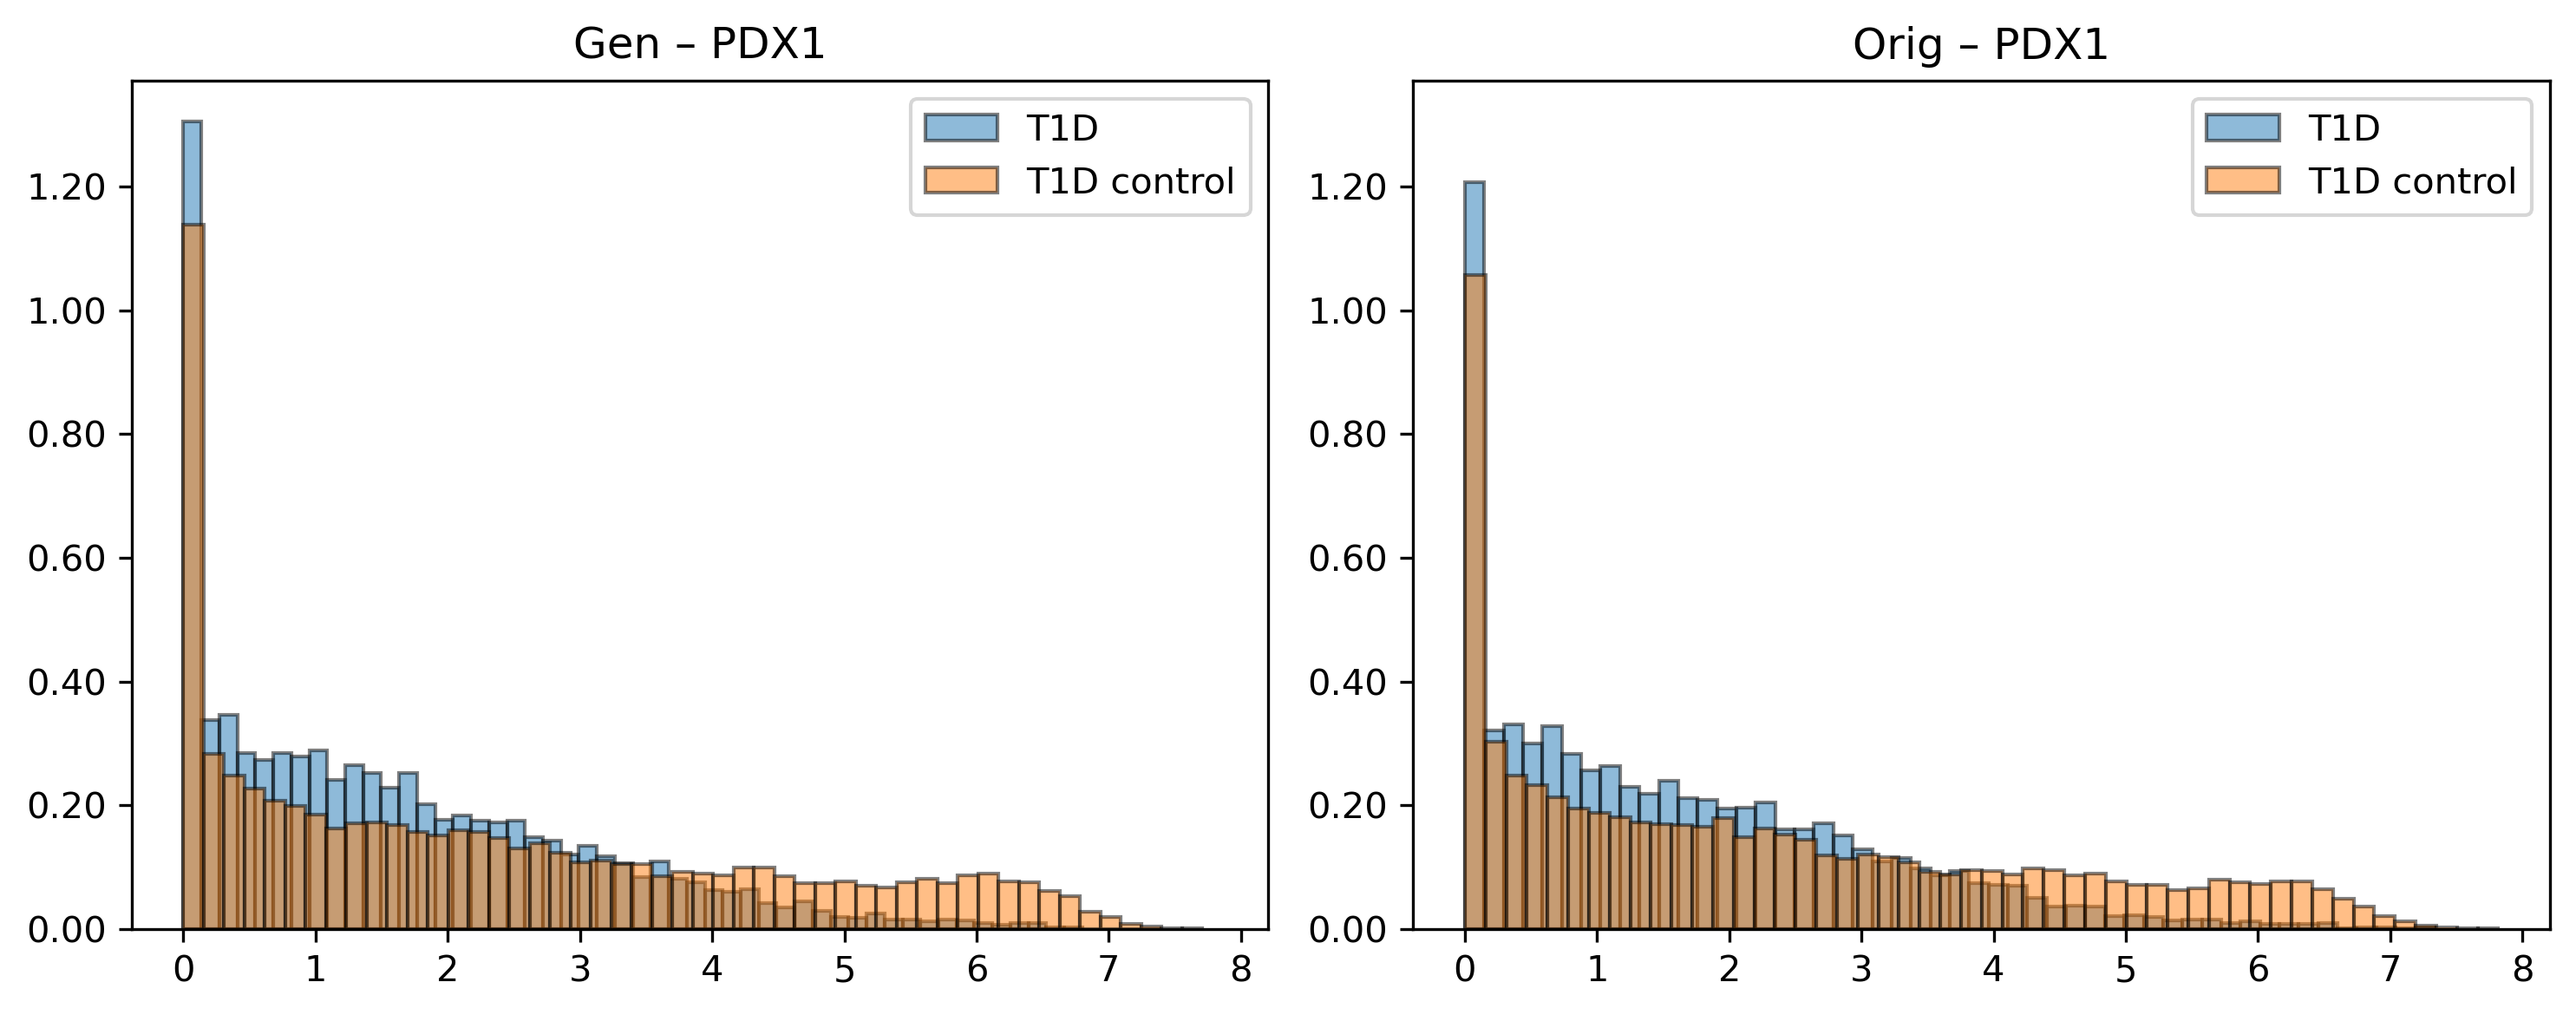

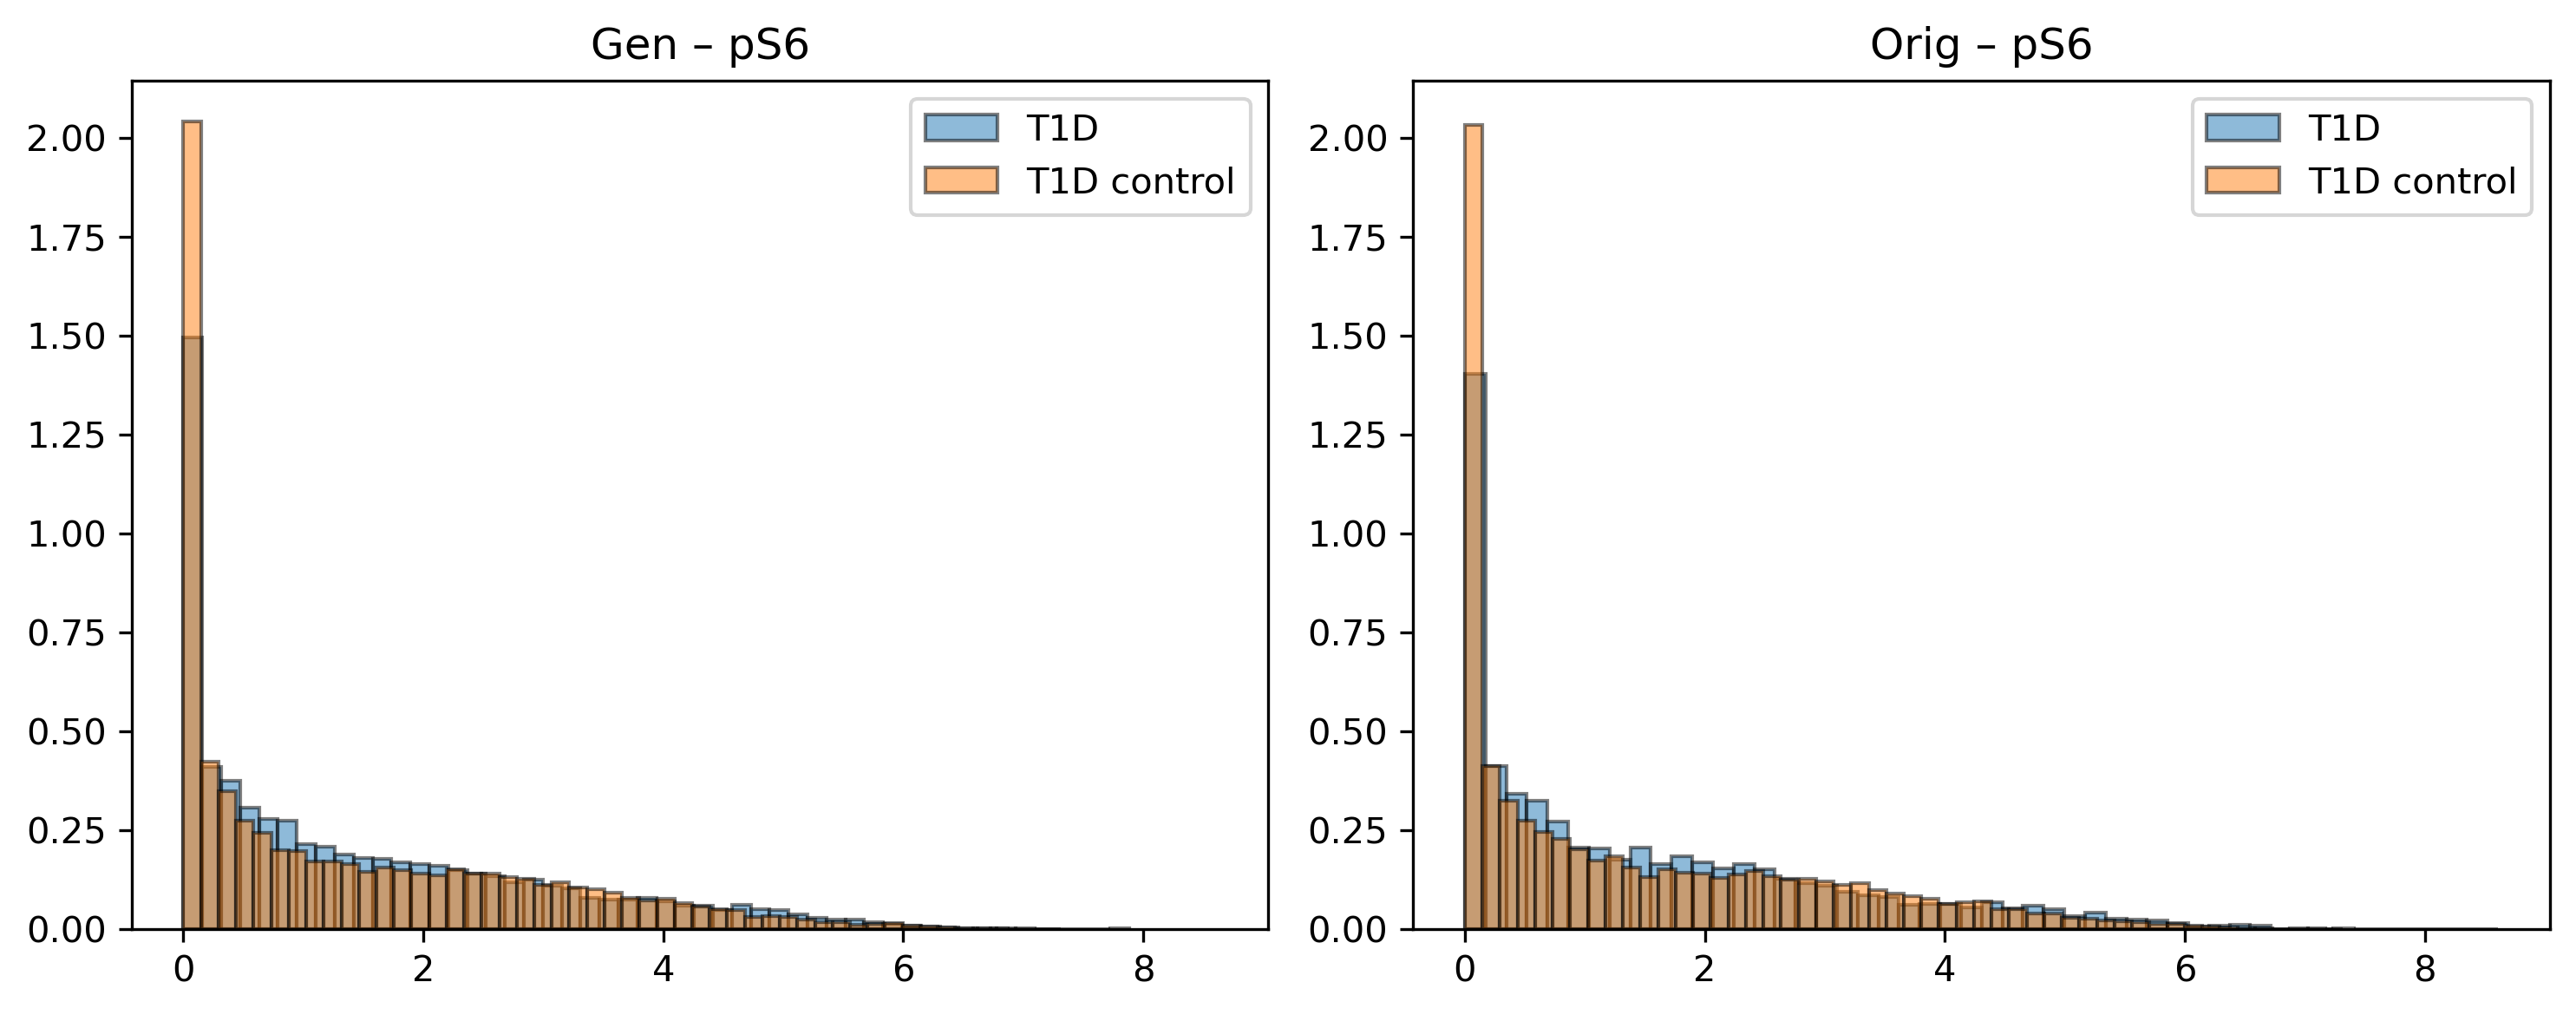

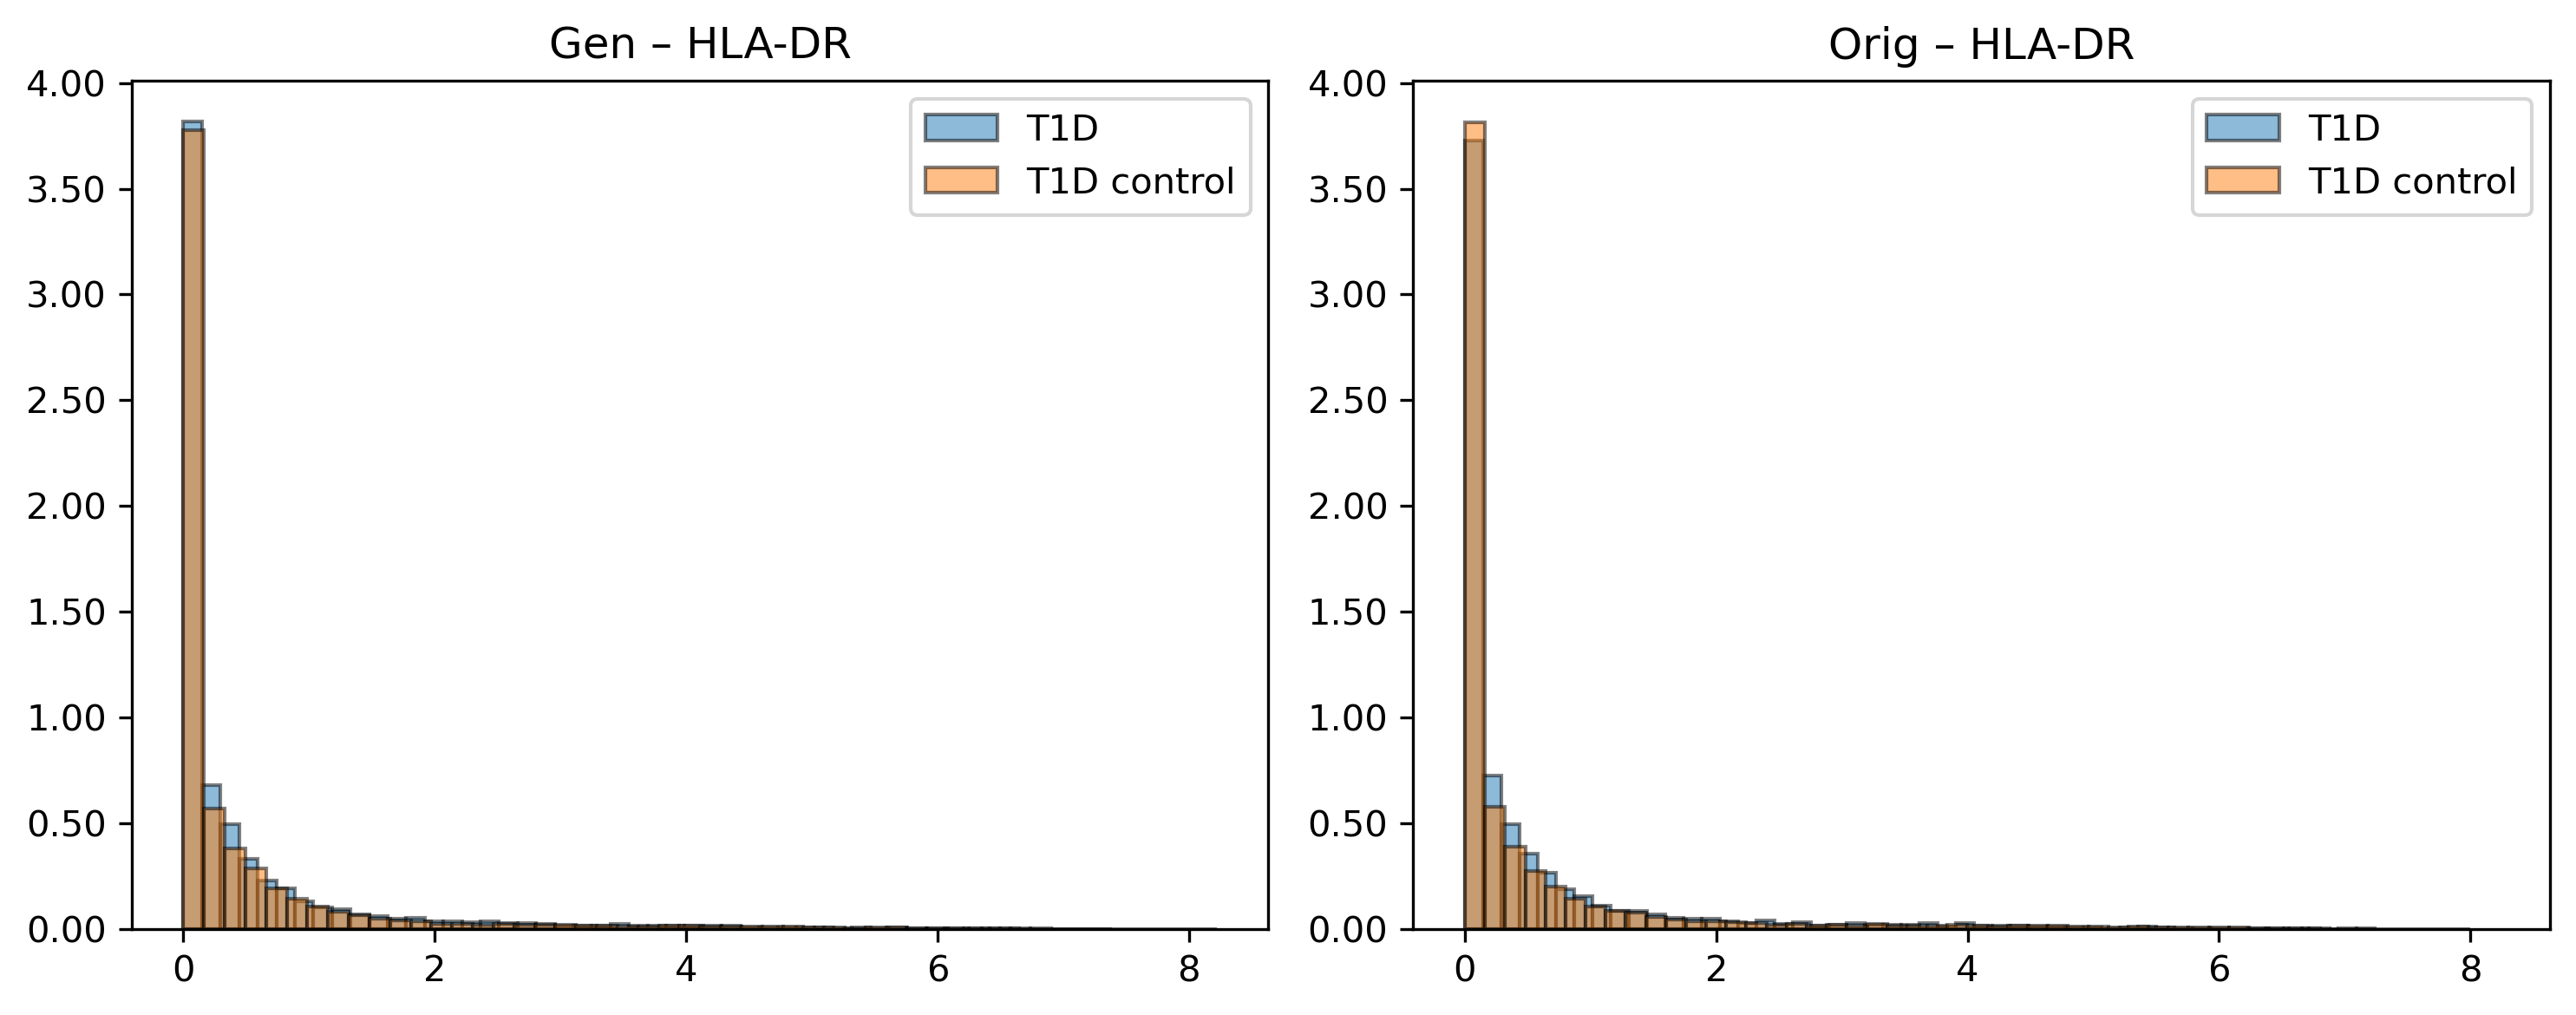

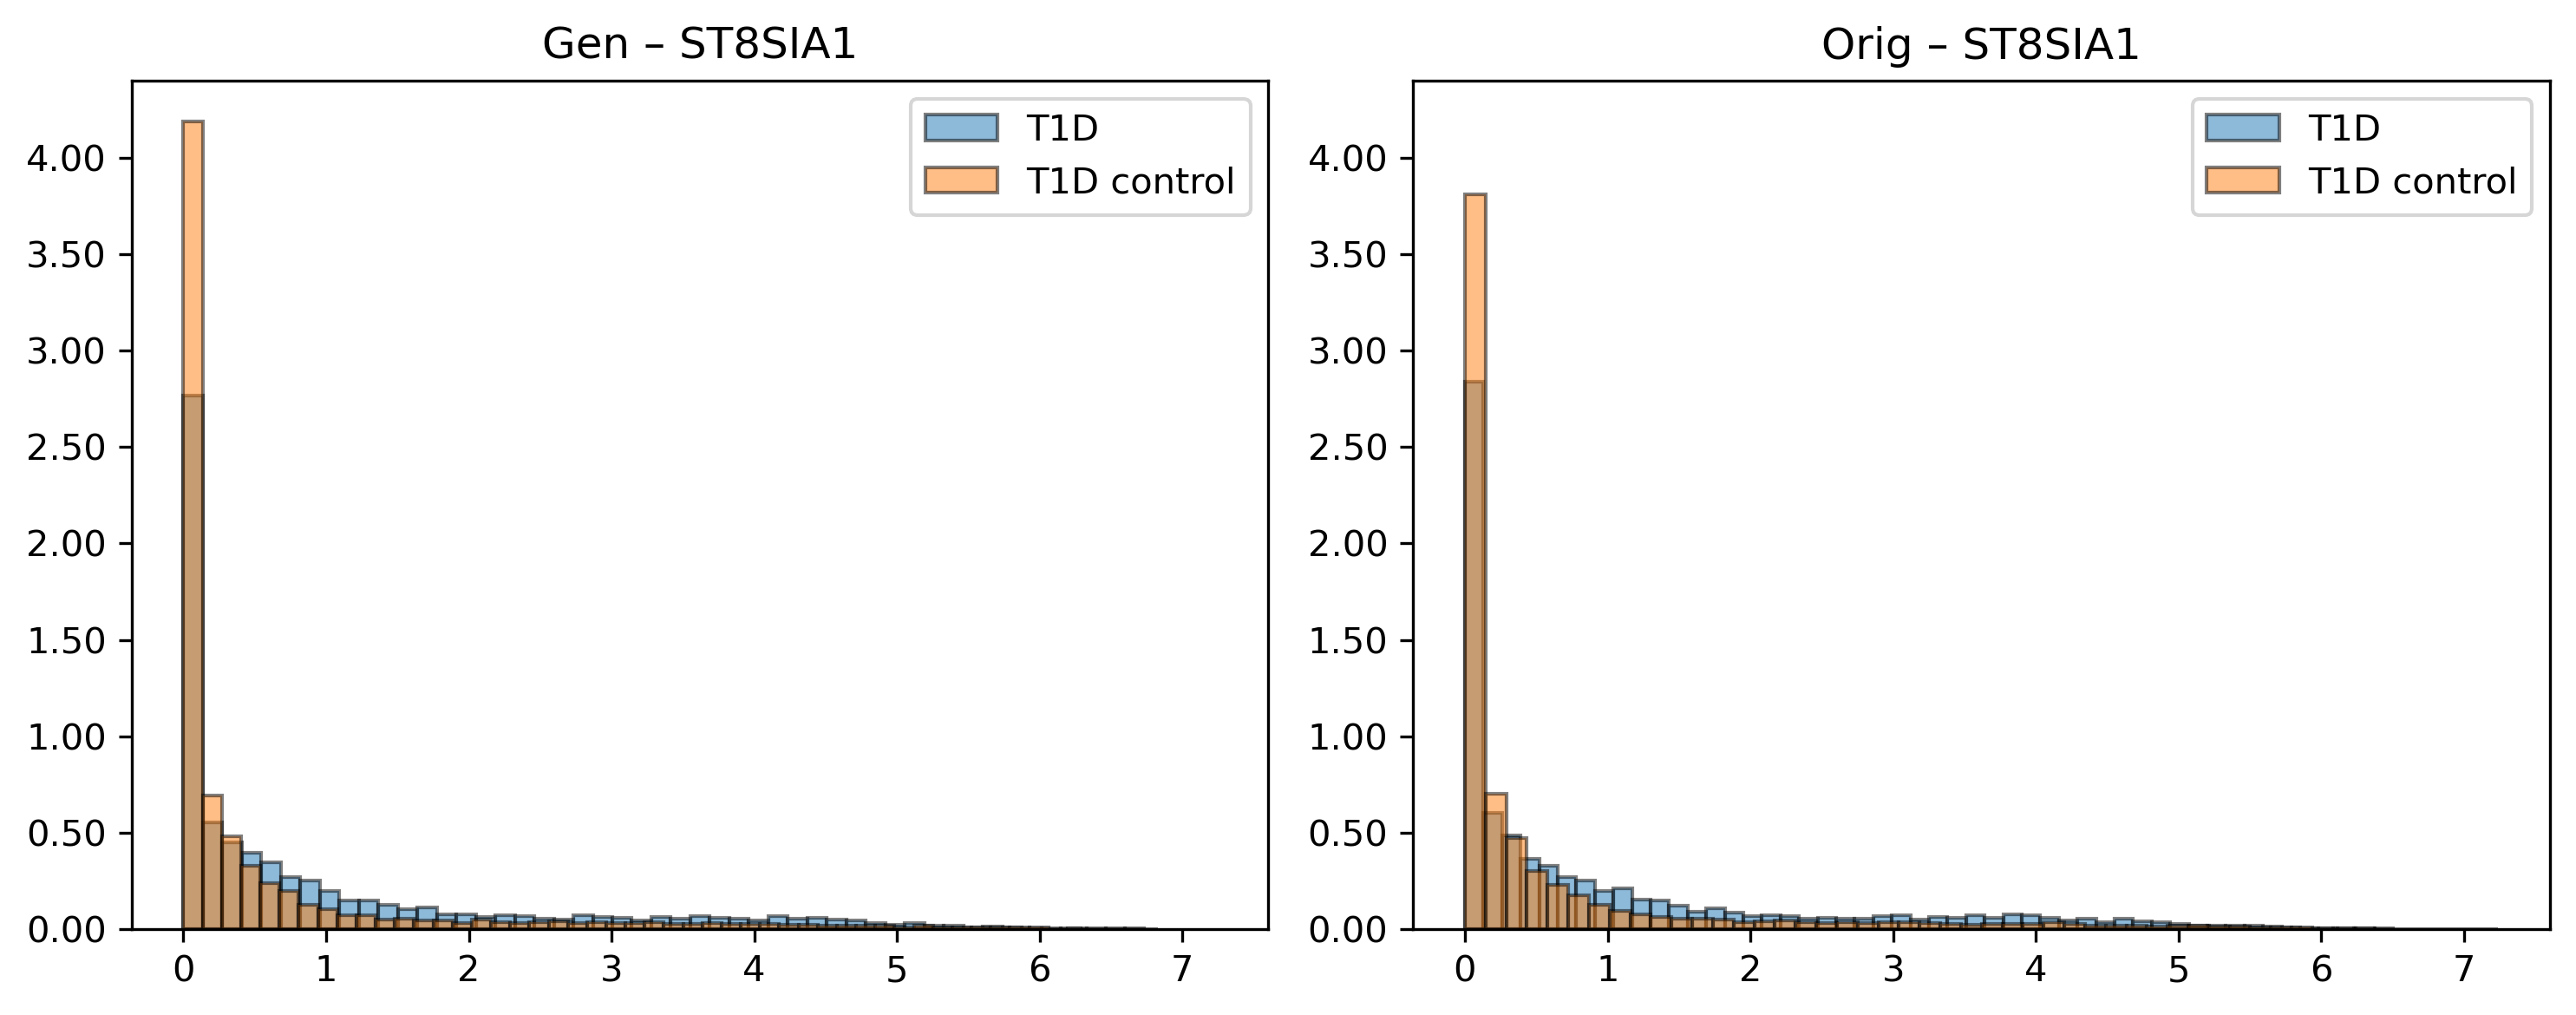

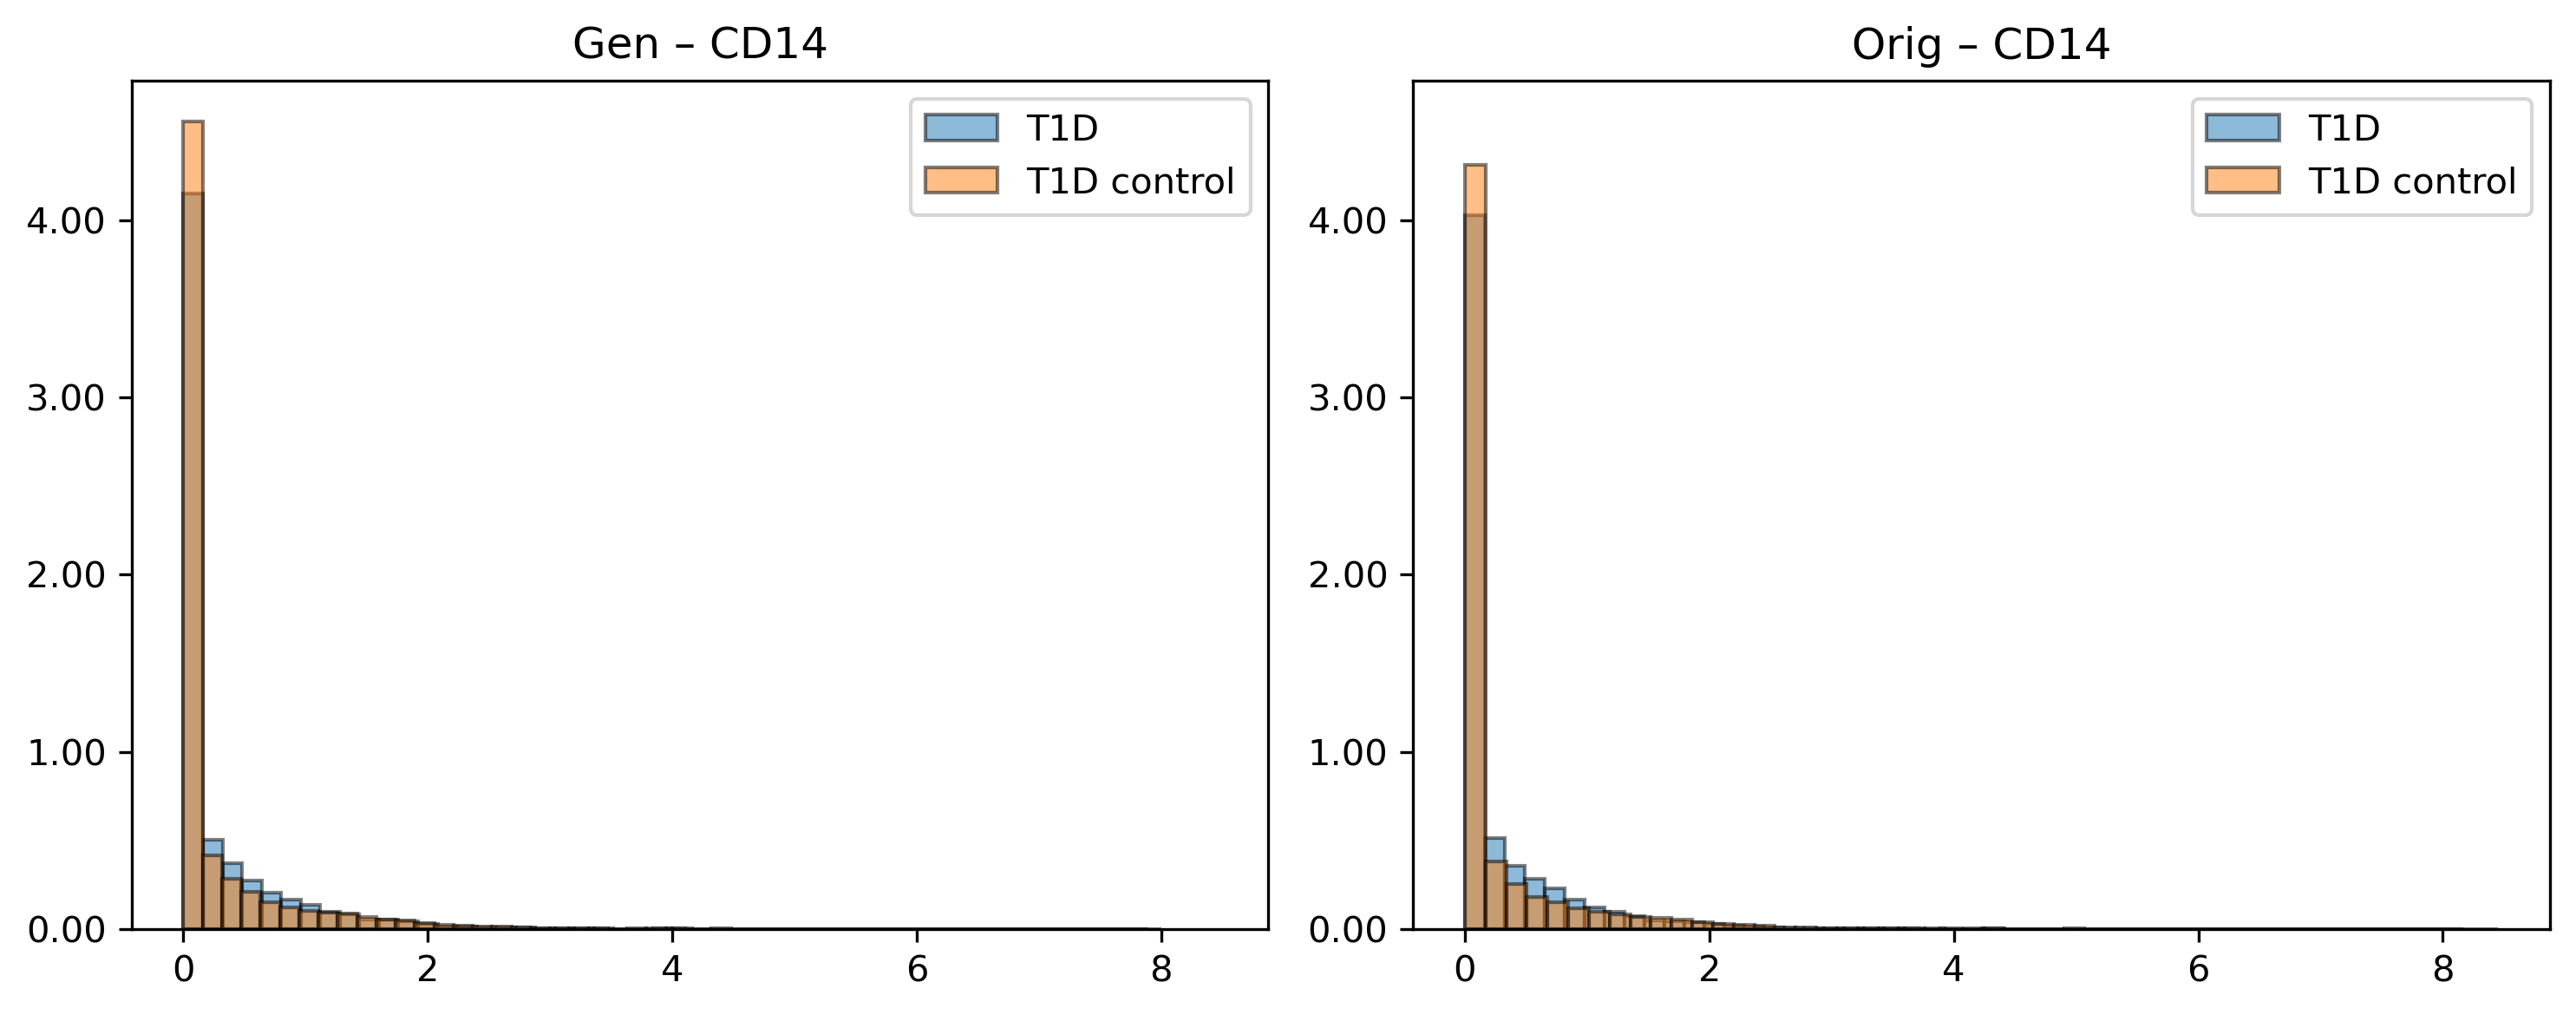

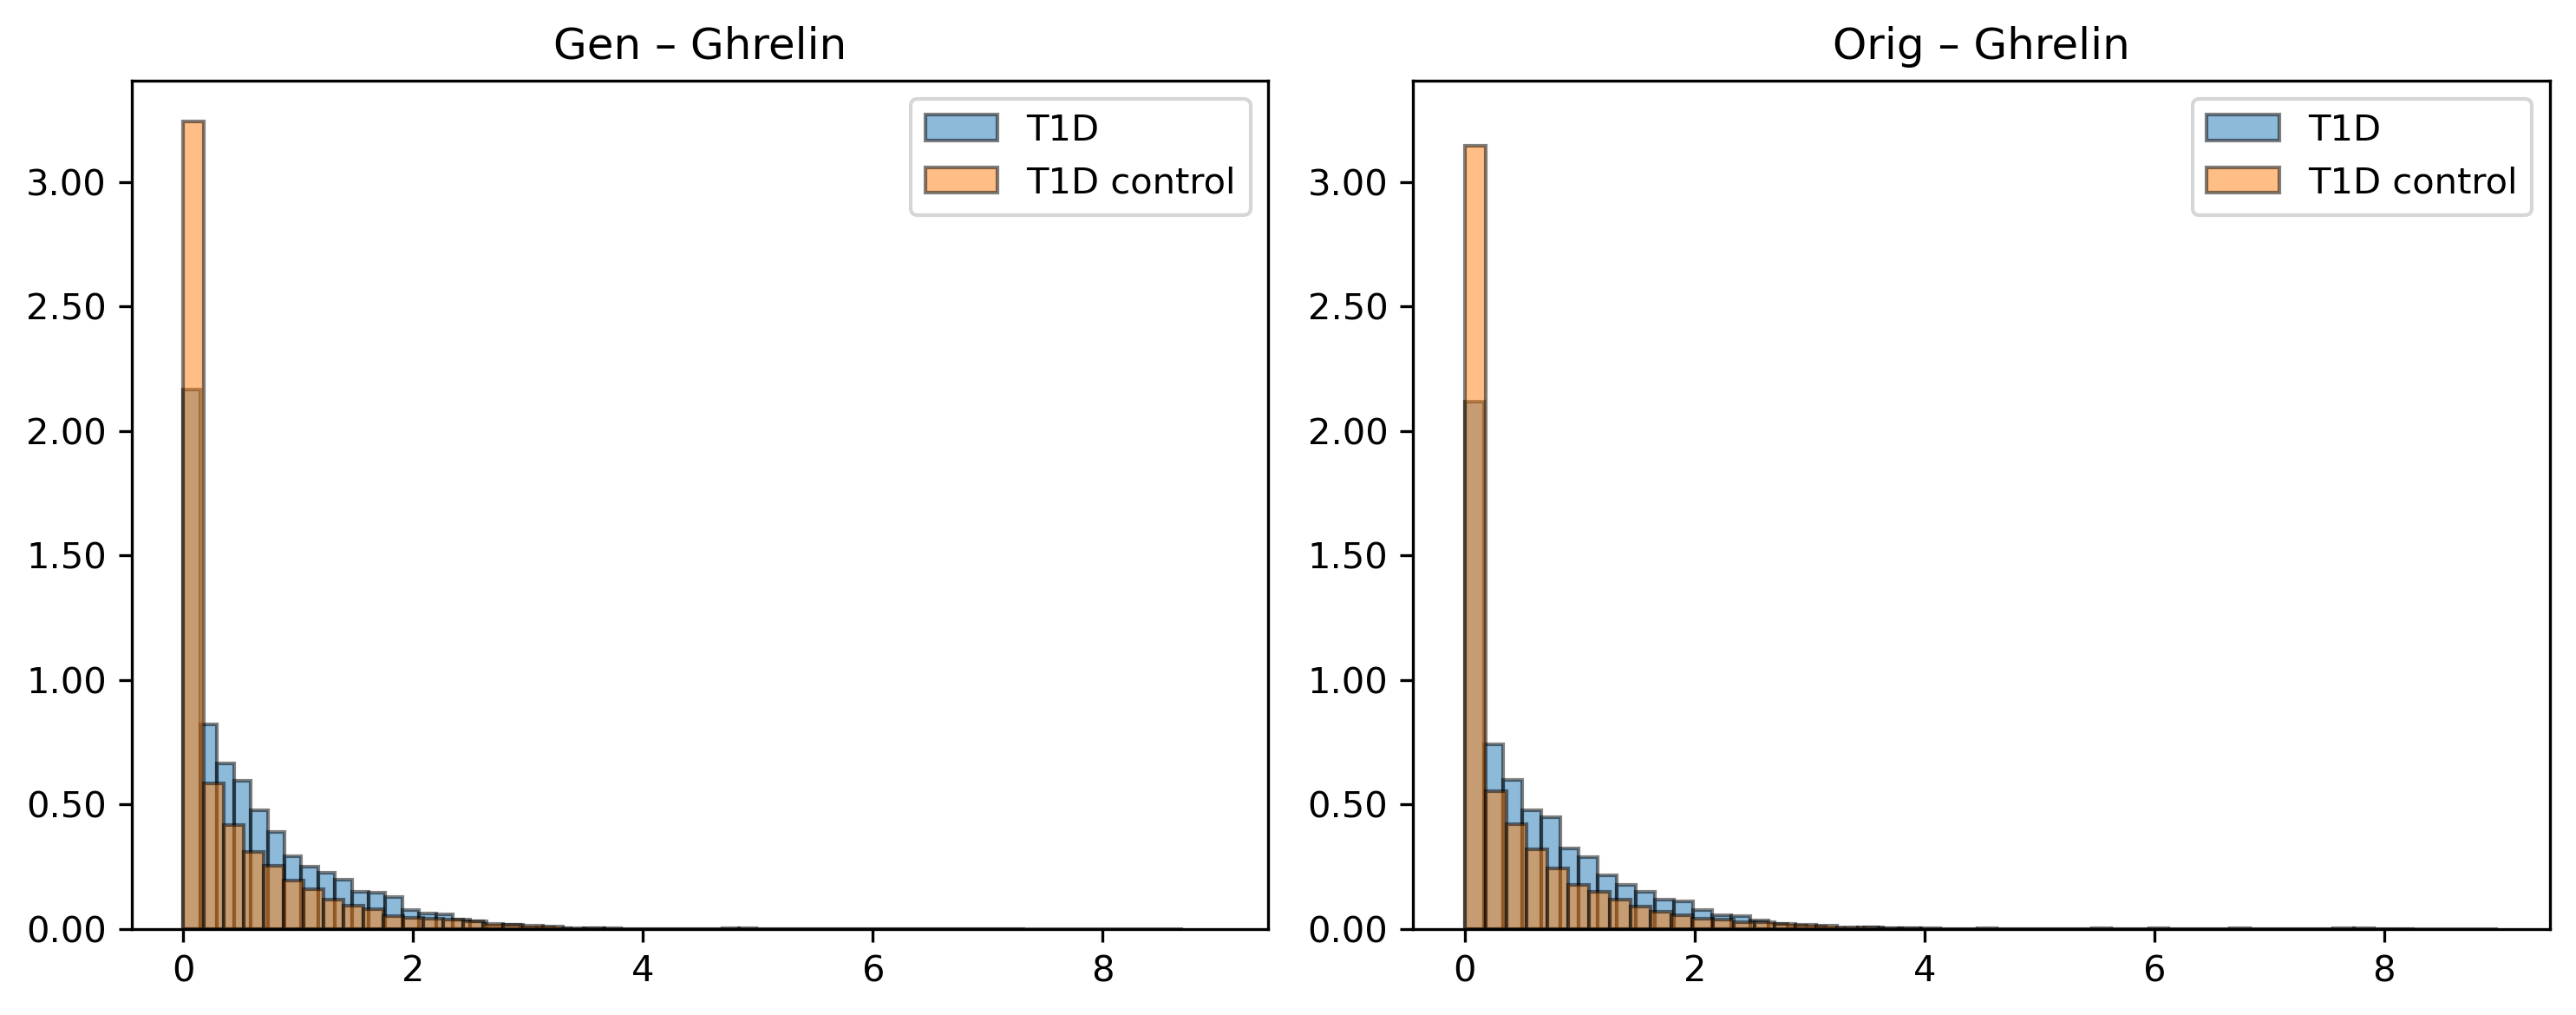

In [3]:
plot_feature_histogram_by_label(
    generated_dir="../data/sampled_cells",
    original_csv="../data/oringinal_cells.csv",
    label_xlsx="../data/label.xlsx",
    feature_num=36
)